In [1]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import timeit
import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

2024-04-26 13:23:17.300113: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 13:23:17.300235: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 13:23:17.426843: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Done


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Importing Data 

                                              Ravdess Dataframe
Here is the filename identifiers as per the official RAVDESS website:

* Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
* Vocal channel (01 = speech, 02 = song).
* Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
* Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
* Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
* Repetition (01 = 1st repetition, 02 = 2nd repetition).
* Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

So, here's an example of an audio filename. 02-01-06-01-02-01-12.mp4 This means the meta data for the audio file is:

* Video-only (02)
* Speech (01)
* Fearful (06)
* Normal intensity (01)
* Statement "dogs" (02)
* 1st Repetition (01)
* 12th Actor (12) - Female (as the actor ID number is even)

In [4]:
#preparing data set

ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_02', 'Actor_17', 'Actor_05', 'Actor_16', 'Actor_21', 'Actor_01', 'Actor_11', 'Actor_20', 'Actor_08', 'Actor_15', 'Actor_06', 'Actor_12', 'Actor_23', 'Actor_24', 'Actor_22', 'Actor_04', 'Actor_19', 'Actor_10', 'Actor_09', 'Actor_14', 'Actor_03', 'Actor_13', 'Actor_18', 'Actor_07']


In [5]:
Crema = "/kaggle/input/cremad/AudioWAV/"
Tess = "/kaggle/input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/"

# Preprocessing

**Ravdees**

In [6]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + i)
    for f in actor:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + i + '/' + f)
    

In [7]:
print(actor[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-06-02-01-01-07.wav
03
/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_02/03-01-08-01-01-01-02.wav
5
03-01-05-02-01-02-07.wav


In [8]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())



   Emotions                                               Path
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
______________________________________________
     Emotions                                               Path
1435     fear  /kaggle/input/ravdess-emotional-speech-audio/a...
1436    angry  /kaggle/input/ravdess-emotional-speech-audio/a...
1437      sad  /kaggle/input/ravdess-emotional-speech-audio/a...
1438  disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
1439    angry  /kaggle/input/ravdess-emotional-speech-audio/a...
_______________________________________________
Emotions
neutral     288
surprise    192
disgust     192
fear        192
sad         192
happy       192
angry       192
Name: count, dty

**Crema DataFrame**

CREMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral, and Sad) and four different emotion levels (Low, Medium, High, and Unspecified).

In [9]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())


Emotions
disgust    1271
happy      1271
sad        1271
fear       1271
angry      1271
neutral    1087
Name: count, dtype: int64


**TESS dataset**

There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.

The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format

In [10]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()
print(Tess_df.Emotions.value_counts())


Emotions
fear        400
angry       400
disgust     400
neutral     400
sad         400
surprise    400
happy       400
Name: count, dtype: int64


**SAVEE Dataset**

Context
The SAVEE database was recorded from four native English male speakers (identified as DC, JE, JK, KL), postgraduate students and researchers at the University of Surrey aged from 27 to 31 years. Emotion has been described psychologically in discrete categories: anger, disgust, fear, happiness, sadness and surprise. This is supported by the cross-cultural studies of Ekman [6] and studies of automatic emotion recognition tended to focus on recognizing these [12]. We added neutral to provide recordings of 7 emotion categories. The text material consisted of 15 TIMIT sentences per emotion: 3 common, 2 emotion-specific and 10 generic sentences that were different for each emotion and phonetically-balanced. The 3 common and 2 × 6 = 12 emotion-specific sentences were recorded as neutral to give 30 neutral sentences.

Content
This results in a total of 120 utterances per speaker, for example:

Common: She had your dark suit in greasy wash water all year.
Anger: Who authorized the unlimited expense account?
Disgust: Please take this dirty table cloth to the cleaners for me.
Fear: Call an ambulance for medical assistance.
Happiness: Those musicians harmonize marvelously.
Sadness: The prospect of cutting back spending is an unpleasant one for any governor.
Surprise: The carpet cleaners shampooed our oriental rug.
Neutral: The best way to learn is to solve extra problems.

In [11]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
print(Savee_df.Emotions.value_counts())


Emotions
neutral     120
fear         60
happy        60
disgust      60
angry        60
surprise     60
sad          60
Name: count, dtype: int64


In [12]:
ravdess_df.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


In [13]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,surprise,/kaggle/input/ravdess-emotional-speech-audio/a...
1,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...
2,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
3,disgust,/kaggle/input/ravdess-emotional-speech-audio/a...
4,neutral,/kaggle/input/ravdess-emotional-speech-audio/a...


In [14]:
print(data_path.Emotions.value_counts())


Emotions
disgust     1923
sad         1923
fear        1923
happy       1923
angry       1923
neutral     1895
surprise     652
Name: count, dtype: int64


>*                           Data Visualisation and Exploration

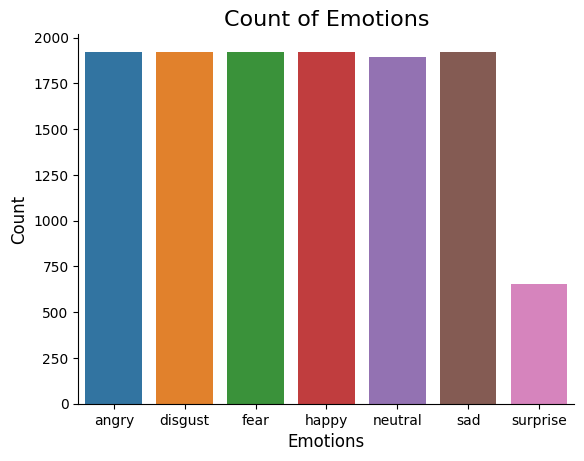

In [15]:
# Convert 'Emotions' column to categorical type
data_path['Emotions'] = data_path['Emotions'].astype('category')

plt.title('Count of Emotions', size=16)
sns.countplot(data=data_path, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [16]:
data,sr = librosa.load(file_path[0])
sr

22050

In [ ]:
ipd.Audio(data,rate=sr)

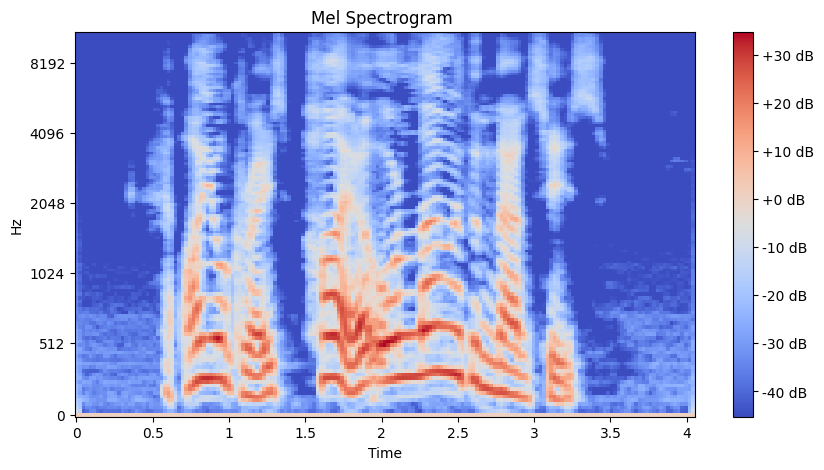

In [18]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB');

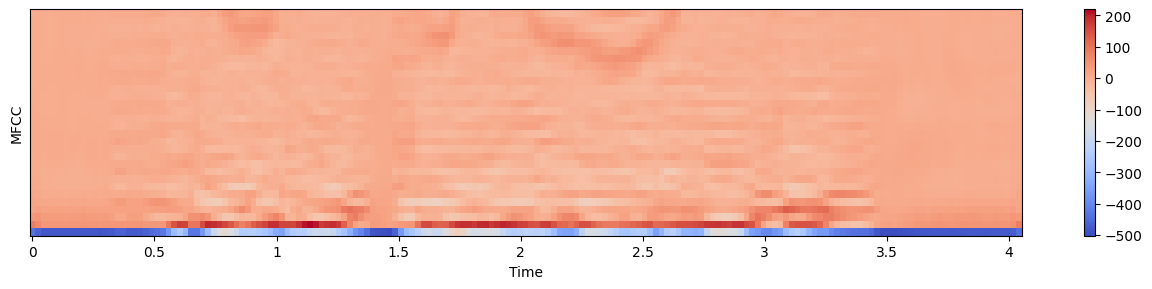

In [19]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

# Data augmentation

In [20]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data,rate = rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr = sampling_rate, n_steps = pitch_factor)

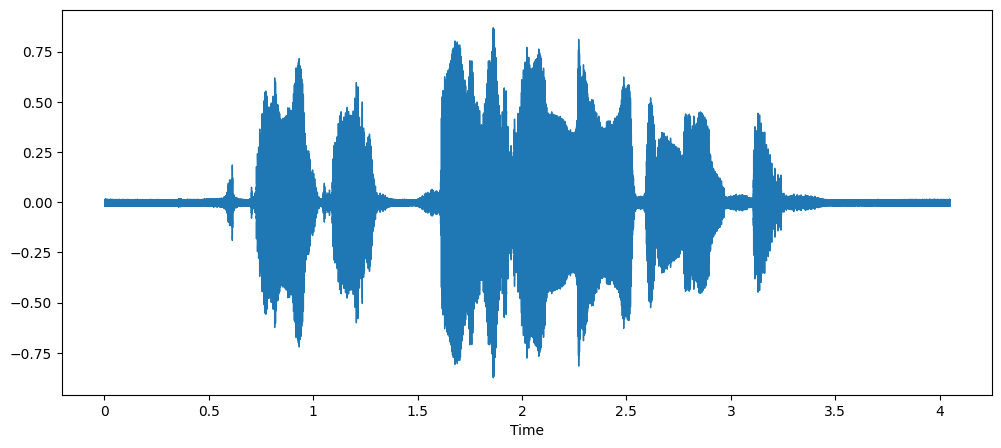

In [21]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

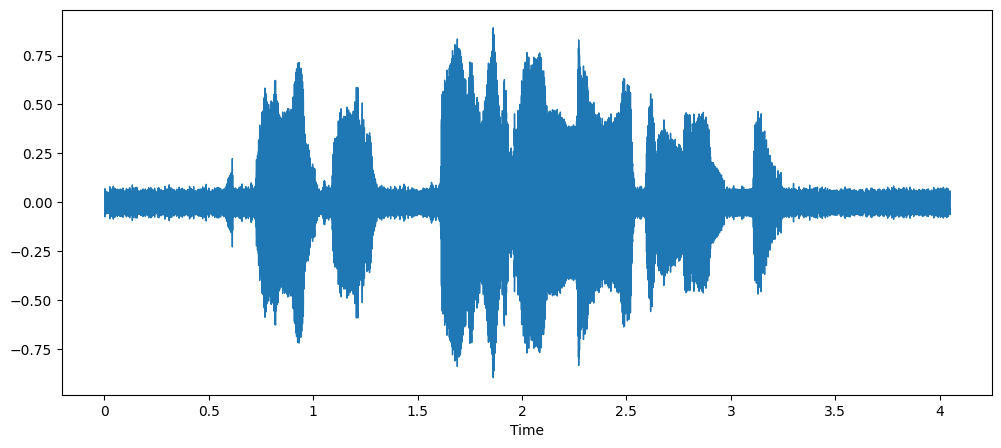

In [22]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

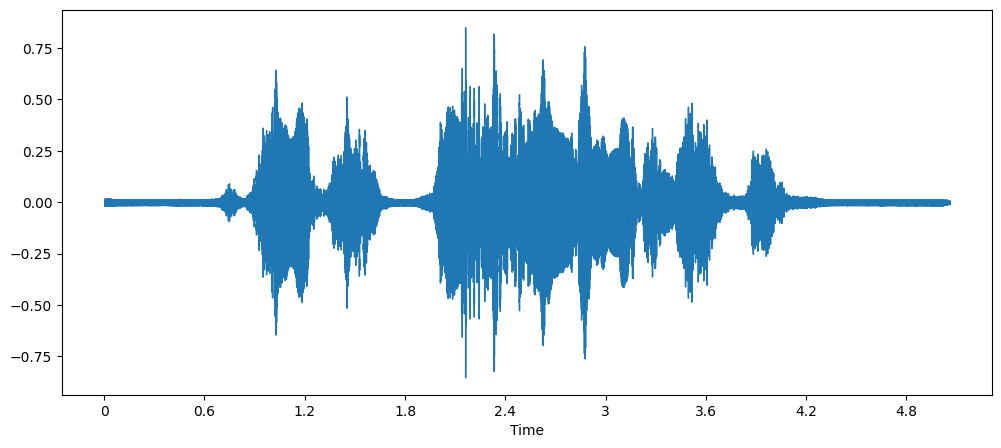

In [23]:

# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

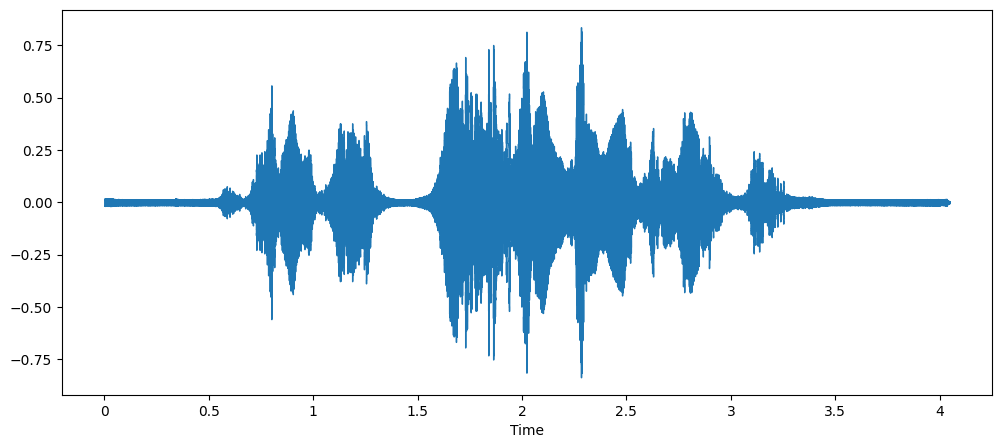

In [24]:
# AUDIO WITH PITCH
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

# Feature extraction

In [25]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(y = data, S = None, frame_length = frame_length,hop_length = hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(y = data, sr = sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result


def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio


In [26]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  4


In [28]:
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

In [29]:
warnings.filterwarnings("ignore")

from joblib import Parallel, delayed
import timeit
from tqdm import tqdm

In [30]:
start = timeit.default_timer()
paths = data_path.Path
emotions = data_path.Emotions

# Run the loop in parallel
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in tqdm(zip(paths, emotions)))

# Collect the results
X = []
Y = []
for result in tqdm(results):
    x, y = result
    X.extend(x)
    Y.extend(y)


stop = timeit.default_timer()

print('Time: ', stop - start)   

12162it [10:40, 18.98it/s]
100%|██████████| 12162/12162 [00:00<00:00, 551608.78it/s]

Time:  641.084958356


In [31]:
len(X), len(Y), data_path.Path.shape


(48648, 48648, (12162,))

# Saving features

In [32]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.343750,0.479492,0.573730,0.458008,0.375488,0.301758,0.269043,0.255371,0.251465,0.251953,...,-1.517690,-1.716483,-1.599310,-1.234609,-0.693198,-0.038982,0.675206,1.405603,2.112303,surprise
1,0.246094,0.368164,0.489258,0.490723,0.495117,0.490234,0.480469,0.478516,0.484375,0.484375,...,-0.921777,2.005467,4.090608,-5.607892,-10.777685,-1.374035,3.923226,2.621374,-0.443205,surprise
2,0.304199,0.427246,0.540039,0.471191,0.387207,0.333008,0.282227,0.259277,0.258789,0.252930,...,0.518303,0.838663,1.308733,1.855111,2.405192,2.896439,3.283493,3.541682,3.667480,surprise
3,0.232422,0.347656,0.472168,0.474609,0.473633,0.482422,0.473633,0.475098,0.476074,0.474121,...,3.539839,0.378459,0.684983,5.092634,1.354180,-4.107196,-5.396885,-2.444645,1.128752,surprise
4,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586417,2.746852,2.223276,0.986916,-0.730695,-2.530884,-4.002834,-4.849372,-4.929744,neutral


In [33]:
Emotions = pd.read_csv('/kaggle/working/emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.343750,0.479492,0.573730,0.458008,0.375488,0.301758,0.269043,0.255371,0.251465,0.251953,...,-1.517690,-1.716483,-1.599310,-1.234609,-0.693198,-0.038982,0.675206,1.405603,2.112303,surprise
1,0.246094,0.368164,0.489258,0.490723,0.495117,0.490234,0.480469,0.478516,0.484375,0.484375,...,-0.921777,2.005467,4.090608,-5.607892,-10.777685,-1.374035,3.923226,2.621374,-0.443205,surprise
2,0.304199,0.427246,0.540039,0.471191,0.387207,0.333008,0.282227,0.259277,0.258789,0.252930,...,0.518303,0.838663,1.308733,1.855111,2.405192,2.896439,3.283493,3.541682,3.667480,surprise
3,0.232422,0.347656,0.472168,0.474609,0.473633,0.482422,0.473633,0.475098,0.476074,0.474121,...,3.539839,0.378459,0.684983,5.092634,1.354180,-4.107196,-5.396885,-2.444645,1.128752,surprise
4,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586417,2.746852,2.223276,0.986916,-0.730695,-2.530884,-4.002834,-4.849372,-4.929744,neutral


In [34]:
print(Emotions.isna().any())


0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [35]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(48648, 2377)

In [36]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

In [37]:
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.343750,0.479492,0.573730,0.458008,0.375488,0.301758,0.269043,0.255371,0.251465,0.251953,...,-1.517690,-1.716483,-1.599310,-1.234609,-0.693198,-0.038982,0.675206,1.405603,2.112303,surprise
1,0.246094,0.368164,0.489258,0.490723,0.495117,0.490234,0.480469,0.478516,0.484375,0.484375,...,-0.921777,2.005467,4.090608,-5.607892,-10.777685,-1.374035,3.923226,2.621374,-0.443205,surprise
2,0.304199,0.427246,0.540039,0.471191,0.387207,0.333008,0.282227,0.259277,0.258789,0.252930,...,0.518303,0.838663,1.308733,1.855111,2.405192,2.896439,3.283493,3.541682,3.667480,surprise
3,0.232422,0.347656,0.472168,0.474609,0.473633,0.482422,0.473633,0.475098,0.476074,0.474121,...,3.539839,0.378459,0.684983,5.092634,1.354180,-4.107196,-5.396885,-2.444645,1.128752,surprise
4,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586417,2.746852,2.223276,0.986916,-0.730695,-2.530884,-4.002834,-4.849372,-4.929744,neutral


# Data preparation

In [38]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
y = Emotions.iloc[:, -1].values

In [39]:
print(y.shape)
X.shape

(48648,)


(48648, 2376)

In [106]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine number of classes for one-hot encoding
num_classes = len(np.unique(y))

# Encode labels using one-hot encoding
y_encoded = pd.get_dummies(Emotions.iloc[:, -1]).values  # Using pandas get_dummies for one-hot encoding
y_encoded = torch.tensor(y_encoded, dtype=torch.float32)

# Reshape X for Conv1d: [batch, channels, features]
X_scaled = np.expand_dims(X_scaled, 1)  # Adding channel dimension
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 50% val, 50% test

print("Train, validation, and test splits:")
print("Train shapes: X={}, y={}".format(X_train.shape, y_train.shape))
print("Validation shapes: X={}, y={}".format(X_val.shape, y_val.shape))
print("Test shapes: X={}, y={}".format(X_test.shape, y_test.shape))

Train, validation, and test splits:
Train shapes: X=torch.Size([34053, 1, 2376]), y=torch.Size([34053, 7])
Validation shapes: X=torch.Size([7297, 1, 2376]), y=torch.Size([7297, 7])
Test shapes: X=torch.Size([7298, 1, 2376]), y=torch.Size([7298, 7])


In [61]:
num_classes

7

 # MODEL BUILDING

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from torch.optim import Adam
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
import torch.optim as optim

In [2]:
# Dataset
class AudioDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [3]:
# Early stopping class implementation in PyTorch
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


In [4]:
# Initialize early stopper
early_stopper = EarlyStopping(patience=100, verbose=True, path='best_model_nn.pth')


In [5]:
class AudioClassifier_simple(nn.Module):
    def __init__(self):
        super(AudioClassifier_simple, self).__init__()
        # Assuming the number of input features per sample is 2376 (from your error message input shape [32, 1, 2376])
        self.conv1 = nn.Conv1d(1, 128, kernel_size=5, padding='same')  # Change input channels to 1
        self.bn1 = nn.BatchNorm1d(128)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(0.1)
        self.pool1 = nn.MaxPool1d(kernel_size=8)
        self.bn2 = nn.BatchNorm1d(128)
        self.conv2 = nn.Conv1d(128, 128, kernel_size=5, padding='same')
        self.act2 = nn.ReLU()
        self.drop2 = nn.Dropout(0.1)
        self.flatten = nn.Flatten()
        # Calculate the number of features coming out of the last Conv/Pool layer to correctly set the input features for the dense layer
        self.fc1 = nn.Linear(self._get_conv_output((1, 2376)), 7)  # Output size needs to be calculated
        self.act3 = nn.Softmax(dim=1)

    def _get_conv_output(self, shape):
        input = torch.rand(*shape)
        output = self.pool1(self.drop1(self.act1(self.conv1(input))))
        output = self.drop2(self.act2(self.conv2(output)))
        return int(np.prod(output.size()))

    def forward(self, x):
        x = self.conv1(x)
        x = self.act1(x)
        x = self.drop1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.act2(x)
        x = self.drop2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.act3(x)
        return x

In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [7]:
# Ensure the model is moved to the right device
# Instantiate the model
model = AudioClassifier_simple().to(device)  # Update `num_classes` as needed
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.00005)  # Setup optimizer
criterion = torch.nn.CrossEntropyLoss()  # Setup criterion

In [8]:
from torchsummary import summary

In [9]:
summary(model)

Layer (type:depth-idx)                   Param #
├─Conv1d: 1-1                            768
├─BatchNorm1d: 1-2                       256
├─ReLU: 1-3                              --
├─Dropout: 1-4                           --
├─MaxPool1d: 1-5                         --
├─BatchNorm1d: 1-6                       256
├─Conv1d: 1-7                            82,048
├─ReLU: 1-8                              --
├─Dropout: 1-9                           --
├─Flatten: 1-10                          --
├─Linear: 1-11                           266,119
├─Softmax: 1-12                          --
Total params: 349,447
Trainable params: 349,447
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Conv1d: 1-1                            768
├─BatchNorm1d: 1-2                       256
├─ReLU: 1-3                              --
├─Dropout: 1-4                           --
├─MaxPool1d: 1-5                         --
├─BatchNorm1d: 1-6                       256
├─Conv1d: 1-7                            82,048
├─ReLU: 1-8                              --
├─Dropout: 1-9                           --
├─Flatten: 1-10                          --
├─Linear: 1-11                           266,119
├─Softmax: 1-12                          --
Total params: 349,447
Trainable params: 349,447
Non-trainable params: 0

In [130]:
def train(model, criterion, optimizer, train_loader, val_loader, early_stopper, epochs=50, device='cuda'):
    # Check for GPU availability
    if torch.cuda.is_available() and device == 'cuda':
        model = model.to(device)
    else:
        device = 'cpu'  # Use CPU if CUDA isn't available

    for epoch in tqdm(range(epochs)):
        # Training phase
        model.train()
        train_loss = 0.0
        correct_train = 0
        total_train = 0

        for data, target in train_loader:
            # Transfer data and target to the appropriate device
            data, target = data.to(device), target.to(device)

            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * data.size(0)
            _, predicted = torch.max(output, 1)
            correct_train += (predicted == target).sum().item()
            total_train += target.size(0)
        
        # Calculate training loss and accuracy
        train_loss /= len(train_loader.dataset)
        train_acc = correct_train / total_train

        # Validation phase
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        model.eval()

        with torch.no_grad():
            for data, target in val_loader:
                data, target = data.to(device), target.to(device)
                output = model(data)
                loss = criterion(output, target)
                val_loss += loss.item() * data.size(0)
                _, predicted = torch.max(output, 1)
                correct_val += (predicted == target).sum().item()
                total_val += target.size(0)

        # Calculate validation loss and accuracy
        val_loss /= len(val_loader.dataset)
        val_acc = correct_val / total_val

        # Print training and validation results
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        # Early stopping check
        early_stopper(val_loss, model)

        if early_stopper.early_stop:
            print("Early stopping")
            break


In [119]:
# Convert one-hot encoded labels back to class indices
y_train_indices = np.argmax(y_train, axis=1)
y_val_indices = np.argmax(y_val, axis=1)
y_test_indices = np.argmax(y_test, axis=1)

In [120]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
#y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
#y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
#y_test_tensor = torch.tensor(y_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_indices, dtype=torch.long)
y_val_tensor = torch.tensor(y_val_indices, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_indices, dtype=torch.long)

In [121]:

# Create Datasets
train_dataset = AudioDataset(X_train_tensor, y_train_tensor)
val_dataset = AudioDataset(X_val_tensor, y_val_tensor)
test_dataset = AudioDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [146]:
# Assume model, criterion, optimizer are already defined
train(model, criterion, optimizer, train_loader, val_loader, early_stopper, epochs=1000)

  0%|          | 1/1000 [00:06<1:55:18,  6.93s/it]

Epoch 1/1000 - Train Loss: 1.8126, Train Acc: 0.3450, Val Loss: 1.8131, Val Acc: 0.3401
Validation loss decreased (inf --> 1.813097).  Saving model ...


  0%|          | 2/1000 [00:13<1:55:15,  6.93s/it]

Epoch 2/1000 - Train Loss: 1.7490, Train Acc: 0.4139, Val Loss: 1.7524, Val Acc: 0.4124
Validation loss decreased (1.813097 --> 1.752396).  Saving model ...


  0%|          | 3/1000 [00:20<1:54:46,  6.91s/it]

Epoch 3/1000 - Train Loss: 1.7253, Train Acc: 0.4381, Val Loss: 1.7557, Val Acc: 0.4024
EarlyStopping counter: 1 out of 100


  0%|          | 4/1000 [00:27<1:54:34,  6.90s/it]

Epoch 4/1000 - Train Loss: 1.7077, Train Acc: 0.4548, Val Loss: 1.7191, Val Acc: 0.4402
Validation loss decreased (1.752396 --> 1.719122).  Saving model ...


  0%|          | 5/1000 [00:34<1:54:28,  6.90s/it]

Epoch 5/1000 - Train Loss: 1.6945, Train Acc: 0.4692, Val Loss: 1.7190, Val Acc: 0.4437
Validation loss decreased (1.719122 --> 1.718998).  Saving model ...


  1%|          | 6/1000 [00:41<1:54:32,  6.91s/it]

Epoch 6/1000 - Train Loss: 1.6825, Train Acc: 0.4837, Val Loss: 1.6897, Val Acc: 0.4762
Validation loss decreased (1.718998 --> 1.689684).  Saving model ...


  1%|          | 7/1000 [00:48<1:54:16,  6.90s/it]

Epoch 7/1000 - Train Loss: 1.6734, Train Acc: 0.4925, Val Loss: 1.7008, Val Acc: 0.4577
EarlyStopping counter: 1 out of 100


  1%|          | 8/1000 [00:55<1:54:03,  6.90s/it]

Epoch 8/1000 - Train Loss: 1.6652, Train Acc: 0.5020, Val Loss: 1.6927, Val Acc: 0.4695
EarlyStopping counter: 2 out of 100


  1%|          | 9/1000 [01:02<1:53:56,  6.90s/it]

Epoch 9/1000 - Train Loss: 1.6561, Train Acc: 0.5134, Val Loss: 1.7110, Val Acc: 0.4498
EarlyStopping counter: 3 out of 100


  1%|          | 10/1000 [01:09<1:53:48,  6.90s/it]

Epoch 10/1000 - Train Loss: 1.6495, Train Acc: 0.5178, Val Loss: 1.7129, Val Acc: 0.4465
EarlyStopping counter: 4 out of 100


  1%|          | 11/1000 [01:15<1:53:45,  6.90s/it]

Epoch 11/1000 - Train Loss: 1.6423, Train Acc: 0.5282, Val Loss: 1.6792, Val Acc: 0.4840
Validation loss decreased (1.689684 --> 1.679182).  Saving model ...


  1%|          | 12/1000 [01:22<1:53:34,  6.90s/it]

Epoch 12/1000 - Train Loss: 1.6363, Train Acc: 0.5333, Val Loss: 1.6737, Val Acc: 0.4868
Validation loss decreased (1.679182 --> 1.673696).  Saving model ...


  1%|▏         | 13/1000 [01:29<1:53:26,  6.90s/it]

Epoch 13/1000 - Train Loss: 1.6306, Train Acc: 0.5397, Val Loss: 1.6624, Val Acc: 0.5032
Validation loss decreased (1.673696 --> 1.662420).  Saving model ...


  1%|▏         | 14/1000 [01:36<1:53:21,  6.90s/it]

Epoch 14/1000 - Train Loss: 1.6251, Train Acc: 0.5448, Val Loss: 1.6626, Val Acc: 0.5032
EarlyStopping counter: 1 out of 100


  2%|▏         | 15/1000 [01:43<1:53:21,  6.90s/it]

Epoch 15/1000 - Train Loss: 1.6193, Train Acc: 0.5523, Val Loss: 1.6505, Val Acc: 0.5176
Validation loss decreased (1.662420 --> 1.650539).  Saving model ...


  2%|▏         | 16/1000 [01:50<1:53:08,  6.90s/it]

Epoch 16/1000 - Train Loss: 1.6163, Train Acc: 0.5543, Val Loss: 1.7074, Val Acc: 0.4492
EarlyStopping counter: 1 out of 100


  2%|▏         | 17/1000 [01:57<1:53:01,  6.90s/it]

Epoch 17/1000 - Train Loss: 1.6101, Train Acc: 0.5610, Val Loss: 1.7055, Val Acc: 0.4535
EarlyStopping counter: 2 out of 100


  2%|▏         | 18/1000 [02:04<1:52:53,  6.90s/it]

Epoch 18/1000 - Train Loss: 1.6056, Train Acc: 0.5658, Val Loss: 1.6728, Val Acc: 0.4870
EarlyStopping counter: 3 out of 100


  2%|▏         | 19/1000 [02:11<1:52:42,  6.89s/it]

Epoch 19/1000 - Train Loss: 1.6009, Train Acc: 0.5707, Val Loss: 1.6591, Val Acc: 0.5028
EarlyStopping counter: 4 out of 100


  2%|▏         | 20/1000 [02:18<1:52:39,  6.90s/it]

Epoch 20/1000 - Train Loss: 1.5967, Train Acc: 0.5741, Val Loss: 1.6584, Val Acc: 0.5034
EarlyStopping counter: 5 out of 100


  2%|▏         | 21/1000 [02:24<1:52:33,  6.90s/it]

Epoch 21/1000 - Train Loss: 1.5921, Train Acc: 0.5795, Val Loss: 1.6402, Val Acc: 0.5275
Validation loss decreased (1.650539 --> 1.640168).  Saving model ...


  2%|▏         | 22/1000 [02:31<1:52:30,  6.90s/it]

Epoch 22/1000 - Train Loss: 1.5883, Train Acc: 0.5838, Val Loss: 1.6326, Val Acc: 0.5339
Validation loss decreased (1.640168 --> 1.632616).  Saving model ...


  2%|▏         | 23/1000 [02:38<1:52:20,  6.90s/it]

Epoch 23/1000 - Train Loss: 1.5841, Train Acc: 0.5881, Val Loss: 1.6264, Val Acc: 0.5413
Validation loss decreased (1.632616 --> 1.626360).  Saving model ...


  2%|▏         | 24/1000 [02:45<1:52:16,  6.90s/it]

Epoch 24/1000 - Train Loss: 1.5808, Train Acc: 0.5918, Val Loss: 1.6285, Val Acc: 0.5350
EarlyStopping counter: 1 out of 100


  2%|▎         | 25/1000 [02:52<1:52:08,  6.90s/it]

Epoch 25/1000 - Train Loss: 1.5777, Train Acc: 0.5939, Val Loss: 1.6221, Val Acc: 0.5441
Validation loss decreased (1.626360 --> 1.622109).  Saving model ...


  3%|▎         | 26/1000 [02:59<1:51:58,  6.90s/it]

Epoch 26/1000 - Train Loss: 1.5737, Train Acc: 0.5990, Val Loss: 1.6068, Val Acc: 0.5631
Validation loss decreased (1.622109 --> 1.606823).  Saving model ...


  3%|▎         | 27/1000 [03:06<1:51:51,  6.90s/it]

Epoch 27/1000 - Train Loss: 1.5693, Train Acc: 0.6036, Val Loss: 1.6193, Val Acc: 0.5452
EarlyStopping counter: 1 out of 100


  3%|▎         | 28/1000 [03:13<1:51:44,  6.90s/it]

Epoch 28/1000 - Train Loss: 1.5663, Train Acc: 0.6058, Val Loss: 1.6209, Val Acc: 0.5441
EarlyStopping counter: 2 out of 100


  3%|▎         | 29/1000 [03:20<1:51:42,  6.90s/it]

Epoch 29/1000 - Train Loss: 1.5633, Train Acc: 0.6088, Val Loss: 1.6027, Val Acc: 0.5665
Validation loss decreased (1.606823 --> 1.602748).  Saving model ...


  3%|▎         | 30/1000 [03:27<1:51:34,  6.90s/it]

Epoch 30/1000 - Train Loss: 1.5599, Train Acc: 0.6119, Val Loss: 1.6060, Val Acc: 0.5617
EarlyStopping counter: 1 out of 100


  3%|▎         | 31/1000 [03:33<1:51:27,  6.90s/it]

Epoch 31/1000 - Train Loss: 1.5562, Train Acc: 0.6167, Val Loss: 1.6107, Val Acc: 0.5542
EarlyStopping counter: 2 out of 100


  3%|▎         | 32/1000 [03:40<1:51:22,  6.90s/it]

Epoch 32/1000 - Train Loss: 1.5539, Train Acc: 0.6180, Val Loss: 1.6009, Val Acc: 0.5678
Validation loss decreased (1.602748 --> 1.600878).  Saving model ...


  3%|▎         | 33/1000 [03:47<1:51:25,  6.91s/it]

Epoch 33/1000 - Train Loss: 1.5507, Train Acc: 0.6221, Val Loss: 1.5965, Val Acc: 0.5700
Validation loss decreased (1.600878 --> 1.596478).  Saving model ...


  3%|▎         | 34/1000 [03:54<1:51:20,  6.92s/it]

Epoch 34/1000 - Train Loss: 1.5486, Train Acc: 0.6231, Val Loss: 1.6088, Val Acc: 0.5567
EarlyStopping counter: 1 out of 100


  4%|▎         | 35/1000 [04:01<1:51:11,  6.91s/it]

Epoch 35/1000 - Train Loss: 1.5451, Train Acc: 0.6273, Val Loss: 1.5987, Val Acc: 0.5704
EarlyStopping counter: 2 out of 100


  4%|▎         | 36/1000 [04:08<1:50:56,  6.91s/it]

Epoch 36/1000 - Train Loss: 1.5427, Train Acc: 0.6308, Val Loss: 1.5952, Val Acc: 0.5700
Validation loss decreased (1.596478 --> 1.595154).  Saving model ...


  4%|▎         | 37/1000 [04:15<1:50:48,  6.90s/it]

Epoch 37/1000 - Train Loss: 1.5394, Train Acc: 0.6336, Val Loss: 1.6000, Val Acc: 0.5671
EarlyStopping counter: 1 out of 100


  4%|▍         | 38/1000 [04:22<1:50:42,  6.91s/it]

Epoch 38/1000 - Train Loss: 1.5374, Train Acc: 0.6354, Val Loss: 1.5886, Val Acc: 0.5800
Validation loss decreased (1.595154 --> 1.588596).  Saving model ...


  4%|▍         | 39/1000 [04:29<1:50:30,  6.90s/it]

Epoch 39/1000 - Train Loss: 1.5346, Train Acc: 0.6377, Val Loss: 1.6041, Val Acc: 0.5628
EarlyStopping counter: 1 out of 100


  4%|▍         | 40/1000 [04:36<1:50:20,  6.90s/it]

Epoch 40/1000 - Train Loss: 1.5312, Train Acc: 0.6417, Val Loss: 1.5888, Val Acc: 0.5796
EarlyStopping counter: 2 out of 100


  4%|▍         | 41/1000 [04:42<1:50:14,  6.90s/it]

Epoch 41/1000 - Train Loss: 1.5292, Train Acc: 0.6436, Val Loss: 1.5827, Val Acc: 0.5849
Validation loss decreased (1.588596 --> 1.582730).  Saving model ...


  4%|▍         | 42/1000 [04:49<1:50:06,  6.90s/it]

Epoch 42/1000 - Train Loss: 1.5258, Train Acc: 0.6468, Val Loss: 1.5906, Val Acc: 0.5756
EarlyStopping counter: 1 out of 100


  4%|▍         | 43/1000 [04:56<1:50:03,  6.90s/it]

Epoch 43/1000 - Train Loss: 1.5233, Train Acc: 0.6493, Val Loss: 1.5847, Val Acc: 0.5815
EarlyStopping counter: 2 out of 100


  4%|▍         | 44/1000 [05:03<1:49:52,  6.90s/it]

Epoch 44/1000 - Train Loss: 1.5208, Train Acc: 0.6534, Val Loss: 1.5804, Val Acc: 0.5896
Validation loss decreased (1.582730 --> 1.580448).  Saving model ...


  4%|▍         | 45/1000 [05:10<1:49:44,  6.90s/it]

Epoch 45/1000 - Train Loss: 1.5186, Train Acc: 0.6551, Val Loss: 1.5769, Val Acc: 0.5912
Validation loss decreased (1.580448 --> 1.576947).  Saving model ...


  5%|▍         | 46/1000 [05:17<1:49:42,  6.90s/it]

Epoch 46/1000 - Train Loss: 1.5159, Train Acc: 0.6576, Val Loss: 1.5795, Val Acc: 0.5871
EarlyStopping counter: 1 out of 100


  5%|▍         | 47/1000 [05:24<1:49:39,  6.90s/it]

Epoch 47/1000 - Train Loss: 1.5156, Train Acc: 0.6574, Val Loss: 1.5808, Val Acc: 0.5870
EarlyStopping counter: 2 out of 100


  5%|▍         | 48/1000 [05:31<1:49:28,  6.90s/it]

Epoch 48/1000 - Train Loss: 1.5133, Train Acc: 0.6604, Val Loss: 1.5723, Val Acc: 0.5949
Validation loss decreased (1.576947 --> 1.572336).  Saving model ...


  5%|▍         | 49/1000 [05:38<1:49:19,  6.90s/it]

Epoch 49/1000 - Train Loss: 1.5108, Train Acc: 0.6621, Val Loss: 1.5878, Val Acc: 0.5786
EarlyStopping counter: 1 out of 100


  5%|▌         | 50/1000 [05:45<1:49:11,  6.90s/it]

Epoch 50/1000 - Train Loss: 1.5089, Train Acc: 0.6631, Val Loss: 1.5877, Val Acc: 0.5768
EarlyStopping counter: 2 out of 100


  5%|▌         | 51/1000 [05:51<1:49:07,  6.90s/it]

Epoch 51/1000 - Train Loss: 1.5060, Train Acc: 0.6673, Val Loss: 1.5653, Val Acc: 0.6063
Validation loss decreased (1.572336 --> 1.565290).  Saving model ...


  5%|▌         | 52/1000 [05:58<1:49:04,  6.90s/it]

Epoch 52/1000 - Train Loss: 1.5049, Train Acc: 0.6685, Val Loss: 1.5737, Val Acc: 0.5901
EarlyStopping counter: 1 out of 100


  5%|▌         | 53/1000 [06:05<1:48:57,  6.90s/it]

Epoch 53/1000 - Train Loss: 1.5015, Train Acc: 0.6710, Val Loss: 1.5645, Val Acc: 0.6022
Validation loss decreased (1.565290 --> 1.564469).  Saving model ...


  5%|▌         | 54/1000 [06:12<1:48:50,  6.90s/it]

Epoch 54/1000 - Train Loss: 1.5003, Train Acc: 0.6729, Val Loss: 1.5619, Val Acc: 0.6070
Validation loss decreased (1.564469 --> 1.561871).  Saving model ...


  6%|▌         | 55/1000 [06:19<1:48:38,  6.90s/it]

Epoch 55/1000 - Train Loss: 1.4989, Train Acc: 0.6736, Val Loss: 1.5634, Val Acc: 0.6061
EarlyStopping counter: 1 out of 100


  6%|▌         | 56/1000 [06:26<1:48:38,  6.91s/it]

Epoch 56/1000 - Train Loss: 1.4971, Train Acc: 0.6759, Val Loss: 1.5683, Val Acc: 0.5976
EarlyStopping counter: 2 out of 100


  6%|▌         | 57/1000 [06:33<1:48:30,  6.90s/it]

Epoch 57/1000 - Train Loss: 1.4938, Train Acc: 0.6796, Val Loss: 1.5637, Val Acc: 0.6042
EarlyStopping counter: 3 out of 100


  6%|▌         | 58/1000 [06:40<1:48:20,  6.90s/it]

Epoch 58/1000 - Train Loss: 1.4926, Train Acc: 0.6809, Val Loss: 1.5606, Val Acc: 0.6050
Validation loss decreased (1.561871 --> 1.560574).  Saving model ...


  6%|▌         | 59/1000 [06:47<1:48:13,  6.90s/it]

Epoch 59/1000 - Train Loss: 1.4908, Train Acc: 0.6821, Val Loss: 1.5602, Val Acc: 0.6094
Validation loss decreased (1.560574 --> 1.560156).  Saving model ...


  6%|▌         | 60/1000 [06:54<1:48:06,  6.90s/it]

Epoch 60/1000 - Train Loss: 1.4894, Train Acc: 0.6836, Val Loss: 1.5637, Val Acc: 0.6049
EarlyStopping counter: 1 out of 100


  6%|▌         | 61/1000 [07:00<1:48:03,  6.90s/it]

Epoch 61/1000 - Train Loss: 1.4872, Train Acc: 0.6859, Val Loss: 1.5635, Val Acc: 0.6086
EarlyStopping counter: 2 out of 100


  6%|▌         | 62/1000 [07:07<1:47:54,  6.90s/it]

Epoch 62/1000 - Train Loss: 1.4860, Train Acc: 0.6863, Val Loss: 1.5566, Val Acc: 0.6096
Validation loss decreased (1.560156 --> 1.556630).  Saving model ...


  6%|▋         | 63/1000 [07:14<1:47:45,  6.90s/it]

Epoch 63/1000 - Train Loss: 1.4838, Train Acc: 0.6883, Val Loss: 1.5679, Val Acc: 0.5970
EarlyStopping counter: 1 out of 100


  6%|▋         | 64/1000 [07:21<1:47:37,  6.90s/it]

Epoch 64/1000 - Train Loss: 1.4821, Train Acc: 0.6906, Val Loss: 1.5534, Val Acc: 0.6134
Validation loss decreased (1.556630 --> 1.553407).  Saving model ...


  6%|▋         | 65/1000 [07:28<1:47:35,  6.90s/it]

Epoch 65/1000 - Train Loss: 1.4802, Train Acc: 0.6922, Val Loss: 1.5559, Val Acc: 0.6119
EarlyStopping counter: 1 out of 100


  7%|▋         | 66/1000 [07:35<1:47:29,  6.91s/it]

Epoch 66/1000 - Train Loss: 1.4793, Train Acc: 0.6934, Val Loss: 1.5568, Val Acc: 0.6098
EarlyStopping counter: 2 out of 100


  7%|▋         | 67/1000 [07:42<1:47:18,  6.90s/it]

Epoch 67/1000 - Train Loss: 1.4776, Train Acc: 0.6954, Val Loss: 1.5573, Val Acc: 0.6101
EarlyStopping counter: 3 out of 100


  7%|▋         | 68/1000 [07:49<1:47:07,  6.90s/it]

Epoch 68/1000 - Train Loss: 1.4767, Train Acc: 0.6961, Val Loss: 1.5473, Val Acc: 0.6215
Validation loss decreased (1.553407 --> 1.547300).  Saving model ...


  7%|▋         | 69/1000 [07:56<1:47:02,  6.90s/it]

Epoch 69/1000 - Train Loss: 1.4754, Train Acc: 0.6970, Val Loss: 1.5450, Val Acc: 0.6240
Validation loss decreased (1.547300 --> 1.544991).  Saving model ...


  7%|▋         | 70/1000 [08:03<1:47:00,  6.90s/it]

Epoch 70/1000 - Train Loss: 1.4722, Train Acc: 0.7014, Val Loss: 1.5470, Val Acc: 0.6215
EarlyStopping counter: 1 out of 100


  7%|▋         | 71/1000 [08:10<1:46:50,  6.90s/it]

Epoch 71/1000 - Train Loss: 1.4686, Train Acc: 0.7037, Val Loss: 1.5464, Val Acc: 0.6229
EarlyStopping counter: 2 out of 100


  7%|▋         | 72/1000 [08:16<1:46:45,  6.90s/it]

Epoch 72/1000 - Train Loss: 1.4649, Train Acc: 0.7083, Val Loss: 1.5460, Val Acc: 0.6219
EarlyStopping counter: 3 out of 100


  7%|▋         | 73/1000 [08:23<1:46:42,  6.91s/it]

Epoch 73/1000 - Train Loss: 1.4635, Train Acc: 0.7087, Val Loss: 1.5390, Val Acc: 0.6301
Validation loss decreased (1.544991 --> 1.539038).  Saving model ...


  7%|▋         | 74/1000 [08:30<1:46:33,  6.90s/it]

Epoch 74/1000 - Train Loss: 1.4610, Train Acc: 0.7123, Val Loss: 1.5433, Val Acc: 0.6241
EarlyStopping counter: 1 out of 100


  8%|▊         | 75/1000 [08:37<1:46:32,  6.91s/it]

Epoch 75/1000 - Train Loss: 1.4591, Train Acc: 0.7147, Val Loss: 1.5471, Val Acc: 0.6175
EarlyStopping counter: 2 out of 100


  8%|▊         | 76/1000 [08:44<1:46:20,  6.91s/it]

Epoch 76/1000 - Train Loss: 1.4551, Train Acc: 0.7179, Val Loss: 1.5327, Val Acc: 0.6349
Validation loss decreased (1.539038 --> 1.532744).  Saving model ...


  8%|▊         | 77/1000 [08:51<1:46:14,  6.91s/it]

Epoch 77/1000 - Train Loss: 1.4473, Train Acc: 0.7255, Val Loss: 1.5410, Val Acc: 0.6261
EarlyStopping counter: 1 out of 100


  8%|▊         | 78/1000 [08:58<1:46:06,  6.91s/it]

Epoch 78/1000 - Train Loss: 1.4393, Train Acc: 0.7349, Val Loss: 1.5291, Val Acc: 0.6407
Validation loss decreased (1.532744 --> 1.529078).  Saving model ...


  8%|▊         | 79/1000 [09:05<1:46:00,  6.91s/it]

Epoch 79/1000 - Train Loss: 1.4336, Train Acc: 0.7405, Val Loss: 1.5164, Val Acc: 0.6547
Validation loss decreased (1.529078 --> 1.516398).  Saving model ...


  8%|▊         | 80/1000 [09:12<1:45:51,  6.90s/it]

Epoch 80/1000 - Train Loss: 1.4299, Train Acc: 0.7447, Val Loss: 1.5305, Val Acc: 0.6340
EarlyStopping counter: 1 out of 100


  8%|▊         | 81/1000 [09:19<1:45:41,  6.90s/it]

Epoch 81/1000 - Train Loss: 1.4268, Train Acc: 0.7485, Val Loss: 1.5368, Val Acc: 0.6304
EarlyStopping counter: 2 out of 100


  8%|▊         | 82/1000 [09:25<1:45:38,  6.90s/it]

Epoch 82/1000 - Train Loss: 1.4236, Train Acc: 0.7507, Val Loss: 1.5053, Val Acc: 0.6638
Validation loss decreased (1.516398 --> 1.505342).  Saving model ...


  8%|▊         | 83/1000 [09:32<1:45:28,  6.90s/it]

Epoch 83/1000 - Train Loss: 1.4213, Train Acc: 0.7533, Val Loss: 1.5065, Val Acc: 0.6644
EarlyStopping counter: 1 out of 100


  8%|▊         | 84/1000 [09:39<1:45:24,  6.90s/it]

Epoch 84/1000 - Train Loss: 1.4198, Train Acc: 0.7546, Val Loss: 1.5117, Val Acc: 0.6536
EarlyStopping counter: 2 out of 100


  8%|▊         | 85/1000 [09:46<1:45:19,  6.91s/it]

Epoch 85/1000 - Train Loss: 1.4175, Train Acc: 0.7565, Val Loss: 1.5037, Val Acc: 0.6634
Validation loss decreased (1.505342 --> 1.503704).  Saving model ...


  9%|▊         | 86/1000 [09:53<1:45:10,  6.90s/it]

Epoch 86/1000 - Train Loss: 1.4158, Train Acc: 0.7582, Val Loss: 1.5074, Val Acc: 0.6612
EarlyStopping counter: 1 out of 100


  9%|▊         | 87/1000 [10:00<1:45:00,  6.90s/it]

Epoch 87/1000 - Train Loss: 1.4145, Train Acc: 0.7598, Val Loss: 1.4990, Val Acc: 0.6721
Validation loss decreased (1.503704 --> 1.499021).  Saving model ...


  9%|▉         | 88/1000 [10:07<1:44:58,  6.91s/it]

Epoch 88/1000 - Train Loss: 1.4123, Train Acc: 0.7608, Val Loss: 1.5067, Val Acc: 0.6623
EarlyStopping counter: 1 out of 100


  9%|▉         | 89/1000 [10:14<1:44:51,  6.91s/it]

Epoch 89/1000 - Train Loss: 1.4107, Train Acc: 0.7631, Val Loss: 1.4969, Val Acc: 0.6718
Validation loss decreased (1.499021 --> 1.496893).  Saving model ...


  9%|▉         | 90/1000 [10:21<1:44:42,  6.90s/it]

Epoch 90/1000 - Train Loss: 1.4091, Train Acc: 0.7642, Val Loss: 1.4957, Val Acc: 0.6742
Validation loss decreased (1.496893 --> 1.495702).  Saving model ...


  9%|▉         | 91/1000 [10:28<1:44:36,  6.91s/it]

Epoch 91/1000 - Train Loss: 1.4076, Train Acc: 0.7660, Val Loss: 1.4990, Val Acc: 0.6697
EarlyStopping counter: 1 out of 100


  9%|▉         | 92/1000 [10:34<1:44:26,  6.90s/it]

Epoch 92/1000 - Train Loss: 1.4060, Train Acc: 0.7671, Val Loss: 1.4920, Val Acc: 0.6801
Validation loss decreased (1.495702 --> 1.491978).  Saving model ...


  9%|▉         | 93/1000 [10:41<1:44:22,  6.90s/it]

Epoch 93/1000 - Train Loss: 1.4047, Train Acc: 0.7688, Val Loss: 1.4950, Val Acc: 0.6752
EarlyStopping counter: 1 out of 100


  9%|▉         | 94/1000 [10:48<1:44:12,  6.90s/it]

Epoch 94/1000 - Train Loss: 1.4047, Train Acc: 0.7687, Val Loss: 1.4963, Val Acc: 0.6727
EarlyStopping counter: 2 out of 100


 10%|▉         | 95/1000 [10:55<1:44:02,  6.90s/it]

Epoch 95/1000 - Train Loss: 1.4024, Train Acc: 0.7704, Val Loss: 1.4939, Val Acc: 0.6723
EarlyStopping counter: 3 out of 100


 10%|▉         | 96/1000 [11:02<1:43:57,  6.90s/it]

Epoch 96/1000 - Train Loss: 1.4009, Train Acc: 0.7717, Val Loss: 1.4873, Val Acc: 0.6814
Validation loss decreased (1.491978 --> 1.487301).  Saving model ...


 10%|▉         | 97/1000 [11:09<1:43:53,  6.90s/it]

Epoch 97/1000 - Train Loss: 1.3992, Train Acc: 0.7742, Val Loss: 1.4889, Val Acc: 0.6811
EarlyStopping counter: 1 out of 100


 10%|▉         | 98/1000 [11:16<1:43:48,  6.91s/it]

Epoch 98/1000 - Train Loss: 1.3990, Train Acc: 0.7741, Val Loss: 1.4867, Val Acc: 0.6834
Validation loss decreased (1.487301 --> 1.486705).  Saving model ...


 10%|▉         | 99/1000 [11:23<1:43:36,  6.90s/it]

Epoch 99/1000 - Train Loss: 1.3974, Train Acc: 0.7757, Val Loss: 1.4888, Val Acc: 0.6819
EarlyStopping counter: 1 out of 100


 10%|█         | 100/1000 [11:30<1:43:27,  6.90s/it]

Epoch 100/1000 - Train Loss: 1.3974, Train Acc: 0.7755, Val Loss: 1.4831, Val Acc: 0.6871
Validation loss decreased (1.486705 --> 1.483062).  Saving model ...


 10%|█         | 101/1000 [11:37<1:43:20,  6.90s/it]

Epoch 101/1000 - Train Loss: 1.3948, Train Acc: 0.7783, Val Loss: 1.4910, Val Acc: 0.6769
EarlyStopping counter: 1 out of 100


 10%|█         | 102/1000 [11:44<1:43:20,  6.90s/it]

Epoch 102/1000 - Train Loss: 1.3938, Train Acc: 0.7791, Val Loss: 1.4922, Val Acc: 0.6763
EarlyStopping counter: 2 out of 100


 10%|█         | 103/1000 [11:50<1:43:11,  6.90s/it]

Epoch 103/1000 - Train Loss: 1.3923, Train Acc: 0.7795, Val Loss: 1.4824, Val Acc: 0.6875
Validation loss decreased (1.483062 --> 1.482384).  Saving model ...


 10%|█         | 104/1000 [11:57<1:43:02,  6.90s/it]

Epoch 104/1000 - Train Loss: 1.3923, Train Acc: 0.7801, Val Loss: 1.4861, Val Acc: 0.6854
EarlyStopping counter: 1 out of 100


 10%|█         | 105/1000 [12:04<1:42:59,  6.90s/it]

Epoch 105/1000 - Train Loss: 1.3899, Train Acc: 0.7832, Val Loss: 1.4821, Val Acc: 0.6873
Validation loss decreased (1.482384 --> 1.482115).  Saving model ...


 11%|█         | 106/1000 [12:11<1:42:52,  6.90s/it]

Epoch 106/1000 - Train Loss: 1.3888, Train Acc: 0.7838, Val Loss: 1.4818, Val Acc: 0.6863
Validation loss decreased (1.482115 --> 1.481846).  Saving model ...


 11%|█         | 107/1000 [12:18<1:42:49,  6.91s/it]

Epoch 107/1000 - Train Loss: 1.3892, Train Acc: 0.7827, Val Loss: 1.4961, Val Acc: 0.6740
EarlyStopping counter: 1 out of 100


 11%|█         | 108/1000 [12:25<1:42:37,  6.90s/it]

Epoch 108/1000 - Train Loss: 1.3874, Train Acc: 0.7846, Val Loss: 1.4906, Val Acc: 0.6775
EarlyStopping counter: 2 out of 100


 11%|█         | 109/1000 [12:32<1:42:30,  6.90s/it]

Epoch 109/1000 - Train Loss: 1.3862, Train Acc: 0.7857, Val Loss: 1.4789, Val Acc: 0.6906
Validation loss decreased (1.481846 --> 1.478866).  Saving model ...


 11%|█         | 110/1000 [12:39<1:42:22,  6.90s/it]

Epoch 110/1000 - Train Loss: 1.3859, Train Acc: 0.7860, Val Loss: 1.4906, Val Acc: 0.6782
EarlyStopping counter: 1 out of 100


 11%|█         | 111/1000 [12:46<1:42:17,  6.90s/it]

Epoch 111/1000 - Train Loss: 1.3847, Train Acc: 0.7868, Val Loss: 1.4802, Val Acc: 0.6885
EarlyStopping counter: 2 out of 100


 11%|█         | 112/1000 [12:53<1:42:08,  6.90s/it]

Epoch 112/1000 - Train Loss: 1.3847, Train Acc: 0.7872, Val Loss: 1.4801, Val Acc: 0.6882
EarlyStopping counter: 3 out of 100


 11%|█▏        | 113/1000 [12:59<1:42:00,  6.90s/it]

Epoch 113/1000 - Train Loss: 1.3832, Train Acc: 0.7891, Val Loss: 1.4809, Val Acc: 0.6904
EarlyStopping counter: 4 out of 100


 11%|█▏        | 114/1000 [13:06<1:41:57,  6.90s/it]

Epoch 114/1000 - Train Loss: 1.3827, Train Acc: 0.7891, Val Loss: 1.4764, Val Acc: 0.6915
Validation loss decreased (1.478866 --> 1.476444).  Saving model ...


 12%|█▏        | 115/1000 [13:13<1:41:45,  6.90s/it]

Epoch 115/1000 - Train Loss: 1.3818, Train Acc: 0.7901, Val Loss: 1.4843, Val Acc: 0.6803
EarlyStopping counter: 1 out of 100


 12%|█▏        | 116/1000 [13:20<1:41:39,  6.90s/it]

Epoch 116/1000 - Train Loss: 1.3811, Train Acc: 0.7899, Val Loss: 1.4761, Val Acc: 0.6922
Validation loss decreased (1.476444 --> 1.476056).  Saving model ...


 12%|█▏        | 117/1000 [13:27<1:41:33,  6.90s/it]

Epoch 117/1000 - Train Loss: 1.3805, Train Acc: 0.7915, Val Loss: 1.4751, Val Acc: 0.6943
Validation loss decreased (1.476056 --> 1.475116).  Saving model ...


 12%|█▏        | 118/1000 [13:34<1:41:26,  6.90s/it]

Epoch 118/1000 - Train Loss: 1.3785, Train Acc: 0.7930, Val Loss: 1.4849, Val Acc: 0.6819
EarlyStopping counter: 1 out of 100


 12%|█▏        | 119/1000 [13:41<1:41:18,  6.90s/it]

Epoch 119/1000 - Train Loss: 1.3783, Train Acc: 0.7929, Val Loss: 1.5015, Val Acc: 0.6651
EarlyStopping counter: 2 out of 100


 12%|█▏        | 120/1000 [13:48<1:41:16,  6.90s/it]

Epoch 120/1000 - Train Loss: 1.3775, Train Acc: 0.7938, Val Loss: 1.4709, Val Acc: 0.6993
Validation loss decreased (1.475116 --> 1.470880).  Saving model ...


 12%|█▏        | 121/1000 [13:55<1:41:11,  6.91s/it]

Epoch 121/1000 - Train Loss: 1.3763, Train Acc: 0.7955, Val Loss: 1.4695, Val Acc: 0.6970
Validation loss decreased (1.470880 --> 1.469498).  Saving model ...


 12%|█▏        | 122/1000 [14:02<1:41:04,  6.91s/it]

Epoch 122/1000 - Train Loss: 1.3757, Train Acc: 0.7963, Val Loss: 1.4983, Val Acc: 0.6697
EarlyStopping counter: 1 out of 100


 12%|█▏        | 123/1000 [14:08<1:40:57,  6.91s/it]

Epoch 123/1000 - Train Loss: 1.3742, Train Acc: 0.7970, Val Loss: 1.4702, Val Acc: 0.6978
EarlyStopping counter: 2 out of 100


 12%|█▏        | 124/1000 [14:15<1:40:51,  6.91s/it]

Epoch 124/1000 - Train Loss: 1.3739, Train Acc: 0.7970, Val Loss: 1.4715, Val Acc: 0.6949
EarlyStopping counter: 3 out of 100


 12%|█▎        | 125/1000 [14:22<1:40:50,  6.92s/it]

Epoch 125/1000 - Train Loss: 1.3739, Train Acc: 0.7971, Val Loss: 1.4734, Val Acc: 0.6919
EarlyStopping counter: 4 out of 100


 13%|█▎        | 126/1000 [14:29<1:40:38,  6.91s/it]

Epoch 126/1000 - Train Loss: 1.3721, Train Acc: 0.7992, Val Loss: 1.4680, Val Acc: 0.7000
Validation loss decreased (1.469498 --> 1.467987).  Saving model ...


 13%|█▎        | 127/1000 [14:36<1:40:29,  6.91s/it]

Epoch 127/1000 - Train Loss: 1.3718, Train Acc: 0.7997, Val Loss: 1.4701, Val Acc: 0.6977
EarlyStopping counter: 1 out of 100


 13%|█▎        | 128/1000 [14:43<1:40:18,  6.90s/it]

Epoch 128/1000 - Train Loss: 1.3713, Train Acc: 0.8000, Val Loss: 1.4739, Val Acc: 0.6945
EarlyStopping counter: 2 out of 100


 13%|█▎        | 129/1000 [14:50<1:40:14,  6.91s/it]

Epoch 129/1000 - Train Loss: 1.3710, Train Acc: 0.7996, Val Loss: 1.4686, Val Acc: 0.6992
EarlyStopping counter: 3 out of 100


 13%|█▎        | 130/1000 [14:57<1:40:06,  6.90s/it]

Epoch 130/1000 - Train Loss: 1.3698, Train Acc: 0.8018, Val Loss: 1.4683, Val Acc: 0.6984
EarlyStopping counter: 4 out of 100


 13%|█▎        | 131/1000 [15:04<1:40:00,  6.91s/it]

Epoch 131/1000 - Train Loss: 1.3685, Train Acc: 0.8032, Val Loss: 1.4673, Val Acc: 0.7029
Validation loss decreased (1.467987 --> 1.467334).  Saving model ...


 13%|█▎        | 132/1000 [15:11<1:39:50,  6.90s/it]

Epoch 132/1000 - Train Loss: 1.3681, Train Acc: 0.8025, Val Loss: 1.4683, Val Acc: 0.7029
EarlyStopping counter: 1 out of 100


 13%|█▎        | 133/1000 [15:18<1:39:44,  6.90s/it]

Epoch 133/1000 - Train Loss: 1.3680, Train Acc: 0.8023, Val Loss: 1.4711, Val Acc: 0.6959
EarlyStopping counter: 2 out of 100


 13%|█▎        | 134/1000 [15:24<1:39:44,  6.91s/it]

Epoch 134/1000 - Train Loss: 1.3673, Train Acc: 0.8034, Val Loss: 1.4762, Val Acc: 0.6881
EarlyStopping counter: 3 out of 100


 14%|█▎        | 135/1000 [15:31<1:39:34,  6.91s/it]

Epoch 135/1000 - Train Loss: 1.3664, Train Acc: 0.8046, Val Loss: 1.4640, Val Acc: 0.7047
Validation loss decreased (1.467334 --> 1.464006).  Saving model ...


 14%|█▎        | 136/1000 [15:38<1:39:24,  6.90s/it]

Epoch 136/1000 - Train Loss: 1.3663, Train Acc: 0.8039, Val Loss: 1.4618, Val Acc: 0.7041
Validation loss decreased (1.464006 --> 1.461786).  Saving model ...


 14%|█▎        | 137/1000 [15:45<1:39:16,  6.90s/it]

Epoch 137/1000 - Train Loss: 1.3654, Train Acc: 0.8048, Val Loss: 1.4645, Val Acc: 0.7019
EarlyStopping counter: 1 out of 100


 14%|█▍        | 138/1000 [15:52<1:39:09,  6.90s/it]

Epoch 138/1000 - Train Loss: 1.3645, Train Acc: 0.8059, Val Loss: 1.4658, Val Acc: 0.7029
EarlyStopping counter: 2 out of 100


 14%|█▍        | 139/1000 [15:59<1:39:06,  6.91s/it]

Epoch 139/1000 - Train Loss: 1.3636, Train Acc: 0.8065, Val Loss: 1.4689, Val Acc: 0.6982
EarlyStopping counter: 3 out of 100


 14%|█▍        | 140/1000 [16:06<1:38:56,  6.90s/it]

Epoch 140/1000 - Train Loss: 1.3641, Train Acc: 0.8058, Val Loss: 1.4663, Val Acc: 0.7012
EarlyStopping counter: 4 out of 100


 14%|█▍        | 141/1000 [16:13<1:38:54,  6.91s/it]

Epoch 141/1000 - Train Loss: 1.3620, Train Acc: 0.8087, Val Loss: 1.4603, Val Acc: 0.7085
Validation loss decreased (1.461786 --> 1.460312).  Saving model ...


 14%|█▍        | 142/1000 [16:20<1:38:41,  6.90s/it]

Epoch 142/1000 - Train Loss: 1.3608, Train Acc: 0.8101, Val Loss: 1.4593, Val Acc: 0.7067
Validation loss decreased (1.460312 --> 1.459283).  Saving model ...


 14%|█▍        | 143/1000 [16:27<1:38:40,  6.91s/it]

Epoch 143/1000 - Train Loss: 1.3603, Train Acc: 0.8094, Val Loss: 1.4578, Val Acc: 0.7113
Validation loss decreased (1.459283 --> 1.457811).  Saving model ...


 14%|█▍        | 144/1000 [16:34<1:38:31,  6.91s/it]

Epoch 144/1000 - Train Loss: 1.3602, Train Acc: 0.8093, Val Loss: 1.4752, Val Acc: 0.6919
EarlyStopping counter: 1 out of 100


 14%|█▍        | 145/1000 [16:40<1:38:27,  6.91s/it]

Epoch 145/1000 - Train Loss: 1.3590, Train Acc: 0.8109, Val Loss: 1.4618, Val Acc: 0.7076
EarlyStopping counter: 2 out of 100


 15%|█▍        | 146/1000 [16:47<1:38:20,  6.91s/it]

Epoch 146/1000 - Train Loss: 1.3590, Train Acc: 0.8108, Val Loss: 1.4602, Val Acc: 0.7085
EarlyStopping counter: 3 out of 100


 15%|█▍        | 147/1000 [16:54<1:38:11,  6.91s/it]

Epoch 147/1000 - Train Loss: 1.3573, Train Acc: 0.8126, Val Loss: 1.4582, Val Acc: 0.7099
EarlyStopping counter: 4 out of 100


 15%|█▍        | 148/1000 [17:01<1:38:05,  6.91s/it]

Epoch 148/1000 - Train Loss: 1.3581, Train Acc: 0.8118, Val Loss: 1.4838, Val Acc: 0.6829
EarlyStopping counter: 5 out of 100


 15%|█▍        | 149/1000 [17:08<1:37:57,  6.91s/it]

Epoch 149/1000 - Train Loss: 1.3563, Train Acc: 0.8143, Val Loss: 1.4601, Val Acc: 0.7077
EarlyStopping counter: 6 out of 100


 15%|█▌        | 150/1000 [17:15<1:37:52,  6.91s/it]

Epoch 150/1000 - Train Loss: 1.3552, Train Acc: 0.8152, Val Loss: 1.4647, Val Acc: 0.7018
EarlyStopping counter: 7 out of 100


 15%|█▌        | 151/1000 [17:22<1:37:42,  6.91s/it]

Epoch 151/1000 - Train Loss: 1.3548, Train Acc: 0.8157, Val Loss: 1.4700, Val Acc: 0.6967
EarlyStopping counter: 8 out of 100


 15%|█▌        | 152/1000 [17:29<1:37:38,  6.91s/it]

Epoch 152/1000 - Train Loss: 1.3536, Train Acc: 0.8161, Val Loss: 1.4493, Val Acc: 0.7184
Validation loss decreased (1.457811 --> 1.449330).  Saving model ...


 15%|█▌        | 153/1000 [17:36<1:37:32,  6.91s/it]

Epoch 153/1000 - Train Loss: 1.3519, Train Acc: 0.8180, Val Loss: 1.4539, Val Acc: 0.7130
EarlyStopping counter: 1 out of 100


 15%|█▌        | 154/1000 [17:43<1:37:23,  6.91s/it]

Epoch 154/1000 - Train Loss: 1.3511, Train Acc: 0.8184, Val Loss: 1.4537, Val Acc: 0.7136
EarlyStopping counter: 2 out of 100


 16%|█▌        | 155/1000 [17:49<1:37:14,  6.90s/it]

Epoch 155/1000 - Train Loss: 1.3495, Train Acc: 0.8201, Val Loss: 1.4514, Val Acc: 0.7167
EarlyStopping counter: 3 out of 100


 16%|█▌        | 156/1000 [17:56<1:37:05,  6.90s/it]

Epoch 156/1000 - Train Loss: 1.3485, Train Acc: 0.8207, Val Loss: 1.4650, Val Acc: 0.7029
EarlyStopping counter: 4 out of 100


 16%|█▌        | 157/1000 [18:03<1:37:05,  6.91s/it]

Epoch 157/1000 - Train Loss: 1.3482, Train Acc: 0.8218, Val Loss: 1.4547, Val Acc: 0.7140
EarlyStopping counter: 5 out of 100


 16%|█▌        | 158/1000 [18:10<1:37:02,  6.91s/it]

Epoch 158/1000 - Train Loss: 1.3477, Train Acc: 0.8225, Val Loss: 1.4481, Val Acc: 0.7200
Validation loss decreased (1.449330 --> 1.448061).  Saving model ...


 16%|█▌        | 159/1000 [18:17<1:36:50,  6.91s/it]

Epoch 159/1000 - Train Loss: 1.3471, Train Acc: 0.8224, Val Loss: 1.4547, Val Acc: 0.7133
EarlyStopping counter: 1 out of 100


 16%|█▌        | 160/1000 [18:24<1:36:39,  6.90s/it]

Epoch 160/1000 - Train Loss: 1.3468, Train Acc: 0.8228, Val Loss: 1.4676, Val Acc: 0.6992
EarlyStopping counter: 2 out of 100


 16%|█▌        | 161/1000 [18:31<1:36:36,  6.91s/it]

Epoch 161/1000 - Train Loss: 1.3449, Train Acc: 0.8248, Val Loss: 1.4482, Val Acc: 0.7197
EarlyStopping counter: 3 out of 100


 16%|█▌        | 162/1000 [18:38<1:36:24,  6.90s/it]

Epoch 162/1000 - Train Loss: 1.3451, Train Acc: 0.8253, Val Loss: 1.4548, Val Acc: 0.7136
EarlyStopping counter: 4 out of 100


 16%|█▋        | 163/1000 [18:45<1:36:19,  6.90s/it]

Epoch 163/1000 - Train Loss: 1.3445, Train Acc: 0.8250, Val Loss: 1.4479, Val Acc: 0.7200
Validation loss decreased (1.448061 --> 1.447916).  Saving model ...


 16%|█▋        | 164/1000 [18:52<1:36:13,  6.91s/it]

Epoch 164/1000 - Train Loss: 1.3433, Train Acc: 0.8259, Val Loss: 1.4447, Val Acc: 0.7234
Validation loss decreased (1.447916 --> 1.444701).  Saving model ...


 16%|█▋        | 165/1000 [18:59<1:36:05,  6.90s/it]

Epoch 165/1000 - Train Loss: 1.3419, Train Acc: 0.8279, Val Loss: 1.4548, Val Acc: 0.7129
EarlyStopping counter: 1 out of 100


 17%|█▋        | 166/1000 [19:05<1:36:01,  6.91s/it]

Epoch 166/1000 - Train Loss: 1.3414, Train Acc: 0.8283, Val Loss: 1.4489, Val Acc: 0.7185
EarlyStopping counter: 2 out of 100


 17%|█▋        | 167/1000 [19:12<1:35:52,  6.91s/it]

Epoch 167/1000 - Train Loss: 1.3416, Train Acc: 0.8278, Val Loss: 1.4460, Val Acc: 0.7193
EarlyStopping counter: 3 out of 100


 17%|█▋        | 168/1000 [19:19<1:35:46,  6.91s/it]

Epoch 168/1000 - Train Loss: 1.3405, Train Acc: 0.8286, Val Loss: 1.4482, Val Acc: 0.7197
EarlyStopping counter: 4 out of 100


 17%|█▋        | 169/1000 [19:26<1:35:43,  6.91s/it]

Epoch 169/1000 - Train Loss: 1.3399, Train Acc: 0.8298, Val Loss: 1.4460, Val Acc: 0.7215
EarlyStopping counter: 5 out of 100


 17%|█▋        | 170/1000 [19:33<1:35:42,  6.92s/it]

Epoch 170/1000 - Train Loss: 1.3396, Train Acc: 0.8300, Val Loss: 1.4448, Val Acc: 0.7215
EarlyStopping counter: 6 out of 100


 17%|█▋        | 171/1000 [19:40<1:35:36,  6.92s/it]

Epoch 171/1000 - Train Loss: 1.3392, Train Acc: 0.8298, Val Loss: 1.4408, Val Acc: 0.7281
Validation loss decreased (1.444701 --> 1.440828).  Saving model ...


 17%|█▋        | 172/1000 [19:47<1:36:15,  6.98s/it]

Epoch 172/1000 - Train Loss: 1.3386, Train Acc: 0.8307, Val Loss: 1.4420, Val Acc: 0.7248
EarlyStopping counter: 1 out of 100


 17%|█▋        | 173/1000 [19:54<1:35:58,  6.96s/it]

Epoch 173/1000 - Train Loss: 1.3380, Train Acc: 0.8312, Val Loss: 1.4471, Val Acc: 0.7208
EarlyStopping counter: 2 out of 100


 17%|█▋        | 174/1000 [20:01<1:35:46,  6.96s/it]

Epoch 174/1000 - Train Loss: 1.3368, Train Acc: 0.8323, Val Loss: 1.4430, Val Acc: 0.7262
EarlyStopping counter: 3 out of 100


 18%|█▊        | 175/1000 [20:08<1:35:58,  6.98s/it]

Epoch 175/1000 - Train Loss: 1.3369, Train Acc: 0.8326, Val Loss: 1.4400, Val Acc: 0.7280
Validation loss decreased (1.440828 --> 1.440049).  Saving model ...


 18%|█▊        | 176/1000 [20:15<1:35:42,  6.97s/it]

Epoch 176/1000 - Train Loss: 1.3362, Train Acc: 0.8330, Val Loss: 1.4426, Val Acc: 0.7251
EarlyStopping counter: 1 out of 100


 18%|█▊        | 177/1000 [20:22<1:35:23,  6.95s/it]

Epoch 177/1000 - Train Loss: 1.3355, Train Acc: 0.8338, Val Loss: 1.4551, Val Acc: 0.7117
EarlyStopping counter: 2 out of 100


 18%|█▊        | 178/1000 [20:29<1:35:08,  6.94s/it]

Epoch 178/1000 - Train Loss: 1.3348, Train Acc: 0.8348, Val Loss: 1.4456, Val Acc: 0.7208
EarlyStopping counter: 3 out of 100


 18%|█▊        | 179/1000 [20:36<1:34:59,  6.94s/it]

Epoch 179/1000 - Train Loss: 1.3350, Train Acc: 0.8344, Val Loss: 1.4396, Val Acc: 0.7292
Validation loss decreased (1.440049 --> 1.439626).  Saving model ...


 18%|█▊        | 180/1000 [20:43<1:34:53,  6.94s/it]

Epoch 180/1000 - Train Loss: 1.3341, Train Acc: 0.8351, Val Loss: 1.4436, Val Acc: 0.7236
EarlyStopping counter: 1 out of 100


 18%|█▊        | 181/1000 [20:50<1:34:41,  6.94s/it]

Epoch 181/1000 - Train Loss: 1.3335, Train Acc: 0.8358, Val Loss: 1.4433, Val Acc: 0.7241
EarlyStopping counter: 2 out of 100


 18%|█▊        | 182/1000 [20:57<1:34:29,  6.93s/it]

Epoch 182/1000 - Train Loss: 1.3342, Train Acc: 0.8351, Val Loss: 1.4427, Val Acc: 0.7240
EarlyStopping counter: 3 out of 100


 18%|█▊        | 183/1000 [21:04<1:34:24,  6.93s/it]

Epoch 183/1000 - Train Loss: 1.3328, Train Acc: 0.8365, Val Loss: 1.4381, Val Acc: 0.7302
Validation loss decreased (1.439626 --> 1.438094).  Saving model ...


 18%|█▊        | 184/1000 [21:10<1:34:23,  6.94s/it]

Epoch 184/1000 - Train Loss: 1.3320, Train Acc: 0.8371, Val Loss: 1.4368, Val Acc: 0.7310
Validation loss decreased (1.438094 --> 1.436838).  Saving model ...


 18%|█▊        | 185/1000 [21:17<1:34:20,  6.95s/it]

Epoch 185/1000 - Train Loss: 1.3325, Train Acc: 0.8363, Val Loss: 1.4372, Val Acc: 0.7332
EarlyStopping counter: 1 out of 100


 19%|█▊        | 186/1000 [21:24<1:34:11,  6.94s/it]

Epoch 186/1000 - Train Loss: 1.3313, Train Acc: 0.8375, Val Loss: 1.4360, Val Acc: 0.7303
Validation loss decreased (1.436838 --> 1.436048).  Saving model ...


 19%|█▊        | 187/1000 [21:31<1:34:00,  6.94s/it]

Epoch 187/1000 - Train Loss: 1.3306, Train Acc: 0.8378, Val Loss: 1.4341, Val Acc: 0.7359
Validation loss decreased (1.436048 --> 1.434067).  Saving model ...


 19%|█▉        | 188/1000 [21:38<1:33:44,  6.93s/it]

Epoch 188/1000 - Train Loss: 1.3302, Train Acc: 0.8394, Val Loss: 1.4386, Val Acc: 0.7280
EarlyStopping counter: 1 out of 100


 19%|█▉        | 189/1000 [21:45<1:33:43,  6.93s/it]

Epoch 189/1000 - Train Loss: 1.3298, Train Acc: 0.8393, Val Loss: 1.4395, Val Acc: 0.7271
EarlyStopping counter: 2 out of 100


 19%|█▉        | 190/1000 [21:52<1:33:29,  6.93s/it]

Epoch 190/1000 - Train Loss: 1.3293, Train Acc: 0.8400, Val Loss: 1.4546, Val Acc: 0.7102
EarlyStopping counter: 3 out of 100


 19%|█▉        | 191/1000 [21:59<1:33:17,  6.92s/it]

Epoch 191/1000 - Train Loss: 1.3292, Train Acc: 0.8399, Val Loss: 1.4373, Val Acc: 0.7315
EarlyStopping counter: 4 out of 100


 19%|█▉        | 192/1000 [22:06<1:33:12,  6.92s/it]

Epoch 192/1000 - Train Loss: 1.3284, Train Acc: 0.8405, Val Loss: 1.4361, Val Acc: 0.7314
EarlyStopping counter: 5 out of 100


 19%|█▉        | 193/1000 [22:13<1:33:11,  6.93s/it]

Epoch 193/1000 - Train Loss: 1.3287, Train Acc: 0.8403, Val Loss: 1.4352, Val Acc: 0.7335
EarlyStopping counter: 6 out of 100


 19%|█▉        | 194/1000 [22:20<1:33:01,  6.93s/it]

Epoch 194/1000 - Train Loss: 1.3275, Train Acc: 0.8415, Val Loss: 1.4420, Val Acc: 0.7256
EarlyStopping counter: 7 out of 100


 20%|█▉        | 195/1000 [22:27<1:32:53,  6.92s/it]

Epoch 195/1000 - Train Loss: 1.3279, Train Acc: 0.8416, Val Loss: 1.4386, Val Acc: 0.7276
EarlyStopping counter: 8 out of 100


 20%|█▉        | 196/1000 [22:34<1:32:45,  6.92s/it]

Epoch 196/1000 - Train Loss: 1.3275, Train Acc: 0.8411, Val Loss: 1.4325, Val Acc: 0.7348
Validation loss decreased (1.434067 --> 1.432474).  Saving model ...


 20%|█▉        | 197/1000 [22:40<1:32:37,  6.92s/it]

Epoch 197/1000 - Train Loss: 1.3273, Train Acc: 0.8417, Val Loss: 1.4418, Val Acc: 0.7262
EarlyStopping counter: 1 out of 100


 20%|█▉        | 198/1000 [22:47<1:32:38,  6.93s/it]

Epoch 198/1000 - Train Loss: 1.3262, Train Acc: 0.8423, Val Loss: 1.4432, Val Acc: 0.7229
EarlyStopping counter: 2 out of 100


 20%|█▉        | 199/1000 [22:54<1:32:29,  6.93s/it]

Epoch 199/1000 - Train Loss: 1.3257, Train Acc: 0.8429, Val Loss: 1.4387, Val Acc: 0.7298
EarlyStopping counter: 3 out of 100


 20%|██        | 200/1000 [23:01<1:32:20,  6.93s/it]

Epoch 200/1000 - Train Loss: 1.3263, Train Acc: 0.8418, Val Loss: 1.4371, Val Acc: 0.7313
EarlyStopping counter: 4 out of 100


 20%|██        | 201/1000 [23:08<1:32:13,  6.93s/it]

Epoch 201/1000 - Train Loss: 1.3253, Train Acc: 0.8433, Val Loss: 1.4360, Val Acc: 0.7319
EarlyStopping counter: 5 out of 100


 20%|██        | 202/1000 [23:15<1:32:07,  6.93s/it]

Epoch 202/1000 - Train Loss: 1.3241, Train Acc: 0.8449, Val Loss: 1.4362, Val Acc: 0.7299
EarlyStopping counter: 6 out of 100


 20%|██        | 203/1000 [23:22<1:31:58,  6.92s/it]

Epoch 203/1000 - Train Loss: 1.3252, Train Acc: 0.8434, Val Loss: 1.4351, Val Acc: 0.7324
EarlyStopping counter: 7 out of 100


 20%|██        | 204/1000 [23:29<1:31:47,  6.92s/it]

Epoch 204/1000 - Train Loss: 1.3247, Train Acc: 0.8436, Val Loss: 1.4342, Val Acc: 0.7328
EarlyStopping counter: 8 out of 100


 20%|██        | 205/1000 [23:36<1:31:42,  6.92s/it]

Epoch 205/1000 - Train Loss: 1.3238, Train Acc: 0.8451, Val Loss: 1.4320, Val Acc: 0.7372
Validation loss decreased (1.432474 --> 1.431966).  Saving model ...


 21%|██        | 206/1000 [23:43<1:31:38,  6.92s/it]

Epoch 206/1000 - Train Loss: 1.3237, Train Acc: 0.8449, Val Loss: 1.4365, Val Acc: 0.7308
EarlyStopping counter: 1 out of 100


 21%|██        | 207/1000 [23:50<1:31:33,  6.93s/it]

Epoch 207/1000 - Train Loss: 1.3224, Train Acc: 0.8465, Val Loss: 1.4294, Val Acc: 0.7411
Validation loss decreased (1.431966 --> 1.429440).  Saving model ...


 21%|██        | 208/1000 [23:57<1:31:24,  6.93s/it]

Epoch 208/1000 - Train Loss: 1.3236, Train Acc: 0.8448, Val Loss: 1.4310, Val Acc: 0.7365
EarlyStopping counter: 1 out of 100


 21%|██        | 209/1000 [24:04<1:31:15,  6.92s/it]

Epoch 209/1000 - Train Loss: 1.3218, Train Acc: 0.8466, Val Loss: 1.4361, Val Acc: 0.7291
EarlyStopping counter: 2 out of 100


 21%|██        | 210/1000 [24:11<1:31:09,  6.92s/it]

Epoch 210/1000 - Train Loss: 1.3215, Train Acc: 0.8472, Val Loss: 1.4356, Val Acc: 0.7318
EarlyStopping counter: 3 out of 100


 21%|██        | 211/1000 [24:17<1:31:04,  6.93s/it]

Epoch 211/1000 - Train Loss: 1.3208, Train Acc: 0.8476, Val Loss: 1.4397, Val Acc: 0.7270
EarlyStopping counter: 4 out of 100


 21%|██        | 212/1000 [24:24<1:30:58,  6.93s/it]

Epoch 212/1000 - Train Loss: 1.3211, Train Acc: 0.8476, Val Loss: 1.4359, Val Acc: 0.7295
EarlyStopping counter: 5 out of 100


 21%|██▏       | 213/1000 [24:31<1:30:51,  6.93s/it]

Epoch 213/1000 - Train Loss: 1.3212, Train Acc: 0.8475, Val Loss: 1.4301, Val Acc: 0.7367
EarlyStopping counter: 6 out of 100


 21%|██▏       | 214/1000 [24:38<1:30:43,  6.93s/it]

Epoch 214/1000 - Train Loss: 1.3207, Train Acc: 0.8476, Val Loss: 1.4483, Val Acc: 0.7166
EarlyStopping counter: 7 out of 100


 22%|██▏       | 215/1000 [24:45<1:30:34,  6.92s/it]

Epoch 215/1000 - Train Loss: 1.3209, Train Acc: 0.8469, Val Loss: 1.4296, Val Acc: 0.7384
EarlyStopping counter: 8 out of 100


 22%|██▏       | 216/1000 [24:52<1:30:31,  6.93s/it]

Epoch 216/1000 - Train Loss: 1.3196, Train Acc: 0.8491, Val Loss: 1.4277, Val Acc: 0.7387
Validation loss decreased (1.429440 --> 1.427712).  Saving model ...


 22%|██▏       | 217/1000 [24:59<1:30:22,  6.92s/it]

Epoch 217/1000 - Train Loss: 1.3196, Train Acc: 0.8486, Val Loss: 1.4311, Val Acc: 0.7347
EarlyStopping counter: 1 out of 100


 22%|██▏       | 218/1000 [25:06<1:30:16,  6.93s/it]

Epoch 218/1000 - Train Loss: 1.3195, Train Acc: 0.8483, Val Loss: 1.4267, Val Acc: 0.7414
Validation loss decreased (1.427712 --> 1.426683).  Saving model ...


 22%|██▏       | 219/1000 [25:13<1:30:09,  6.93s/it]

Epoch 219/1000 - Train Loss: 1.3193, Train Acc: 0.8490, Val Loss: 1.4372, Val Acc: 0.7293
EarlyStopping counter: 1 out of 100


 22%|██▏       | 220/1000 [25:20<1:30:00,  6.92s/it]

Epoch 220/1000 - Train Loss: 1.3191, Train Acc: 0.8497, Val Loss: 1.4292, Val Acc: 0.7380
EarlyStopping counter: 2 out of 100


 22%|██▏       | 221/1000 [25:27<1:29:58,  6.93s/it]

Epoch 221/1000 - Train Loss: 1.3187, Train Acc: 0.8497, Val Loss: 1.4305, Val Acc: 0.7359
EarlyStopping counter: 3 out of 100


 22%|██▏       | 222/1000 [25:34<1:29:46,  6.92s/it]

Epoch 222/1000 - Train Loss: 1.3174, Train Acc: 0.8507, Val Loss: 1.4313, Val Acc: 0.7362
EarlyStopping counter: 4 out of 100


 22%|██▏       | 223/1000 [25:41<1:29:37,  6.92s/it]

Epoch 223/1000 - Train Loss: 1.3176, Train Acc: 0.8511, Val Loss: 1.4373, Val Acc: 0.7274
EarlyStopping counter: 5 out of 100


 22%|██▏       | 224/1000 [25:47<1:29:29,  6.92s/it]

Epoch 224/1000 - Train Loss: 1.3174, Train Acc: 0.8509, Val Loss: 1.4308, Val Acc: 0.7355
EarlyStopping counter: 6 out of 100


 22%|██▎       | 225/1000 [25:54<1:29:29,  6.93s/it]

Epoch 225/1000 - Train Loss: 1.3175, Train Acc: 0.8502, Val Loss: 1.4348, Val Acc: 0.7296
EarlyStopping counter: 7 out of 100


 23%|██▎       | 226/1000 [26:01<1:29:20,  6.93s/it]

Epoch 226/1000 - Train Loss: 1.3172, Train Acc: 0.8507, Val Loss: 1.4305, Val Acc: 0.7359
EarlyStopping counter: 8 out of 100


 23%|██▎       | 227/1000 [26:08<1:29:12,  6.92s/it]

Epoch 227/1000 - Train Loss: 1.3168, Train Acc: 0.8513, Val Loss: 1.4273, Val Acc: 0.7399
EarlyStopping counter: 9 out of 100


 23%|██▎       | 228/1000 [26:15<1:29:03,  6.92s/it]

Epoch 228/1000 - Train Loss: 1.3164, Train Acc: 0.8516, Val Loss: 1.4416, Val Acc: 0.7236
EarlyStopping counter: 10 out of 100


 23%|██▎       | 229/1000 [26:22<1:28:54,  6.92s/it]

Epoch 229/1000 - Train Loss: 1.3158, Train Acc: 0.8529, Val Loss: 1.4297, Val Acc: 0.7362
EarlyStopping counter: 11 out of 100


 23%|██▎       | 230/1000 [26:29<1:28:51,  6.92s/it]

Epoch 230/1000 - Train Loss: 1.3159, Train Acc: 0.8521, Val Loss: 1.4270, Val Acc: 0.7391
EarlyStopping counter: 12 out of 100


 23%|██▎       | 231/1000 [26:36<1:28:41,  6.92s/it]

Epoch 231/1000 - Train Loss: 1.3158, Train Acc: 0.8518, Val Loss: 1.4282, Val Acc: 0.7382
EarlyStopping counter: 13 out of 100


 23%|██▎       | 232/1000 [26:43<1:28:32,  6.92s/it]

Epoch 232/1000 - Train Loss: 1.3156, Train Acc: 0.8524, Val Loss: 1.4251, Val Acc: 0.7407
Validation loss decreased (1.426683 --> 1.425093).  Saving model ...


 23%|██▎       | 233/1000 [26:50<1:28:23,  6.91s/it]

Epoch 233/1000 - Train Loss: 1.3145, Train Acc: 0.8542, Val Loss: 1.4267, Val Acc: 0.7414
EarlyStopping counter: 1 out of 100


 23%|██▎       | 234/1000 [26:57<1:28:23,  6.92s/it]

Epoch 234/1000 - Train Loss: 1.3148, Train Acc: 0.8527, Val Loss: 1.4403, Val Acc: 0.7251
EarlyStopping counter: 2 out of 100


 24%|██▎       | 235/1000 [27:04<1:28:14,  6.92s/it]

Epoch 235/1000 - Train Loss: 1.3146, Train Acc: 0.8531, Val Loss: 1.4225, Val Acc: 0.7444
Validation loss decreased (1.425093 --> 1.422482).  Saving model ...


 24%|██▎       | 236/1000 [27:11<1:28:08,  6.92s/it]

Epoch 236/1000 - Train Loss: 1.3140, Train Acc: 0.8541, Val Loss: 1.4275, Val Acc: 0.7387
EarlyStopping counter: 1 out of 100


 24%|██▎       | 237/1000 [27:17<1:28:02,  6.92s/it]

Epoch 237/1000 - Train Loss: 1.3139, Train Acc: 0.8540, Val Loss: 1.4265, Val Acc: 0.7404
EarlyStopping counter: 2 out of 100


 24%|██▍       | 238/1000 [27:24<1:27:55,  6.92s/it]

Epoch 238/1000 - Train Loss: 1.3137, Train Acc: 0.8540, Val Loss: 1.4242, Val Acc: 0.7433
EarlyStopping counter: 3 out of 100


 24%|██▍       | 239/1000 [27:31<1:27:52,  6.93s/it]

Epoch 239/1000 - Train Loss: 1.3128, Train Acc: 0.8550, Val Loss: 1.4233, Val Acc: 0.7422
EarlyStopping counter: 4 out of 100


 24%|██▍       | 240/1000 [27:38<1:27:40,  6.92s/it]

Epoch 240/1000 - Train Loss: 1.3125, Train Acc: 0.8557, Val Loss: 1.4322, Val Acc: 0.7339
EarlyStopping counter: 5 out of 100


 24%|██▍       | 241/1000 [27:45<1:27:33,  6.92s/it]

Epoch 241/1000 - Train Loss: 1.3124, Train Acc: 0.8551, Val Loss: 1.4313, Val Acc: 0.7339
EarlyStopping counter: 6 out of 100


 24%|██▍       | 242/1000 [27:52<1:27:24,  6.92s/it]

Epoch 242/1000 - Train Loss: 1.3125, Train Acc: 0.8551, Val Loss: 1.4202, Val Acc: 0.7452
Validation loss decreased (1.422482 --> 1.420226).  Saving model ...


 24%|██▍       | 243/1000 [27:59<1:27:21,  6.92s/it]

Epoch 243/1000 - Train Loss: 1.3108, Train Acc: 0.8571, Val Loss: 1.4283, Val Acc: 0.7366
EarlyStopping counter: 1 out of 100


 24%|██▍       | 244/1000 [28:06<1:27:13,  6.92s/it]

Epoch 244/1000 - Train Loss: 1.3112, Train Acc: 0.8569, Val Loss: 1.4206, Val Acc: 0.7461
EarlyStopping counter: 2 out of 100


 24%|██▍       | 245/1000 [28:13<1:27:06,  6.92s/it]

Epoch 245/1000 - Train Loss: 1.3119, Train Acc: 0.8556, Val Loss: 1.4255, Val Acc: 0.7393
EarlyStopping counter: 3 out of 100


 25%|██▍       | 246/1000 [28:20<1:26:58,  6.92s/it]

Epoch 246/1000 - Train Loss: 1.3112, Train Acc: 0.8569, Val Loss: 1.4268, Val Acc: 0.7367
EarlyStopping counter: 4 out of 100


 25%|██▍       | 247/1000 [28:27<1:26:52,  6.92s/it]

Epoch 247/1000 - Train Loss: 1.3113, Train Acc: 0.8565, Val Loss: 1.4264, Val Acc: 0.7398
EarlyStopping counter: 5 out of 100


 25%|██▍       | 248/1000 [28:34<1:26:46,  6.92s/it]

Epoch 248/1000 - Train Loss: 1.3105, Train Acc: 0.8572, Val Loss: 1.4249, Val Acc: 0.7410
EarlyStopping counter: 6 out of 100


 25%|██▍       | 249/1000 [28:41<1:26:36,  6.92s/it]

Epoch 249/1000 - Train Loss: 1.3099, Train Acc: 0.8585, Val Loss: 1.4261, Val Acc: 0.7410
EarlyStopping counter: 7 out of 100


 25%|██▌       | 250/1000 [28:47<1:26:29,  6.92s/it]

Epoch 250/1000 - Train Loss: 1.3096, Train Acc: 0.8580, Val Loss: 1.4272, Val Acc: 0.7385
EarlyStopping counter: 8 out of 100


 25%|██▌       | 251/1000 [28:54<1:26:22,  6.92s/it]

Epoch 251/1000 - Train Loss: 1.3102, Train Acc: 0.8577, Val Loss: 1.4270, Val Acc: 0.7387
EarlyStopping counter: 9 out of 100


 25%|██▌       | 252/1000 [29:01<1:26:22,  6.93s/it]

Epoch 252/1000 - Train Loss: 1.3104, Train Acc: 0.8570, Val Loss: 1.4260, Val Acc: 0.7392
EarlyStopping counter: 10 out of 100


 25%|██▌       | 253/1000 [29:08<1:26:13,  6.93s/it]

Epoch 253/1000 - Train Loss: 1.3092, Train Acc: 0.8583, Val Loss: 1.4235, Val Acc: 0.7410
EarlyStopping counter: 11 out of 100


 25%|██▌       | 254/1000 [29:15<1:26:05,  6.92s/it]

Epoch 254/1000 - Train Loss: 1.3092, Train Acc: 0.8584, Val Loss: 1.4216, Val Acc: 0.7447
EarlyStopping counter: 12 out of 100


 26%|██▌       | 255/1000 [29:22<1:26:01,  6.93s/it]

Epoch 255/1000 - Train Loss: 1.3093, Train Acc: 0.8585, Val Loss: 1.4225, Val Acc: 0.7433
EarlyStopping counter: 13 out of 100


 26%|██▌       | 256/1000 [29:29<1:25:53,  6.93s/it]

Epoch 256/1000 - Train Loss: 1.3088, Train Acc: 0.8586, Val Loss: 1.4262, Val Acc: 0.7398
EarlyStopping counter: 14 out of 100


 26%|██▌       | 257/1000 [29:36<1:25:50,  6.93s/it]

Epoch 257/1000 - Train Loss: 1.3097, Train Acc: 0.8579, Val Loss: 1.4240, Val Acc: 0.7424
EarlyStopping counter: 15 out of 100


 26%|██▌       | 258/1000 [29:43<1:25:42,  6.93s/it]

Epoch 258/1000 - Train Loss: 1.3081, Train Acc: 0.8598, Val Loss: 1.4223, Val Acc: 0.7441
EarlyStopping counter: 16 out of 100


 26%|██▌       | 259/1000 [29:50<1:25:32,  6.93s/it]

Epoch 259/1000 - Train Loss: 1.3081, Train Acc: 0.8597, Val Loss: 1.4302, Val Acc: 0.7330
EarlyStopping counter: 17 out of 100


 26%|██▌       | 260/1000 [29:57<1:25:22,  6.92s/it]

Epoch 260/1000 - Train Loss: 1.3070, Train Acc: 0.8603, Val Loss: 1.4228, Val Acc: 0.7424
EarlyStopping counter: 18 out of 100


 26%|██▌       | 261/1000 [30:04<1:25:15,  6.92s/it]

Epoch 261/1000 - Train Loss: 1.3073, Train Acc: 0.8602, Val Loss: 1.4220, Val Acc: 0.7437
EarlyStopping counter: 19 out of 100


 26%|██▌       | 262/1000 [30:11<1:25:11,  6.93s/it]

Epoch 262/1000 - Train Loss: 1.3070, Train Acc: 0.8603, Val Loss: 1.4205, Val Acc: 0.7455
EarlyStopping counter: 20 out of 100


 26%|██▋       | 263/1000 [30:17<1:25:03,  6.92s/it]

Epoch 263/1000 - Train Loss: 1.3072, Train Acc: 0.8605, Val Loss: 1.4232, Val Acc: 0.7425
EarlyStopping counter: 21 out of 100


 26%|██▋       | 264/1000 [30:24<1:24:56,  6.92s/it]

Epoch 264/1000 - Train Loss: 1.3065, Train Acc: 0.8615, Val Loss: 1.4282, Val Acc: 0.7370
EarlyStopping counter: 22 out of 100


 26%|██▋       | 265/1000 [30:31<1:24:51,  6.93s/it]

Epoch 265/1000 - Train Loss: 1.3070, Train Acc: 0.8601, Val Loss: 1.4378, Val Acc: 0.7269
EarlyStopping counter: 23 out of 100


 27%|██▋       | 266/1000 [30:38<1:24:47,  6.93s/it]

Epoch 266/1000 - Train Loss: 1.3061, Train Acc: 0.8612, Val Loss: 1.4181, Val Acc: 0.7473
Validation loss decreased (1.420226 --> 1.418144).  Saving model ...


 27%|██▋       | 267/1000 [30:45<1:24:42,  6.93s/it]

Epoch 267/1000 - Train Loss: 1.3057, Train Acc: 0.8621, Val Loss: 1.4176, Val Acc: 0.7487
Validation loss decreased (1.418144 --> 1.417649).  Saving model ...


 27%|██▋       | 268/1000 [30:52<1:24:31,  6.93s/it]

Epoch 268/1000 - Train Loss: 1.3063, Train Acc: 0.8610, Val Loss: 1.4225, Val Acc: 0.7450
EarlyStopping counter: 1 out of 100


 27%|██▋       | 269/1000 [30:59<1:24:25,  6.93s/it]

Epoch 269/1000 - Train Loss: 1.3059, Train Acc: 0.8617, Val Loss: 1.4246, Val Acc: 0.7399
EarlyStopping counter: 2 out of 100


 27%|██▋       | 270/1000 [31:06<1:24:21,  6.93s/it]

Epoch 270/1000 - Train Loss: 1.3055, Train Acc: 0.8621, Val Loss: 1.4193, Val Acc: 0.7483
EarlyStopping counter: 3 out of 100


 27%|██▋       | 271/1000 [31:13<1:24:15,  6.93s/it]

Epoch 271/1000 - Train Loss: 1.3045, Train Acc: 0.8631, Val Loss: 1.4239, Val Acc: 0.7410
EarlyStopping counter: 4 out of 100


 27%|██▋       | 272/1000 [31:20<1:24:05,  6.93s/it]

Epoch 272/1000 - Train Loss: 1.3058, Train Acc: 0.8617, Val Loss: 1.4234, Val Acc: 0.7429
EarlyStopping counter: 5 out of 100


 27%|██▋       | 273/1000 [31:27<1:23:57,  6.93s/it]

Epoch 273/1000 - Train Loss: 1.3042, Train Acc: 0.8632, Val Loss: 1.4204, Val Acc: 0.7444
EarlyStopping counter: 6 out of 100


 27%|██▋       | 274/1000 [31:34<1:23:49,  6.93s/it]

Epoch 274/1000 - Train Loss: 1.3046, Train Acc: 0.8629, Val Loss: 1.4180, Val Acc: 0.7478
EarlyStopping counter: 7 out of 100


 28%|██▊       | 275/1000 [31:41<1:23:43,  6.93s/it]

Epoch 275/1000 - Train Loss: 1.3037, Train Acc: 0.8639, Val Loss: 1.4221, Val Acc: 0.7430
EarlyStopping counter: 8 out of 100


 28%|██▊       | 276/1000 [31:48<1:23:33,  6.92s/it]

Epoch 276/1000 - Train Loss: 1.3035, Train Acc: 0.8643, Val Loss: 1.4194, Val Acc: 0.7465
EarlyStopping counter: 9 out of 100


 28%|██▊       | 277/1000 [31:54<1:23:26,  6.92s/it]

Epoch 277/1000 - Train Loss: 1.3033, Train Acc: 0.8639, Val Loss: 1.4217, Val Acc: 0.7467
EarlyStopping counter: 10 out of 100


 28%|██▊       | 278/1000 [32:01<1:23:20,  6.93s/it]

Epoch 278/1000 - Train Loss: 1.3042, Train Acc: 0.8633, Val Loss: 1.4215, Val Acc: 0.7436
EarlyStopping counter: 11 out of 100


 28%|██▊       | 279/1000 [32:08<1:23:14,  6.93s/it]

Epoch 279/1000 - Train Loss: 1.3028, Train Acc: 0.8640, Val Loss: 1.4202, Val Acc: 0.7462
EarlyStopping counter: 12 out of 100


 28%|██▊       | 280/1000 [32:15<1:23:11,  6.93s/it]

Epoch 280/1000 - Train Loss: 1.3028, Train Acc: 0.8648, Val Loss: 1.4175, Val Acc: 0.7485
Validation loss decreased (1.417649 --> 1.417526).  Saving model ...


 28%|██▊       | 281/1000 [32:22<1:23:02,  6.93s/it]

Epoch 281/1000 - Train Loss: 1.3027, Train Acc: 0.8649, Val Loss: 1.4149, Val Acc: 0.7493
Validation loss decreased (1.417526 --> 1.414877).  Saving model ...


 28%|██▊       | 282/1000 [32:29<1:22:53,  6.93s/it]

Epoch 282/1000 - Train Loss: 1.3022, Train Acc: 0.8649, Val Loss: 1.4196, Val Acc: 0.7466
EarlyStopping counter: 1 out of 100


 28%|██▊       | 283/1000 [32:36<1:22:45,  6.92s/it]

Epoch 283/1000 - Train Loss: 1.3017, Train Acc: 0.8656, Val Loss: 1.4145, Val Acc: 0.7535
Validation loss decreased (1.414877 --> 1.414512).  Saving model ...


 28%|██▊       | 284/1000 [32:43<1:22:40,  6.93s/it]

Epoch 284/1000 - Train Loss: 1.3024, Train Acc: 0.8647, Val Loss: 1.4270, Val Acc: 0.7381
EarlyStopping counter: 1 out of 100


 28%|██▊       | 285/1000 [32:50<1:22:36,  6.93s/it]

Epoch 285/1000 - Train Loss: 1.3023, Train Acc: 0.8654, Val Loss: 1.4147, Val Acc: 0.7509
EarlyStopping counter: 2 out of 100


 29%|██▊       | 286/1000 [32:57<1:22:33,  6.94s/it]

Epoch 286/1000 - Train Loss: 1.3011, Train Acc: 0.8663, Val Loss: 1.4237, Val Acc: 0.7417
EarlyStopping counter: 3 out of 100


 29%|██▊       | 287/1000 [33:04<1:22:23,  6.93s/it]

Epoch 287/1000 - Train Loss: 1.3013, Train Acc: 0.8657, Val Loss: 1.4163, Val Acc: 0.7488
EarlyStopping counter: 4 out of 100


 29%|██▉       | 288/1000 [33:11<1:22:14,  6.93s/it]

Epoch 288/1000 - Train Loss: 1.3010, Train Acc: 0.8664, Val Loss: 1.4189, Val Acc: 0.7476
EarlyStopping counter: 5 out of 100


 29%|██▉       | 289/1000 [33:18<1:22:07,  6.93s/it]

Epoch 289/1000 - Train Loss: 1.3010, Train Acc: 0.8667, Val Loss: 1.4464, Val Acc: 0.7180
EarlyStopping counter: 6 out of 100


 29%|██▉       | 290/1000 [33:25<1:21:59,  6.93s/it]

Epoch 290/1000 - Train Loss: 1.3003, Train Acc: 0.8671, Val Loss: 1.4158, Val Acc: 0.7500
EarlyStopping counter: 7 out of 100


 29%|██▉       | 291/1000 [33:32<1:21:54,  6.93s/it]

Epoch 291/1000 - Train Loss: 1.3005, Train Acc: 0.8669, Val Loss: 1.4146, Val Acc: 0.7503
EarlyStopping counter: 8 out of 100


 29%|██▉       | 292/1000 [33:38<1:21:43,  6.93s/it]

Epoch 292/1000 - Train Loss: 1.3006, Train Acc: 0.8668, Val Loss: 1.4197, Val Acc: 0.7447
EarlyStopping counter: 9 out of 100


 29%|██▉       | 293/1000 [33:45<1:21:38,  6.93s/it]

Epoch 293/1000 - Train Loss: 1.2994, Train Acc: 0.8679, Val Loss: 1.4147, Val Acc: 0.7507
EarlyStopping counter: 10 out of 100


 29%|██▉       | 294/1000 [33:52<1:21:32,  6.93s/it]

Epoch 294/1000 - Train Loss: 1.2993, Train Acc: 0.8686, Val Loss: 1.4168, Val Acc: 0.7470
EarlyStopping counter: 11 out of 100


 30%|██▉       | 295/1000 [33:59<1:21:25,  6.93s/it]

Epoch 295/1000 - Train Loss: 1.2997, Train Acc: 0.8676, Val Loss: 1.4170, Val Acc: 0.7456
EarlyStopping counter: 12 out of 100


 30%|██▉       | 296/1000 [34:06<1:21:18,  6.93s/it]

Epoch 296/1000 - Train Loss: 1.2988, Train Acc: 0.8686, Val Loss: 1.4159, Val Acc: 0.7493
EarlyStopping counter: 13 out of 100


 30%|██▉       | 297/1000 [34:13<1:21:13,  6.93s/it]

Epoch 297/1000 - Train Loss: 1.2987, Train Acc: 0.8686, Val Loss: 1.4170, Val Acc: 0.7504
EarlyStopping counter: 14 out of 100


 30%|██▉       | 298/1000 [34:20<1:21:02,  6.93s/it]

Epoch 298/1000 - Train Loss: 1.2994, Train Acc: 0.8676, Val Loss: 1.4132, Val Acc: 0.7515
Validation loss decreased (1.414512 --> 1.413165).  Saving model ...


 30%|██▉       | 299/1000 [34:27<1:20:56,  6.93s/it]

Epoch 299/1000 - Train Loss: 1.2987, Train Acc: 0.8686, Val Loss: 1.4179, Val Acc: 0.7466
EarlyStopping counter: 1 out of 100


 30%|███       | 300/1000 [34:34<1:20:49,  6.93s/it]

Epoch 300/1000 - Train Loss: 1.2983, Train Acc: 0.8688, Val Loss: 1.4150, Val Acc: 0.7493
EarlyStopping counter: 2 out of 100


 30%|███       | 301/1000 [34:41<1:20:42,  6.93s/it]

Epoch 301/1000 - Train Loss: 1.2984, Train Acc: 0.8688, Val Loss: 1.4188, Val Acc: 0.7447
EarlyStopping counter: 3 out of 100


 30%|███       | 302/1000 [34:48<1:20:38,  6.93s/it]

Epoch 302/1000 - Train Loss: 1.2982, Train Acc: 0.8694, Val Loss: 1.4148, Val Acc: 0.7529
EarlyStopping counter: 4 out of 100


 30%|███       | 303/1000 [34:55<1:20:34,  6.94s/it]

Epoch 303/1000 - Train Loss: 1.2979, Train Acc: 0.8691, Val Loss: 1.4189, Val Acc: 0.7492
EarlyStopping counter: 5 out of 100


 30%|███       | 304/1000 [35:02<1:20:35,  6.95s/it]

Epoch 304/1000 - Train Loss: 1.2969, Train Acc: 0.8703, Val Loss: 1.4139, Val Acc: 0.7517
EarlyStopping counter: 6 out of 100


 30%|███       | 305/1000 [35:09<1:20:30,  6.95s/it]

Epoch 305/1000 - Train Loss: 1.2970, Train Acc: 0.8699, Val Loss: 1.4153, Val Acc: 0.7504
EarlyStopping counter: 7 out of 100


 31%|███       | 306/1000 [35:16<1:20:23,  6.95s/it]

Epoch 306/1000 - Train Loss: 1.2967, Train Acc: 0.8705, Val Loss: 1.4141, Val Acc: 0.7540
EarlyStopping counter: 8 out of 100


 31%|███       | 307/1000 [35:23<1:20:18,  6.95s/it]

Epoch 307/1000 - Train Loss: 1.2968, Train Acc: 0.8707, Val Loss: 1.4129, Val Acc: 0.7524
Validation loss decreased (1.413165 --> 1.412885).  Saving model ...


 31%|███       | 308/1000 [35:29<1:20:08,  6.95s/it]

Epoch 308/1000 - Train Loss: 1.2965, Train Acc: 0.8706, Val Loss: 1.4162, Val Acc: 0.7502
EarlyStopping counter: 1 out of 100


 31%|███       | 309/1000 [35:36<1:20:03,  6.95s/it]

Epoch 309/1000 - Train Loss: 1.2965, Train Acc: 0.8703, Val Loss: 1.4177, Val Acc: 0.7480
EarlyStopping counter: 2 out of 100


 31%|███       | 310/1000 [35:43<1:19:58,  6.95s/it]

Epoch 310/1000 - Train Loss: 1.2963, Train Acc: 0.8706, Val Loss: 1.4114, Val Acc: 0.7552
Validation loss decreased (1.412885 --> 1.411413).  Saving model ...


 31%|███       | 311/1000 [35:50<1:19:49,  6.95s/it]

Epoch 311/1000 - Train Loss: 1.2964, Train Acc: 0.8706, Val Loss: 1.4095, Val Acc: 0.7566
Validation loss decreased (1.411413 --> 1.409494).  Saving model ...


 31%|███       | 312/1000 [35:57<1:19:39,  6.95s/it]

Epoch 312/1000 - Train Loss: 1.2950, Train Acc: 0.8722, Val Loss: 1.4147, Val Acc: 0.7515
EarlyStopping counter: 1 out of 100


 31%|███▏      | 313/1000 [36:04<1:19:38,  6.96s/it]

Epoch 313/1000 - Train Loss: 1.2958, Train Acc: 0.8713, Val Loss: 1.4119, Val Acc: 0.7532
EarlyStopping counter: 2 out of 100


 31%|███▏      | 314/1000 [36:11<1:19:35,  6.96s/it]

Epoch 314/1000 - Train Loss: 1.2961, Train Acc: 0.8710, Val Loss: 1.4152, Val Acc: 0.7513
EarlyStopping counter: 3 out of 100


 32%|███▏      | 315/1000 [36:18<1:19:26,  6.96s/it]

Epoch 315/1000 - Train Loss: 1.2951, Train Acc: 0.8719, Val Loss: 1.4131, Val Acc: 0.7511
EarlyStopping counter: 4 out of 100


 32%|███▏      | 316/1000 [36:25<1:19:17,  6.96s/it]

Epoch 316/1000 - Train Loss: 1.2944, Train Acc: 0.8729, Val Loss: 1.4120, Val Acc: 0.7540
EarlyStopping counter: 5 out of 100


 32%|███▏      | 317/1000 [36:32<1:19:10,  6.95s/it]

Epoch 317/1000 - Train Loss: 1.2950, Train Acc: 0.8721, Val Loss: 1.4157, Val Acc: 0.7493
EarlyStopping counter: 6 out of 100


 32%|███▏      | 318/1000 [36:39<1:19:04,  6.96s/it]

Epoch 318/1000 - Train Loss: 1.2947, Train Acc: 0.8725, Val Loss: 1.4116, Val Acc: 0.7552
EarlyStopping counter: 7 out of 100


 32%|███▏      | 319/1000 [36:46<1:18:59,  6.96s/it]

Epoch 319/1000 - Train Loss: 1.2947, Train Acc: 0.8725, Val Loss: 1.4124, Val Acc: 0.7546
EarlyStopping counter: 8 out of 100


 32%|███▏      | 320/1000 [36:53<1:18:55,  6.96s/it]

Epoch 320/1000 - Train Loss: 1.2941, Train Acc: 0.8731, Val Loss: 1.4112, Val Acc: 0.7563
EarlyStopping counter: 9 out of 100


 32%|███▏      | 321/1000 [37:00<1:18:49,  6.96s/it]

Epoch 321/1000 - Train Loss: 1.2939, Train Acc: 0.8731, Val Loss: 1.4217, Val Acc: 0.7444
EarlyStopping counter: 10 out of 100


 32%|███▏      | 322/1000 [37:07<1:18:47,  6.97s/it]

Epoch 322/1000 - Train Loss: 1.2937, Train Acc: 0.8734, Val Loss: 1.4143, Val Acc: 0.7507
EarlyStopping counter: 11 out of 100


 32%|███▏      | 323/1000 [37:14<1:18:38,  6.97s/it]

Epoch 323/1000 - Train Loss: 1.2946, Train Acc: 0.8724, Val Loss: 1.4122, Val Acc: 0.7522
EarlyStopping counter: 12 out of 100


 32%|███▏      | 324/1000 [37:21<1:18:26,  6.96s/it]

Epoch 324/1000 - Train Loss: 1.2932, Train Acc: 0.8738, Val Loss: 1.4100, Val Acc: 0.7551
EarlyStopping counter: 13 out of 100


 32%|███▎      | 325/1000 [37:28<1:18:23,  6.97s/it]

Epoch 325/1000 - Train Loss: 1.2930, Train Acc: 0.8742, Val Loss: 1.4090, Val Acc: 0.7548
Validation loss decreased (1.409494 --> 1.409002).  Saving model ...


 33%|███▎      | 326/1000 [37:35<1:18:16,  6.97s/it]

Epoch 326/1000 - Train Loss: 1.2931, Train Acc: 0.8737, Val Loss: 1.4134, Val Acc: 0.7515
EarlyStopping counter: 1 out of 100


 33%|███▎      | 327/1000 [37:42<1:18:14,  6.98s/it]

Epoch 327/1000 - Train Loss: 1.2921, Train Acc: 0.8753, Val Loss: 1.4104, Val Acc: 0.7554
EarlyStopping counter: 2 out of 100


 33%|███▎      | 328/1000 [37:49<1:18:04,  6.97s/it]

Epoch 328/1000 - Train Loss: 1.2921, Train Acc: 0.8750, Val Loss: 1.4102, Val Acc: 0.7558
EarlyStopping counter: 3 out of 100


 33%|███▎      | 329/1000 [37:56<1:17:55,  6.97s/it]

Epoch 329/1000 - Train Loss: 1.2926, Train Acc: 0.8746, Val Loss: 1.4101, Val Acc: 0.7555
EarlyStopping counter: 4 out of 100


 33%|███▎      | 330/1000 [38:03<1:17:50,  6.97s/it]

Epoch 330/1000 - Train Loss: 1.2924, Train Acc: 0.8748, Val Loss: 1.4211, Val Acc: 0.7428
EarlyStopping counter: 5 out of 100


 33%|███▎      | 331/1000 [38:10<1:17:47,  6.98s/it]

Epoch 331/1000 - Train Loss: 1.2915, Train Acc: 0.8754, Val Loss: 1.4172, Val Acc: 0.7487
EarlyStopping counter: 6 out of 100


 33%|███▎      | 332/1000 [38:17<1:17:41,  6.98s/it]

Epoch 332/1000 - Train Loss: 1.2915, Train Acc: 0.8754, Val Loss: 1.4112, Val Acc: 0.7532
EarlyStopping counter: 7 out of 100


 33%|███▎      | 333/1000 [38:24<1:17:35,  6.98s/it]

Epoch 333/1000 - Train Loss: 1.2913, Train Acc: 0.8759, Val Loss: 1.4130, Val Acc: 0.7525
EarlyStopping counter: 8 out of 100


 33%|███▎      | 334/1000 [38:31<1:17:20,  6.97s/it]

Epoch 334/1000 - Train Loss: 1.2912, Train Acc: 0.8761, Val Loss: 1.4110, Val Acc: 0.7555
EarlyStopping counter: 9 out of 100


 34%|███▎      | 335/1000 [38:38<1:17:07,  6.96s/it]

Epoch 335/1000 - Train Loss: 1.2904, Train Acc: 0.8769, Val Loss: 1.4105, Val Acc: 0.7535
EarlyStopping counter: 10 out of 100


 34%|███▎      | 336/1000 [38:44<1:17:01,  6.96s/it]

Epoch 336/1000 - Train Loss: 1.2903, Train Acc: 0.8766, Val Loss: 1.4099, Val Acc: 0.7539
EarlyStopping counter: 11 out of 100


 34%|███▎      | 337/1000 [38:51<1:16:59,  6.97s/it]

Epoch 337/1000 - Train Loss: 1.2910, Train Acc: 0.8758, Val Loss: 1.4176, Val Acc: 0.7455
EarlyStopping counter: 12 out of 100


 34%|███▍      | 338/1000 [38:58<1:16:54,  6.97s/it]

Epoch 338/1000 - Train Loss: 1.2906, Train Acc: 0.8761, Val Loss: 1.4120, Val Acc: 0.7524
EarlyStopping counter: 13 out of 100


 34%|███▍      | 339/1000 [39:05<1:16:48,  6.97s/it]

Epoch 339/1000 - Train Loss: 1.2897, Train Acc: 0.8770, Val Loss: 1.4130, Val Acc: 0.7522
EarlyStopping counter: 14 out of 100


 34%|███▍      | 340/1000 [39:12<1:16:49,  6.98s/it]

Epoch 340/1000 - Train Loss: 1.2903, Train Acc: 0.8765, Val Loss: 1.4091, Val Acc: 0.7562
EarlyStopping counter: 15 out of 100


 34%|███▍      | 341/1000 [39:19<1:16:40,  6.98s/it]

Epoch 341/1000 - Train Loss: 1.2892, Train Acc: 0.8779, Val Loss: 1.4188, Val Acc: 0.7452
EarlyStopping counter: 16 out of 100


 34%|███▍      | 342/1000 [39:26<1:16:31,  6.98s/it]

Epoch 342/1000 - Train Loss: 1.2905, Train Acc: 0.8760, Val Loss: 1.4088, Val Acc: 0.7584
Validation loss decreased (1.409002 --> 1.408785).  Saving model ...


 34%|███▍      | 343/1000 [39:33<1:16:22,  6.97s/it]

Epoch 343/1000 - Train Loss: 1.2890, Train Acc: 0.8778, Val Loss: 1.4091, Val Acc: 0.7576
EarlyStopping counter: 1 out of 100


 34%|███▍      | 344/1000 [39:40<1:16:12,  6.97s/it]

Epoch 344/1000 - Train Loss: 1.2898, Train Acc: 0.8770, Val Loss: 1.4127, Val Acc: 0.7529
EarlyStopping counter: 2 out of 100


 34%|███▍      | 345/1000 [39:47<1:16:10,  6.98s/it]

Epoch 345/1000 - Train Loss: 1.2891, Train Acc: 0.8776, Val Loss: 1.4145, Val Acc: 0.7491
EarlyStopping counter: 3 out of 100


 35%|███▍      | 346/1000 [39:54<1:16:03,  6.98s/it]

Epoch 346/1000 - Train Loss: 1.2885, Train Acc: 0.8785, Val Loss: 1.4126, Val Acc: 0.7535
EarlyStopping counter: 4 out of 100


 35%|███▍      | 347/1000 [40:01<1:15:56,  6.98s/it]

Epoch 347/1000 - Train Loss: 1.2881, Train Acc: 0.8791, Val Loss: 1.4090, Val Acc: 0.7567
EarlyStopping counter: 5 out of 100


 35%|███▍      | 348/1000 [40:08<1:15:50,  6.98s/it]

Epoch 348/1000 - Train Loss: 1.2879, Train Acc: 0.8790, Val Loss: 1.4059, Val Acc: 0.7592
Validation loss decreased (1.408785 --> 1.405895).  Saving model ...


 35%|███▍      | 349/1000 [40:15<1:15:44,  6.98s/it]

Epoch 349/1000 - Train Loss: 1.2884, Train Acc: 0.8787, Val Loss: 1.4068, Val Acc: 0.7596
EarlyStopping counter: 1 out of 100


 35%|███▌      | 350/1000 [40:22<1:15:35,  6.98s/it]

Epoch 350/1000 - Train Loss: 1.2882, Train Acc: 0.8784, Val Loss: 1.4108, Val Acc: 0.7536
EarlyStopping counter: 2 out of 100


 35%|███▌      | 351/1000 [40:29<1:15:25,  6.97s/it]

Epoch 351/1000 - Train Loss: 1.2883, Train Acc: 0.8784, Val Loss: 1.4048, Val Acc: 0.7615
Validation loss decreased (1.405895 --> 1.404756).  Saving model ...


 35%|███▌      | 352/1000 [40:36<1:15:18,  6.97s/it]

Epoch 352/1000 - Train Loss: 1.2874, Train Acc: 0.8793, Val Loss: 1.4050, Val Acc: 0.7604
EarlyStopping counter: 1 out of 100


 35%|███▌      | 353/1000 [40:43<1:15:11,  6.97s/it]

Epoch 353/1000 - Train Loss: 1.2870, Train Acc: 0.8805, Val Loss: 1.4212, Val Acc: 0.7443
EarlyStopping counter: 2 out of 100


 35%|███▌      | 354/1000 [40:50<1:15:08,  6.98s/it]

Epoch 354/1000 - Train Loss: 1.2879, Train Acc: 0.8789, Val Loss: 1.4042, Val Acc: 0.7618
Validation loss decreased (1.404756 --> 1.404200).  Saving model ...


 36%|███▌      | 355/1000 [40:57<1:14:58,  6.97s/it]

Epoch 355/1000 - Train Loss: 1.2870, Train Acc: 0.8798, Val Loss: 1.4070, Val Acc: 0.7584
EarlyStopping counter: 1 out of 100


 36%|███▌      | 356/1000 [41:04<1:14:47,  6.97s/it]

Epoch 356/1000 - Train Loss: 1.2864, Train Acc: 0.8805, Val Loss: 1.4085, Val Acc: 0.7569
EarlyStopping counter: 2 out of 100


 36%|███▌      | 357/1000 [41:11<1:14:42,  6.97s/it]

Epoch 357/1000 - Train Loss: 1.2864, Train Acc: 0.8805, Val Loss: 1.4046, Val Acc: 0.7621
EarlyStopping counter: 3 out of 100


 36%|███▌      | 358/1000 [41:18<1:14:32,  6.97s/it]

Epoch 358/1000 - Train Loss: 1.2870, Train Acc: 0.8803, Val Loss: 1.4055, Val Acc: 0.7592
EarlyStopping counter: 4 out of 100


 36%|███▌      | 359/1000 [41:25<1:14:26,  6.97s/it]

Epoch 359/1000 - Train Loss: 1.2864, Train Acc: 0.8804, Val Loss: 1.4065, Val Acc: 0.7595
EarlyStopping counter: 5 out of 100


 36%|███▌      | 360/1000 [41:32<1:14:14,  6.96s/it]

Epoch 360/1000 - Train Loss: 1.2870, Train Acc: 0.8796, Val Loss: 1.4044, Val Acc: 0.7613
EarlyStopping counter: 6 out of 100


 36%|███▌      | 361/1000 [41:39<1:14:04,  6.96s/it]

Epoch 361/1000 - Train Loss: 1.2861, Train Acc: 0.8810, Val Loss: 1.4034, Val Acc: 0.7635
Validation loss decreased (1.404200 --> 1.403407).  Saving model ...


 36%|███▌      | 362/1000 [41:46<1:13:57,  6.96s/it]

Epoch 362/1000 - Train Loss: 1.2860, Train Acc: 0.8807, Val Loss: 1.4061, Val Acc: 0.7607
EarlyStopping counter: 1 out of 100


 36%|███▋      | 363/1000 [41:53<1:13:53,  6.96s/it]

Epoch 363/1000 - Train Loss: 1.2859, Train Acc: 0.8809, Val Loss: 1.4086, Val Acc: 0.7557
EarlyStopping counter: 2 out of 100


 36%|███▋      | 364/1000 [42:00<1:13:44,  6.96s/it]

Epoch 364/1000 - Train Loss: 1.2856, Train Acc: 0.8814, Val Loss: 1.4034, Val Acc: 0.7622
Validation loss decreased (1.403407 --> 1.403391).  Saving model ...


 36%|███▋      | 365/1000 [42:07<1:13:37,  6.96s/it]

Epoch 365/1000 - Train Loss: 1.2859, Train Acc: 0.8810, Val Loss: 1.4033, Val Acc: 0.7615
Validation loss decreased (1.403391 --> 1.403285).  Saving model ...


 37%|███▋      | 366/1000 [42:14<1:13:28,  6.95s/it]

Epoch 366/1000 - Train Loss: 1.2848, Train Acc: 0.8819, Val Loss: 1.4036, Val Acc: 0.7614
EarlyStopping counter: 1 out of 100


 37%|███▋      | 367/1000 [42:21<1:13:18,  6.95s/it]

Epoch 367/1000 - Train Loss: 1.2850, Train Acc: 0.8814, Val Loss: 1.4019, Val Acc: 0.7633
Validation loss decreased (1.403285 --> 1.401931).  Saving model ...


 37%|███▋      | 368/1000 [42:27<1:13:09,  6.95s/it]

Epoch 368/1000 - Train Loss: 1.2843, Train Acc: 0.8827, Val Loss: 1.4047, Val Acc: 0.7603
EarlyStopping counter: 1 out of 100


 37%|███▋      | 369/1000 [42:34<1:12:59,  6.94s/it]

Epoch 369/1000 - Train Loss: 1.2838, Train Acc: 0.8834, Val Loss: 1.4027, Val Acc: 0.7622
EarlyStopping counter: 2 out of 100


 37%|███▋      | 370/1000 [42:41<1:12:57,  6.95s/it]

Epoch 370/1000 - Train Loss: 1.2851, Train Acc: 0.8820, Val Loss: 1.4079, Val Acc: 0.7562
EarlyStopping counter: 3 out of 100


 37%|███▋      | 371/1000 [42:48<1:12:50,  6.95s/it]

Epoch 371/1000 - Train Loss: 1.2849, Train Acc: 0.8818, Val Loss: 1.4032, Val Acc: 0.7615
EarlyStopping counter: 4 out of 100


 37%|███▋      | 372/1000 [42:55<1:12:48,  6.96s/it]

Epoch 372/1000 - Train Loss: 1.2844, Train Acc: 0.8827, Val Loss: 1.4033, Val Acc: 0.7614
EarlyStopping counter: 5 out of 100


 37%|███▋      | 373/1000 [43:02<1:12:42,  6.96s/it]

Epoch 373/1000 - Train Loss: 1.2843, Train Acc: 0.8825, Val Loss: 1.4030, Val Acc: 0.7624
EarlyStopping counter: 6 out of 100


 37%|███▋      | 374/1000 [43:09<1:12:38,  6.96s/it]

Epoch 374/1000 - Train Loss: 1.2841, Train Acc: 0.8828, Val Loss: 1.4049, Val Acc: 0.7588
EarlyStopping counter: 7 out of 100


 38%|███▊      | 375/1000 [43:16<1:12:35,  6.97s/it]

Epoch 375/1000 - Train Loss: 1.2848, Train Acc: 0.8822, Val Loss: 1.4041, Val Acc: 0.7622
EarlyStopping counter: 8 out of 100


 38%|███▊      | 376/1000 [43:23<1:12:25,  6.96s/it]

Epoch 376/1000 - Train Loss: 1.2841, Train Acc: 0.8822, Val Loss: 1.4041, Val Acc: 0.7602
EarlyStopping counter: 9 out of 100


 38%|███▊      | 377/1000 [43:30<1:12:18,  6.96s/it]

Epoch 377/1000 - Train Loss: 1.2828, Train Acc: 0.8842, Val Loss: 1.4032, Val Acc: 0.7636
EarlyStopping counter: 10 out of 100


 38%|███▊      | 378/1000 [43:37<1:12:06,  6.96s/it]

Epoch 378/1000 - Train Loss: 1.2835, Train Acc: 0.8827, Val Loss: 1.4076, Val Acc: 0.7574
EarlyStopping counter: 11 out of 100


 38%|███▊      | 379/1000 [43:44<1:11:57,  6.95s/it]

Epoch 379/1000 - Train Loss: 1.2838, Train Acc: 0.8829, Val Loss: 1.4012, Val Acc: 0.7637
Validation loss decreased (1.401931 --> 1.401178).  Saving model ...


 38%|███▊      | 380/1000 [43:51<1:11:50,  6.95s/it]

Epoch 380/1000 - Train Loss: 1.2828, Train Acc: 0.8838, Val Loss: 1.4039, Val Acc: 0.7611
EarlyStopping counter: 1 out of 100


 38%|███▊      | 381/1000 [43:58<1:11:44,  6.95s/it]

Epoch 381/1000 - Train Loss: 1.2830, Train Acc: 0.8840, Val Loss: 1.4136, Val Acc: 0.7513
EarlyStopping counter: 2 out of 100


 38%|███▊      | 382/1000 [44:05<1:11:30,  6.94s/it]

Epoch 382/1000 - Train Loss: 1.2828, Train Acc: 0.8838, Val Loss: 1.4029, Val Acc: 0.7637
EarlyStopping counter: 3 out of 100


 38%|███▊      | 383/1000 [44:12<1:11:18,  6.93s/it]

Epoch 383/1000 - Train Loss: 1.2831, Train Acc: 0.8835, Val Loss: 1.4012, Val Acc: 0.7654
EarlyStopping counter: 4 out of 100


 38%|███▊      | 384/1000 [44:19<1:11:07,  6.93s/it]

Epoch 384/1000 - Train Loss: 1.2823, Train Acc: 0.8845, Val Loss: 1.4031, Val Acc: 0.7610
EarlyStopping counter: 5 out of 100


 38%|███▊      | 385/1000 [44:26<1:11:04,  6.93s/it]

Epoch 385/1000 - Train Loss: 1.2829, Train Acc: 0.8837, Val Loss: 1.4007, Val Acc: 0.7650
Validation loss decreased (1.401178 --> 1.400714).  Saving model ...


 39%|███▊      | 386/1000 [44:33<1:10:59,  6.94s/it]

Epoch 386/1000 - Train Loss: 1.2833, Train Acc: 0.8834, Val Loss: 1.4045, Val Acc: 0.7600
EarlyStopping counter: 1 out of 100


 39%|███▊      | 387/1000 [44:39<1:10:53,  6.94s/it]

Epoch 387/1000 - Train Loss: 1.2825, Train Acc: 0.8844, Val Loss: 1.4021, Val Acc: 0.7648
EarlyStopping counter: 2 out of 100


 39%|███▉      | 388/1000 [44:46<1:10:51,  6.95s/it]

Epoch 388/1000 - Train Loss: 1.2832, Train Acc: 0.8832, Val Loss: 1.4061, Val Acc: 0.7584
EarlyStopping counter: 3 out of 100


 39%|███▉      | 389/1000 [44:53<1:10:44,  6.95s/it]

Epoch 389/1000 - Train Loss: 1.2822, Train Acc: 0.8847, Val Loss: 1.4026, Val Acc: 0.7629
EarlyStopping counter: 4 out of 100


 39%|███▉      | 390/1000 [45:00<1:10:42,  6.95s/it]

Epoch 390/1000 - Train Loss: 1.2820, Train Acc: 0.8849, Val Loss: 1.4024, Val Acc: 0.7621
EarlyStopping counter: 5 out of 100


 39%|███▉      | 391/1000 [45:07<1:10:33,  6.95s/it]

Epoch 391/1000 - Train Loss: 1.2821, Train Acc: 0.8847, Val Loss: 1.4004, Val Acc: 0.7647
Validation loss decreased (1.400714 --> 1.400433).  Saving model ...


 39%|███▉      | 392/1000 [45:14<1:10:26,  6.95s/it]

Epoch 392/1000 - Train Loss: 1.2817, Train Acc: 0.8849, Val Loss: 1.3990, Val Acc: 0.7648
Validation loss decreased (1.400433 --> 1.398957).  Saving model ...


 39%|███▉      | 393/1000 [45:21<1:10:20,  6.95s/it]

Epoch 393/1000 - Train Loss: 1.2815, Train Acc: 0.8850, Val Loss: 1.4017, Val Acc: 0.7640
EarlyStopping counter: 1 out of 100


 39%|███▉      | 394/1000 [45:28<1:10:09,  6.95s/it]

Epoch 394/1000 - Train Loss: 1.2814, Train Acc: 0.8849, Val Loss: 1.4009, Val Acc: 0.7655
EarlyStopping counter: 2 out of 100


 40%|███▉      | 395/1000 [45:35<1:10:03,  6.95s/it]

Epoch 395/1000 - Train Loss: 1.2814, Train Acc: 0.8853, Val Loss: 1.4044, Val Acc: 0.7622
EarlyStopping counter: 3 out of 100


 40%|███▉      | 396/1000 [45:42<1:09:55,  6.95s/it]

Epoch 396/1000 - Train Loss: 1.2805, Train Acc: 0.8861, Val Loss: 1.3992, Val Acc: 0.7659
EarlyStopping counter: 4 out of 100


 40%|███▉      | 397/1000 [45:49<1:09:47,  6.94s/it]

Epoch 397/1000 - Train Loss: 1.2810, Train Acc: 0.8852, Val Loss: 1.3979, Val Acc: 0.7683
Validation loss decreased (1.398957 --> 1.397921).  Saving model ...


 40%|███▉      | 398/1000 [45:56<1:09:42,  6.95s/it]

Epoch 398/1000 - Train Loss: 1.2810, Train Acc: 0.8856, Val Loss: 1.4019, Val Acc: 0.7624
EarlyStopping counter: 1 out of 100


 40%|███▉      | 399/1000 [46:03<1:09:39,  6.95s/it]

Epoch 399/1000 - Train Loss: 1.2807, Train Acc: 0.8862, Val Loss: 1.3995, Val Acc: 0.7655
EarlyStopping counter: 2 out of 100


 40%|████      | 400/1000 [46:10<1:09:31,  6.95s/it]

Epoch 400/1000 - Train Loss: 1.2795, Train Acc: 0.8872, Val Loss: 1.4026, Val Acc: 0.7641
EarlyStopping counter: 3 out of 100


 40%|████      | 401/1000 [46:17<1:09:22,  6.95s/it]

Epoch 401/1000 - Train Loss: 1.2806, Train Acc: 0.8857, Val Loss: 1.3995, Val Acc: 0.7657
EarlyStopping counter: 4 out of 100


 40%|████      | 402/1000 [46:24<1:09:14,  6.95s/it]

Epoch 402/1000 - Train Loss: 1.2798, Train Acc: 0.8868, Val Loss: 1.3966, Val Acc: 0.7700
Validation loss decreased (1.397921 --> 1.396629).  Saving model ...


 40%|████      | 403/1000 [46:31<1:09:01,  6.94s/it]

Epoch 403/1000 - Train Loss: 1.2802, Train Acc: 0.8866, Val Loss: 1.4023, Val Acc: 0.7614
EarlyStopping counter: 1 out of 100


 40%|████      | 404/1000 [46:38<1:08:53,  6.93s/it]

Epoch 404/1000 - Train Loss: 1.2798, Train Acc: 0.8866, Val Loss: 1.4068, Val Acc: 0.7588
EarlyStopping counter: 2 out of 100


 40%|████      | 405/1000 [46:45<1:08:46,  6.94s/it]

Epoch 405/1000 - Train Loss: 1.2799, Train Acc: 0.8869, Val Loss: 1.3996, Val Acc: 0.7663
EarlyStopping counter: 3 out of 100


 41%|████      | 406/1000 [46:51<1:08:42,  6.94s/it]

Epoch 406/1000 - Train Loss: 1.2796, Train Acc: 0.8871, Val Loss: 1.3982, Val Acc: 0.7670
EarlyStopping counter: 4 out of 100


 41%|████      | 407/1000 [46:58<1:08:38,  6.95s/it]

Epoch 407/1000 - Train Loss: 1.2797, Train Acc: 0.8869, Val Loss: 1.3990, Val Acc: 0.7654
EarlyStopping counter: 5 out of 100


 41%|████      | 408/1000 [47:05<1:08:31,  6.94s/it]

Epoch 408/1000 - Train Loss: 1.2791, Train Acc: 0.8874, Val Loss: 1.4008, Val Acc: 0.7647
EarlyStopping counter: 6 out of 100


 41%|████      | 409/1000 [47:12<1:08:26,  6.95s/it]

Epoch 409/1000 - Train Loss: 1.2791, Train Acc: 0.8876, Val Loss: 1.4053, Val Acc: 0.7595
EarlyStopping counter: 7 out of 100


 41%|████      | 410/1000 [47:19<1:08:17,  6.94s/it]

Epoch 410/1000 - Train Loss: 1.2795, Train Acc: 0.8869, Val Loss: 1.3991, Val Acc: 0.7661
EarlyStopping counter: 8 out of 100


 41%|████      | 411/1000 [47:26<1:08:10,  6.95s/it]

Epoch 411/1000 - Train Loss: 1.2795, Train Acc: 0.8871, Val Loss: 1.3974, Val Acc: 0.7688
EarlyStopping counter: 9 out of 100


 41%|████      | 412/1000 [47:33<1:08:03,  6.95s/it]

Epoch 412/1000 - Train Loss: 1.2786, Train Acc: 0.8880, Val Loss: 1.3982, Val Acc: 0.7652
EarlyStopping counter: 10 out of 100


 41%|████▏     | 413/1000 [47:40<1:07:56,  6.94s/it]

Epoch 413/1000 - Train Loss: 1.2790, Train Acc: 0.8878, Val Loss: 1.3991, Val Acc: 0.7666
EarlyStopping counter: 11 out of 100


 41%|████▏     | 414/1000 [47:47<1:07:50,  6.95s/it]

Epoch 414/1000 - Train Loss: 1.2793, Train Acc: 0.8874, Val Loss: 1.4044, Val Acc: 0.7595
EarlyStopping counter: 12 out of 100


 42%|████▏     | 415/1000 [47:54<1:07:44,  6.95s/it]

Epoch 415/1000 - Train Loss: 1.2781, Train Acc: 0.8886, Val Loss: 1.3949, Val Acc: 0.7687
Validation loss decreased (1.396629 --> 1.394866).  Saving model ...


 42%|████▏     | 416/1000 [48:01<1:07:38,  6.95s/it]

Epoch 416/1000 - Train Loss: 1.2784, Train Acc: 0.8879, Val Loss: 1.3960, Val Acc: 0.7715
EarlyStopping counter: 1 out of 100


 42%|████▏     | 417/1000 [48:08<1:07:32,  6.95s/it]

Epoch 417/1000 - Train Loss: 1.2783, Train Acc: 0.8882, Val Loss: 1.3954, Val Acc: 0.7698
EarlyStopping counter: 2 out of 100


 42%|████▏     | 418/1000 [48:15<1:07:26,  6.95s/it]

Epoch 418/1000 - Train Loss: 1.2777, Train Acc: 0.8886, Val Loss: 1.4030, Val Acc: 0.7641
EarlyStopping counter: 3 out of 100


 42%|████▏     | 419/1000 [48:22<1:07:19,  6.95s/it]

Epoch 419/1000 - Train Loss: 1.2769, Train Acc: 0.8896, Val Loss: 1.3992, Val Acc: 0.7673
EarlyStopping counter: 4 out of 100


 42%|████▏     | 420/1000 [48:29<1:07:11,  6.95s/it]

Epoch 420/1000 - Train Loss: 1.2774, Train Acc: 0.8892, Val Loss: 1.3935, Val Acc: 0.7720
Validation loss decreased (1.394866 --> 1.393525).  Saving model ...


 42%|████▏     | 421/1000 [48:36<1:07:05,  6.95s/it]

Epoch 421/1000 - Train Loss: 1.2782, Train Acc: 0.8881, Val Loss: 1.4018, Val Acc: 0.7629
EarlyStopping counter: 1 out of 100


 42%|████▏     | 422/1000 [48:43<1:06:58,  6.95s/it]

Epoch 422/1000 - Train Loss: 1.2770, Train Acc: 0.8897, Val Loss: 1.3956, Val Acc: 0.7698
EarlyStopping counter: 2 out of 100


 42%|████▏     | 423/1000 [48:50<1:06:49,  6.95s/it]

Epoch 423/1000 - Train Loss: 1.2767, Train Acc: 0.8897, Val Loss: 1.4012, Val Acc: 0.7640
EarlyStopping counter: 3 out of 100


 42%|████▏     | 424/1000 [48:57<1:06:44,  6.95s/it]

Epoch 424/1000 - Train Loss: 1.2765, Train Acc: 0.8901, Val Loss: 1.4027, Val Acc: 0.7626
EarlyStopping counter: 4 out of 100


 42%|████▎     | 425/1000 [49:04<1:06:38,  6.95s/it]

Epoch 425/1000 - Train Loss: 1.2770, Train Acc: 0.8896, Val Loss: 1.3981, Val Acc: 0.7659
EarlyStopping counter: 5 out of 100


 43%|████▎     | 426/1000 [49:10<1:06:29,  6.95s/it]

Epoch 426/1000 - Train Loss: 1.2762, Train Acc: 0.8904, Val Loss: 1.3990, Val Acc: 0.7662
EarlyStopping counter: 6 out of 100


 43%|████▎     | 427/1000 [49:17<1:06:21,  6.95s/it]

Epoch 427/1000 - Train Loss: 1.2762, Train Acc: 0.8904, Val Loss: 1.4109, Val Acc: 0.7539
EarlyStopping counter: 7 out of 100


 43%|████▎     | 428/1000 [49:24<1:06:11,  6.94s/it]

Epoch 428/1000 - Train Loss: 1.2758, Train Acc: 0.8906, Val Loss: 1.3955, Val Acc: 0.7702
EarlyStopping counter: 8 out of 100


 43%|████▎     | 429/1000 [49:31<1:06:06,  6.95s/it]

Epoch 429/1000 - Train Loss: 1.2758, Train Acc: 0.8908, Val Loss: 1.4013, Val Acc: 0.7629
EarlyStopping counter: 9 out of 100


 43%|████▎     | 430/1000 [49:38<1:05:56,  6.94s/it]

Epoch 430/1000 - Train Loss: 1.2753, Train Acc: 0.8913, Val Loss: 1.3992, Val Acc: 0.7636
EarlyStopping counter: 10 out of 100


 43%|████▎     | 431/1000 [49:45<1:05:47,  6.94s/it]

Epoch 431/1000 - Train Loss: 1.2756, Train Acc: 0.8904, Val Loss: 1.4027, Val Acc: 0.7621
EarlyStopping counter: 11 out of 100


 43%|████▎     | 432/1000 [49:52<1:05:39,  6.94s/it]

Epoch 432/1000 - Train Loss: 1.2748, Train Acc: 0.8920, Val Loss: 1.3946, Val Acc: 0.7714
EarlyStopping counter: 12 out of 100


 43%|████▎     | 433/1000 [49:59<1:05:33,  6.94s/it]

Epoch 433/1000 - Train Loss: 1.2757, Train Acc: 0.8912, Val Loss: 1.3967, Val Acc: 0.7691
EarlyStopping counter: 13 out of 100


 43%|████▎     | 434/1000 [50:06<1:05:26,  6.94s/it]

Epoch 434/1000 - Train Loss: 1.2752, Train Acc: 0.8914, Val Loss: 1.3987, Val Acc: 0.7650
EarlyStopping counter: 14 out of 100


 44%|████▎     | 435/1000 [50:13<1:05:22,  6.94s/it]

Epoch 435/1000 - Train Loss: 1.2748, Train Acc: 0.8915, Val Loss: 1.3934, Val Acc: 0.7728
Validation loss decreased (1.393525 --> 1.393446).  Saving model ...


 44%|████▎     | 436/1000 [50:20<1:05:15,  6.94s/it]

Epoch 436/1000 - Train Loss: 1.2748, Train Acc: 0.8917, Val Loss: 1.3986, Val Acc: 0.7665
EarlyStopping counter: 1 out of 100


 44%|████▎     | 437/1000 [50:27<1:05:10,  6.95s/it]

Epoch 437/1000 - Train Loss: 1.2740, Train Acc: 0.8922, Val Loss: 1.3976, Val Acc: 0.7687
EarlyStopping counter: 2 out of 100


 44%|████▍     | 438/1000 [50:34<1:05:02,  6.94s/it]

Epoch 438/1000 - Train Loss: 1.2743, Train Acc: 0.8923, Val Loss: 1.3965, Val Acc: 0.7684
EarlyStopping counter: 3 out of 100


 44%|████▍     | 439/1000 [50:41<1:04:52,  6.94s/it]

Epoch 439/1000 - Train Loss: 1.2741, Train Acc: 0.8925, Val Loss: 1.3956, Val Acc: 0.7685
EarlyStopping counter: 4 out of 100


 44%|████▍     | 440/1000 [50:48<1:04:45,  6.94s/it]

Epoch 440/1000 - Train Loss: 1.2747, Train Acc: 0.8915, Val Loss: 1.4012, Val Acc: 0.7624
EarlyStopping counter: 5 out of 100


 44%|████▍     | 441/1000 [50:55<1:04:36,  6.94s/it]

Epoch 441/1000 - Train Loss: 1.2730, Train Acc: 0.8933, Val Loss: 1.3982, Val Acc: 0.7685
EarlyStopping counter: 6 out of 100


 44%|████▍     | 442/1000 [51:01<1:04:29,  6.93s/it]

Epoch 442/1000 - Train Loss: 1.2735, Train Acc: 0.8931, Val Loss: 1.3942, Val Acc: 0.7700
EarlyStopping counter: 7 out of 100


 44%|████▍     | 443/1000 [51:08<1:04:23,  6.94s/it]

Epoch 443/1000 - Train Loss: 1.2739, Train Acc: 0.8926, Val Loss: 1.3945, Val Acc: 0.7711
EarlyStopping counter: 8 out of 100


 44%|████▍     | 444/1000 [51:15<1:04:17,  6.94s/it]

Epoch 444/1000 - Train Loss: 1.2732, Train Acc: 0.8936, Val Loss: 1.3947, Val Acc: 0.7724
EarlyStopping counter: 9 out of 100


 44%|████▍     | 445/1000 [51:22<1:04:10,  6.94s/it]

Epoch 445/1000 - Train Loss: 1.2733, Train Acc: 0.8931, Val Loss: 1.3900, Val Acc: 0.7769
Validation loss decreased (1.393446 --> 1.389995).  Saving model ...


 45%|████▍     | 446/1000 [51:29<1:04:01,  6.93s/it]

Epoch 446/1000 - Train Loss: 1.2726, Train Acc: 0.8942, Val Loss: 1.3930, Val Acc: 0.7722
EarlyStopping counter: 1 out of 100


 45%|████▍     | 447/1000 [51:36<1:03:56,  6.94s/it]

Epoch 447/1000 - Train Loss: 1.2734, Train Acc: 0.8932, Val Loss: 1.3955, Val Acc: 0.7689
EarlyStopping counter: 2 out of 100


 45%|████▍     | 448/1000 [51:43<1:03:54,  6.95s/it]

Epoch 448/1000 - Train Loss: 1.2722, Train Acc: 0.8944, Val Loss: 1.3956, Val Acc: 0.7677
EarlyStopping counter: 3 out of 100


 45%|████▍     | 449/1000 [51:50<1:03:47,  6.95s/it]

Epoch 449/1000 - Train Loss: 1.2738, Train Acc: 0.8928, Val Loss: 1.3963, Val Acc: 0.7681
EarlyStopping counter: 4 out of 100


 45%|████▌     | 450/1000 [51:57<1:03:37,  6.94s/it]

Epoch 450/1000 - Train Loss: 1.2717, Train Acc: 0.8950, Val Loss: 1.3982, Val Acc: 0.7672
EarlyStopping counter: 5 out of 100


 45%|████▌     | 451/1000 [52:04<1:03:30,  6.94s/it]

Epoch 451/1000 - Train Loss: 1.2722, Train Acc: 0.8944, Val Loss: 1.3936, Val Acc: 0.7722
EarlyStopping counter: 6 out of 100


 45%|████▌     | 452/1000 [52:11<1:03:26,  6.95s/it]

Epoch 452/1000 - Train Loss: 1.2713, Train Acc: 0.8953, Val Loss: 1.3975, Val Acc: 0.7677
EarlyStopping counter: 7 out of 100


 45%|████▌     | 453/1000 [52:18<1:03:20,  6.95s/it]

Epoch 453/1000 - Train Loss: 1.2715, Train Acc: 0.8950, Val Loss: 1.3980, Val Acc: 0.7652
EarlyStopping counter: 8 out of 100


 45%|████▌     | 454/1000 [52:25<1:03:12,  6.95s/it]

Epoch 454/1000 - Train Loss: 1.2713, Train Acc: 0.8952, Val Loss: 1.4109, Val Acc: 0.7524
EarlyStopping counter: 9 out of 100


 46%|████▌     | 455/1000 [52:32<1:03:03,  6.94s/it]

Epoch 455/1000 - Train Loss: 1.2713, Train Acc: 0.8951, Val Loss: 1.3952, Val Acc: 0.7688
EarlyStopping counter: 10 out of 100


 46%|████▌     | 456/1000 [52:39<1:02:55,  6.94s/it]

Epoch 456/1000 - Train Loss: 1.2713, Train Acc: 0.8953, Val Loss: 1.3924, Val Acc: 0.7721
EarlyStopping counter: 11 out of 100


 46%|████▌     | 457/1000 [52:46<1:02:52,  6.95s/it]

Epoch 457/1000 - Train Loss: 1.2717, Train Acc: 0.8944, Val Loss: 1.3939, Val Acc: 0.7726
EarlyStopping counter: 12 out of 100


 46%|████▌     | 458/1000 [52:53<1:02:45,  6.95s/it]

Epoch 458/1000 - Train Loss: 1.2715, Train Acc: 0.8945, Val Loss: 1.3940, Val Acc: 0.7714
EarlyStopping counter: 13 out of 100


 46%|████▌     | 459/1000 [53:00<1:02:36,  6.94s/it]

Epoch 459/1000 - Train Loss: 1.2705, Train Acc: 0.8963, Val Loss: 1.3987, Val Acc: 0.7665
EarlyStopping counter: 14 out of 100


 46%|████▌     | 460/1000 [53:06<1:02:30,  6.95s/it]

Epoch 460/1000 - Train Loss: 1.2709, Train Acc: 0.8953, Val Loss: 1.3989, Val Acc: 0.7669
EarlyStopping counter: 15 out of 100


 46%|████▌     | 461/1000 [53:13<1:02:24,  6.95s/it]

Epoch 461/1000 - Train Loss: 1.2706, Train Acc: 0.8960, Val Loss: 1.3929, Val Acc: 0.7724
EarlyStopping counter: 16 out of 100


 46%|████▌     | 462/1000 [53:20<1:02:19,  6.95s/it]

Epoch 462/1000 - Train Loss: 1.2703, Train Acc: 0.8962, Val Loss: 1.3932, Val Acc: 0.7713
EarlyStopping counter: 17 out of 100


 46%|████▋     | 463/1000 [53:27<1:02:10,  6.95s/it]

Epoch 463/1000 - Train Loss: 1.2700, Train Acc: 0.8966, Val Loss: 1.3961, Val Acc: 0.7688
EarlyStopping counter: 18 out of 100


 46%|████▋     | 464/1000 [53:34<1:02:01,  6.94s/it]

Epoch 464/1000 - Train Loss: 1.2704, Train Acc: 0.8962, Val Loss: 1.3992, Val Acc: 0.7659
EarlyStopping counter: 19 out of 100


 46%|████▋     | 465/1000 [53:41<1:01:55,  6.95s/it]

Epoch 465/1000 - Train Loss: 1.2703, Train Acc: 0.8959, Val Loss: 1.3912, Val Acc: 0.7743
EarlyStopping counter: 20 out of 100


 47%|████▋     | 466/1000 [53:48<1:01:50,  6.95s/it]

Epoch 466/1000 - Train Loss: 1.2701, Train Acc: 0.8965, Val Loss: 1.3949, Val Acc: 0.7703
EarlyStopping counter: 21 out of 100


 47%|████▋     | 467/1000 [53:55<1:01:43,  6.95s/it]

Epoch 467/1000 - Train Loss: 1.2699, Train Acc: 0.8967, Val Loss: 1.3920, Val Acc: 0.7740
EarlyStopping counter: 22 out of 100


 47%|████▋     | 468/1000 [54:02<1:01:34,  6.94s/it]

Epoch 468/1000 - Train Loss: 1.2689, Train Acc: 0.8977, Val Loss: 1.3935, Val Acc: 0.7711
EarlyStopping counter: 23 out of 100


 47%|████▋     | 469/1000 [54:09<1:01:28,  6.95s/it]

Epoch 469/1000 - Train Loss: 1.2693, Train Acc: 0.8974, Val Loss: 1.3900, Val Acc: 0.7735
Validation loss decreased (1.389995 --> 1.389980).  Saving model ...


 47%|████▋     | 470/1000 [54:16<1:01:22,  6.95s/it]

Epoch 470/1000 - Train Loss: 1.2695, Train Acc: 0.8967, Val Loss: 1.3948, Val Acc: 0.7673
EarlyStopping counter: 1 out of 100


 47%|████▋     | 471/1000 [54:23<1:01:15,  6.95s/it]

Epoch 471/1000 - Train Loss: 1.2687, Train Acc: 0.8982, Val Loss: 1.3932, Val Acc: 0.7729
EarlyStopping counter: 2 out of 100


 47%|████▋     | 472/1000 [54:30<1:01:07,  6.95s/it]

Epoch 472/1000 - Train Loss: 1.2692, Train Acc: 0.8973, Val Loss: 1.3911, Val Acc: 0.7731
EarlyStopping counter: 3 out of 100


 47%|████▋     | 473/1000 [54:37<1:01:00,  6.95s/it]

Epoch 473/1000 - Train Loss: 1.2690, Train Acc: 0.8976, Val Loss: 1.3922, Val Acc: 0.7735
EarlyStopping counter: 4 out of 100


 47%|████▋     | 474/1000 [54:44<1:00:52,  6.94s/it]

Epoch 474/1000 - Train Loss: 1.2694, Train Acc: 0.8971, Val Loss: 1.3938, Val Acc: 0.7720
EarlyStopping counter: 5 out of 100


 48%|████▊     | 475/1000 [54:51<1:00:44,  6.94s/it]

Epoch 475/1000 - Train Loss: 1.2689, Train Acc: 0.8973, Val Loss: 1.3951, Val Acc: 0.7694
EarlyStopping counter: 6 out of 100


 48%|████▊     | 476/1000 [54:58<1:00:37,  6.94s/it]

Epoch 476/1000 - Train Loss: 1.2685, Train Acc: 0.8976, Val Loss: 1.3887, Val Acc: 0.7765
Validation loss decreased (1.389980 --> 1.388719).  Saving model ...


 48%|████▊     | 477/1000 [55:05<1:00:30,  6.94s/it]

Epoch 477/1000 - Train Loss: 1.2680, Train Acc: 0.8984, Val Loss: 1.3941, Val Acc: 0.7706
EarlyStopping counter: 1 out of 100


 48%|████▊     | 478/1000 [55:12<1:00:24,  6.94s/it]

Epoch 478/1000 - Train Loss: 1.2680, Train Acc: 0.8981, Val Loss: 1.3950, Val Acc: 0.7714
EarlyStopping counter: 2 out of 100


 48%|████▊     | 479/1000 [55:18<1:00:15,  6.94s/it]

Epoch 479/1000 - Train Loss: 1.2681, Train Acc: 0.8985, Val Loss: 1.3913, Val Acc: 0.7740
EarlyStopping counter: 3 out of 100


 48%|████▊     | 480/1000 [55:25<1:00:11,  6.94s/it]

Epoch 480/1000 - Train Loss: 1.2675, Train Acc: 0.8988, Val Loss: 1.3891, Val Acc: 0.7753
EarlyStopping counter: 4 out of 100


 48%|████▊     | 481/1000 [55:32<1:00:03,  6.94s/it]

Epoch 481/1000 - Train Loss: 1.2682, Train Acc: 0.8982, Val Loss: 1.3929, Val Acc: 0.7726
EarlyStopping counter: 5 out of 100


 48%|████▊     | 482/1000 [55:39<59:55,  6.94s/it]  

Epoch 482/1000 - Train Loss: 1.2681, Train Acc: 0.8984, Val Loss: 1.3942, Val Acc: 0.7726
EarlyStopping counter: 6 out of 100


 48%|████▊     | 483/1000 [55:46<59:47,  6.94s/it]

Epoch 483/1000 - Train Loss: 1.2683, Train Acc: 0.8983, Val Loss: 1.3927, Val Acc: 0.7722
EarlyStopping counter: 7 out of 100


 48%|████▊     | 484/1000 [55:53<59:40,  6.94s/it]

Epoch 484/1000 - Train Loss: 1.2678, Train Acc: 0.8983, Val Loss: 1.3980, Val Acc: 0.7670
EarlyStopping counter: 8 out of 100


 48%|████▊     | 485/1000 [56:00<59:35,  6.94s/it]

Epoch 485/1000 - Train Loss: 1.2680, Train Acc: 0.8983, Val Loss: 1.3924, Val Acc: 0.7714
EarlyStopping counter: 9 out of 100


 49%|████▊     | 486/1000 [56:07<59:26,  6.94s/it]

Epoch 486/1000 - Train Loss: 1.2677, Train Acc: 0.8986, Val Loss: 1.3922, Val Acc: 0.7735
EarlyStopping counter: 10 out of 100


 49%|████▊     | 487/1000 [56:14<59:21,  6.94s/it]

Epoch 487/1000 - Train Loss: 1.2677, Train Acc: 0.8988, Val Loss: 1.3883, Val Acc: 0.7757
Validation loss decreased (1.388719 --> 1.388334).  Saving model ...


 49%|████▉     | 488/1000 [56:21<59:13,  6.94s/it]

Epoch 488/1000 - Train Loss: 1.2677, Train Acc: 0.8989, Val Loss: 1.3922, Val Acc: 0.7724
EarlyStopping counter: 1 out of 100


 49%|████▉     | 489/1000 [56:28<59:08,  6.94s/it]

Epoch 489/1000 - Train Loss: 1.2671, Train Acc: 0.8991, Val Loss: 1.3919, Val Acc: 0.7742
EarlyStopping counter: 2 out of 100


 49%|████▉     | 490/1000 [56:35<58:59,  6.94s/it]

Epoch 490/1000 - Train Loss: 1.2675, Train Acc: 0.8991, Val Loss: 1.3960, Val Acc: 0.7678
EarlyStopping counter: 3 out of 100


 49%|████▉     | 491/1000 [56:42<58:50,  6.94s/it]

Epoch 491/1000 - Train Loss: 1.2668, Train Acc: 0.8994, Val Loss: 1.3902, Val Acc: 0.7740
EarlyStopping counter: 4 out of 100


 49%|████▉     | 492/1000 [56:49<58:43,  6.94s/it]

Epoch 492/1000 - Train Loss: 1.2670, Train Acc: 0.8994, Val Loss: 1.3872, Val Acc: 0.7783
Validation loss decreased (1.388334 --> 1.387153).  Saving model ...


 49%|████▉     | 493/1000 [56:56<58:37,  6.94s/it]

Epoch 493/1000 - Train Loss: 1.2664, Train Acc: 0.9003, Val Loss: 1.3926, Val Acc: 0.7718
EarlyStopping counter: 1 out of 100


 49%|████▉     | 494/1000 [57:03<58:34,  6.95s/it]

Epoch 494/1000 - Train Loss: 1.2665, Train Acc: 0.8995, Val Loss: 1.4035, Val Acc: 0.7607
EarlyStopping counter: 2 out of 100


 50%|████▉     | 495/1000 [57:09<58:25,  6.94s/it]

Epoch 495/1000 - Train Loss: 1.2667, Train Acc: 0.8996, Val Loss: 1.3902, Val Acc: 0.7755
EarlyStopping counter: 3 out of 100


 50%|████▉     | 496/1000 [57:16<58:19,  6.94s/it]

Epoch 496/1000 - Train Loss: 1.2663, Train Acc: 0.8998, Val Loss: 1.3910, Val Acc: 0.7759
EarlyStopping counter: 4 out of 100


 50%|████▉     | 497/1000 [57:23<58:10,  6.94s/it]

Epoch 497/1000 - Train Loss: 1.2662, Train Acc: 0.8999, Val Loss: 1.3940, Val Acc: 0.7710
EarlyStopping counter: 5 out of 100


 50%|████▉     | 498/1000 [57:30<58:05,  6.94s/it]

Epoch 498/1000 - Train Loss: 1.2666, Train Acc: 0.9000, Val Loss: 1.3896, Val Acc: 0.7755
EarlyStopping counter: 6 out of 100


 50%|████▉     | 499/1000 [57:37<57:57,  6.94s/it]

Epoch 499/1000 - Train Loss: 1.2663, Train Acc: 0.8998, Val Loss: 1.3890, Val Acc: 0.7762
EarlyStopping counter: 7 out of 100


 50%|█████     | 500/1000 [57:44<57:51,  6.94s/it]

Epoch 500/1000 - Train Loss: 1.2661, Train Acc: 0.9001, Val Loss: 1.3917, Val Acc: 0.7718
EarlyStopping counter: 8 out of 100


 50%|█████     | 501/1000 [57:51<57:41,  6.94s/it]

Epoch 501/1000 - Train Loss: 1.2650, Train Acc: 0.9016, Val Loss: 1.3875, Val Acc: 0.7777
EarlyStopping counter: 9 out of 100


 50%|█████     | 502/1000 [57:58<57:31,  6.93s/it]

Epoch 502/1000 - Train Loss: 1.2663, Train Acc: 0.8996, Val Loss: 1.3887, Val Acc: 0.7769
EarlyStopping counter: 10 out of 100


 50%|█████     | 503/1000 [58:05<57:24,  6.93s/it]

Epoch 503/1000 - Train Loss: 1.2656, Train Acc: 0.9003, Val Loss: 1.3870, Val Acc: 0.7787
Validation loss decreased (1.387153 --> 1.386976).  Saving model ...


 50%|█████     | 504/1000 [58:12<57:17,  6.93s/it]

Epoch 504/1000 - Train Loss: 1.2657, Train Acc: 0.9005, Val Loss: 1.3902, Val Acc: 0.7753
EarlyStopping counter: 1 out of 100


 50%|█████     | 505/1000 [58:19<57:09,  6.93s/it]

Epoch 505/1000 - Train Loss: 1.2657, Train Acc: 0.9007, Val Loss: 1.3884, Val Acc: 0.7777
EarlyStopping counter: 2 out of 100


 51%|█████     | 506/1000 [58:26<57:00,  6.92s/it]

Epoch 506/1000 - Train Loss: 1.2656, Train Acc: 0.9007, Val Loss: 1.3937, Val Acc: 0.7695
EarlyStopping counter: 3 out of 100


 51%|█████     | 507/1000 [58:33<56:56,  6.93s/it]

Epoch 507/1000 - Train Loss: 1.2654, Train Acc: 0.9008, Val Loss: 1.3883, Val Acc: 0.7772
EarlyStopping counter: 4 out of 100


 51%|█████     | 508/1000 [58:40<56:46,  6.92s/it]

Epoch 508/1000 - Train Loss: 1.2659, Train Acc: 0.9003, Val Loss: 1.3885, Val Acc: 0.7765
EarlyStopping counter: 5 out of 100


 51%|█████     | 509/1000 [58:47<56:40,  6.93s/it]

Epoch 509/1000 - Train Loss: 1.2659, Train Acc: 0.9004, Val Loss: 1.3902, Val Acc: 0.7753
EarlyStopping counter: 6 out of 100


 51%|█████     | 510/1000 [58:53<56:34,  6.93s/it]

Epoch 510/1000 - Train Loss: 1.2648, Train Acc: 0.9017, Val Loss: 1.3869, Val Acc: 0.7783
Validation loss decreased (1.386976 --> 1.386897).  Saving model ...


 51%|█████     | 511/1000 [59:00<56:26,  6.92s/it]

Epoch 511/1000 - Train Loss: 1.2647, Train Acc: 0.9020, Val Loss: 1.3886, Val Acc: 0.7770
EarlyStopping counter: 1 out of 100


 51%|█████     | 512/1000 [59:07<56:21,  6.93s/it]

Epoch 512/1000 - Train Loss: 1.2651, Train Acc: 0.9012, Val Loss: 1.3910, Val Acc: 0.7743
EarlyStopping counter: 2 out of 100


 51%|█████▏    | 513/1000 [59:14<56:15,  6.93s/it]

Epoch 513/1000 - Train Loss: 1.2649, Train Acc: 0.9011, Val Loss: 1.3883, Val Acc: 0.7770
EarlyStopping counter: 3 out of 100


 51%|█████▏    | 514/1000 [59:21<56:08,  6.93s/it]

Epoch 514/1000 - Train Loss: 1.2644, Train Acc: 0.9018, Val Loss: 1.3869, Val Acc: 0.7777
EarlyStopping counter: 4 out of 100


 52%|█████▏    | 515/1000 [59:28<55:59,  6.93s/it]

Epoch 515/1000 - Train Loss: 1.2648, Train Acc: 0.9011, Val Loss: 1.3845, Val Acc: 0.7817
Validation loss decreased (1.386897 --> 1.384514).  Saving model ...


 52%|█████▏    | 516/1000 [59:35<55:52,  6.93s/it]

Epoch 516/1000 - Train Loss: 1.2642, Train Acc: 0.9021, Val Loss: 1.3877, Val Acc: 0.7763
EarlyStopping counter: 1 out of 100


 52%|█████▏    | 517/1000 [59:42<55:45,  6.93s/it]

Epoch 517/1000 - Train Loss: 1.2646, Train Acc: 0.9016, Val Loss: 1.3850, Val Acc: 0.7806
EarlyStopping counter: 2 out of 100


 52%|█████▏    | 518/1000 [59:49<55:38,  6.93s/it]

Epoch 518/1000 - Train Loss: 1.2653, Train Acc: 0.9012, Val Loss: 1.3868, Val Acc: 0.7777
EarlyStopping counter: 3 out of 100


 52%|█████▏    | 519/1000 [59:56<55:29,  6.92s/it]

Epoch 519/1000 - Train Loss: 1.2642, Train Acc: 0.9021, Val Loss: 1.3864, Val Acc: 0.7784
EarlyStopping counter: 4 out of 100


 52%|█████▏    | 520/1000 [1:00:03<55:21,  6.92s/it]

Epoch 520/1000 - Train Loss: 1.2644, Train Acc: 0.9021, Val Loss: 1.3858, Val Acc: 0.7809
EarlyStopping counter: 5 out of 100


 52%|█████▏    | 521/1000 [1:00:10<55:17,  6.93s/it]

Epoch 521/1000 - Train Loss: 1.2639, Train Acc: 0.9022, Val Loss: 1.3886, Val Acc: 0.7769
EarlyStopping counter: 6 out of 100


 52%|█████▏    | 522/1000 [1:00:17<55:10,  6.93s/it]

Epoch 522/1000 - Train Loss: 1.2648, Train Acc: 0.9012, Val Loss: 1.3840, Val Acc: 0.7821
Validation loss decreased (1.384514 --> 1.383993).  Saving model ...


 52%|█████▏    | 523/1000 [1:00:24<55:03,  6.93s/it]

Epoch 523/1000 - Train Loss: 1.2634, Train Acc: 0.9029, Val Loss: 1.3868, Val Acc: 0.7785
EarlyStopping counter: 1 out of 100


 52%|█████▏    | 524/1000 [1:00:30<54:54,  6.92s/it]

Epoch 524/1000 - Train Loss: 1.2638, Train Acc: 0.9025, Val Loss: 1.3875, Val Acc: 0.7773
EarlyStopping counter: 2 out of 100


 52%|█████▎    | 525/1000 [1:00:37<54:49,  6.93s/it]

Epoch 525/1000 - Train Loss: 1.2635, Train Acc: 0.9029, Val Loss: 1.3850, Val Acc: 0.7784
EarlyStopping counter: 3 out of 100


 53%|█████▎    | 526/1000 [1:00:44<54:42,  6.93s/it]

Epoch 526/1000 - Train Loss: 1.2642, Train Acc: 0.9024, Val Loss: 1.3888, Val Acc: 0.7763
EarlyStopping counter: 4 out of 100


 53%|█████▎    | 527/1000 [1:00:51<54:36,  6.93s/it]

Epoch 527/1000 - Train Loss: 1.2643, Train Acc: 0.9022, Val Loss: 1.3883, Val Acc: 0.7757
EarlyStopping counter: 5 out of 100


 53%|█████▎    | 528/1000 [1:00:58<54:27,  6.92s/it]

Epoch 528/1000 - Train Loss: 1.2640, Train Acc: 0.9022, Val Loss: 1.3937, Val Acc: 0.7718
EarlyStopping counter: 6 out of 100


 53%|█████▎    | 529/1000 [1:01:05<54:20,  6.92s/it]

Epoch 529/1000 - Train Loss: 1.2636, Train Acc: 0.9025, Val Loss: 1.3870, Val Acc: 0.7785
EarlyStopping counter: 7 out of 100


 53%|█████▎    | 530/1000 [1:01:12<54:16,  6.93s/it]

Epoch 530/1000 - Train Loss: 1.2632, Train Acc: 0.9027, Val Loss: 1.3915, Val Acc: 0.7731
EarlyStopping counter: 8 out of 100


 53%|█████▎    | 531/1000 [1:01:19<54:07,  6.93s/it]

Epoch 531/1000 - Train Loss: 1.2635, Train Acc: 0.9026, Val Loss: 1.3849, Val Acc: 0.7796
EarlyStopping counter: 9 out of 100


 53%|█████▎    | 532/1000 [1:01:26<54:00,  6.92s/it]

Epoch 532/1000 - Train Loss: 1.2629, Train Acc: 0.9034, Val Loss: 1.3850, Val Acc: 0.7806
EarlyStopping counter: 10 out of 100


 53%|█████▎    | 533/1000 [1:01:33<53:53,  6.92s/it]

Epoch 533/1000 - Train Loss: 1.2634, Train Acc: 0.9028, Val Loss: 1.3847, Val Acc: 0.7798
EarlyStopping counter: 11 out of 100


 53%|█████▎    | 534/1000 [1:01:40<53:47,  6.93s/it]

Epoch 534/1000 - Train Loss: 1.2640, Train Acc: 0.9024, Val Loss: 1.3926, Val Acc: 0.7732
EarlyStopping counter: 12 out of 100


 54%|█████▎    | 535/1000 [1:01:47<53:38,  6.92s/it]

Epoch 535/1000 - Train Loss: 1.2635, Train Acc: 0.9028, Val Loss: 1.3887, Val Acc: 0.7762
EarlyStopping counter: 13 out of 100


 54%|█████▎    | 536/1000 [1:01:54<53:31,  6.92s/it]

Epoch 536/1000 - Train Loss: 1.2638, Train Acc: 0.9021, Val Loss: 1.3826, Val Acc: 0.7831
Validation loss decreased (1.383993 --> 1.382637).  Saving model ...


 54%|█████▎    | 537/1000 [1:02:00<53:24,  6.92s/it]

Epoch 537/1000 - Train Loss: 1.2633, Train Acc: 0.9027, Val Loss: 1.3881, Val Acc: 0.7758
EarlyStopping counter: 1 out of 100


 54%|█████▍    | 538/1000 [1:02:07<53:18,  6.92s/it]

Epoch 538/1000 - Train Loss: 1.2636, Train Acc: 0.9024, Val Loss: 1.3828, Val Acc: 0.7824
EarlyStopping counter: 2 out of 100


 54%|█████▍    | 539/1000 [1:02:14<53:15,  6.93s/it]

Epoch 539/1000 - Train Loss: 1.2629, Train Acc: 0.9033, Val Loss: 1.3880, Val Acc: 0.7777
EarlyStopping counter: 3 out of 100


 54%|█████▍    | 540/1000 [1:02:21<53:08,  6.93s/it]

Epoch 540/1000 - Train Loss: 1.2625, Train Acc: 0.9034, Val Loss: 1.3916, Val Acc: 0.7718
EarlyStopping counter: 4 out of 100


 54%|█████▍    | 541/1000 [1:02:28<52:59,  6.93s/it]

Epoch 541/1000 - Train Loss: 1.2629, Train Acc: 0.9038, Val Loss: 1.3872, Val Acc: 0.7788
EarlyStopping counter: 5 out of 100


 54%|█████▍    | 542/1000 [1:02:35<52:52,  6.93s/it]

Epoch 542/1000 - Train Loss: 1.2622, Train Acc: 0.9039, Val Loss: 1.3861, Val Acc: 0.7785
EarlyStopping counter: 6 out of 100


 54%|█████▍    | 543/1000 [1:02:42<52:45,  6.93s/it]

Epoch 543/1000 - Train Loss: 1.2625, Train Acc: 0.9035, Val Loss: 1.4107, Val Acc: 0.7532
EarlyStopping counter: 7 out of 100


 54%|█████▍    | 544/1000 [1:02:49<52:38,  6.93s/it]

Epoch 544/1000 - Train Loss: 1.2623, Train Acc: 0.9039, Val Loss: 1.3946, Val Acc: 0.7691
EarlyStopping counter: 8 out of 100


 55%|█████▍    | 545/1000 [1:02:56<52:31,  6.93s/it]

Epoch 545/1000 - Train Loss: 1.2627, Train Acc: 0.9037, Val Loss: 1.3850, Val Acc: 0.7796
EarlyStopping counter: 9 out of 100


 55%|█████▍    | 546/1000 [1:03:03<52:23,  6.93s/it]

Epoch 546/1000 - Train Loss: 1.2618, Train Acc: 0.9043, Val Loss: 1.4037, Val Acc: 0.7604
EarlyStopping counter: 10 out of 100


 55%|█████▍    | 547/1000 [1:03:10<52:15,  6.92s/it]

Epoch 547/1000 - Train Loss: 1.2623, Train Acc: 0.9041, Val Loss: 1.3878, Val Acc: 0.7763
EarlyStopping counter: 11 out of 100


 55%|█████▍    | 548/1000 [1:03:17<52:16,  6.94s/it]

Epoch 548/1000 - Train Loss: 1.2624, Train Acc: 0.9037, Val Loss: 1.3846, Val Acc: 0.7799
EarlyStopping counter: 12 out of 100


 55%|█████▍    | 549/1000 [1:03:24<52:08,  6.94s/it]

Epoch 549/1000 - Train Loss: 1.2625, Train Acc: 0.9037, Val Loss: 1.3869, Val Acc: 0.7769
EarlyStopping counter: 13 out of 100


 55%|█████▌    | 550/1000 [1:03:31<51:58,  6.93s/it]

Epoch 550/1000 - Train Loss: 1.2623, Train Acc: 0.9038, Val Loss: 1.3848, Val Acc: 0.7800
EarlyStopping counter: 14 out of 100


 55%|█████▌    | 551/1000 [1:03:37<51:50,  6.93s/it]

Epoch 551/1000 - Train Loss: 1.2618, Train Acc: 0.9045, Val Loss: 1.3839, Val Acc: 0.7806
EarlyStopping counter: 15 out of 100


 55%|█████▌    | 552/1000 [1:03:44<51:42,  6.92s/it]

Epoch 552/1000 - Train Loss: 1.2616, Train Acc: 0.9046, Val Loss: 1.3856, Val Acc: 0.7784
EarlyStopping counter: 16 out of 100


 55%|█████▌    | 553/1000 [1:03:51<51:39,  6.93s/it]

Epoch 553/1000 - Train Loss: 1.2612, Train Acc: 0.9049, Val Loss: 1.3828, Val Acc: 0.7816
EarlyStopping counter: 17 out of 100


 55%|█████▌    | 554/1000 [1:03:58<51:33,  6.94s/it]

Epoch 554/1000 - Train Loss: 1.2621, Train Acc: 0.9037, Val Loss: 1.3819, Val Acc: 0.7832
Validation loss decreased (1.382637 --> 1.381893).  Saving model ...


 56%|█████▌    | 555/1000 [1:04:05<51:23,  6.93s/it]

Epoch 555/1000 - Train Loss: 1.2618, Train Acc: 0.9041, Val Loss: 1.3906, Val Acc: 0.7747
EarlyStopping counter: 1 out of 100


 56%|█████▌    | 556/1000 [1:04:12<51:15,  6.93s/it]

Epoch 556/1000 - Train Loss: 1.2615, Train Acc: 0.9048, Val Loss: 1.3831, Val Acc: 0.7806
EarlyStopping counter: 2 out of 100


 56%|█████▌    | 557/1000 [1:04:19<51:13,  6.94s/it]

Epoch 557/1000 - Train Loss: 1.2614, Train Acc: 0.9048, Val Loss: 1.3874, Val Acc: 0.7780
EarlyStopping counter: 3 out of 100


 56%|█████▌    | 558/1000 [1:04:26<51:09,  6.94s/it]

Epoch 558/1000 - Train Loss: 1.2612, Train Acc: 0.9047, Val Loss: 1.3808, Val Acc: 0.7833
Validation loss decreased (1.381893 --> 1.380835).  Saving model ...


 56%|█████▌    | 559/1000 [1:04:33<51:03,  6.95s/it]

Epoch 559/1000 - Train Loss: 1.2612, Train Acc: 0.9047, Val Loss: 1.3864, Val Acc: 0.7779
EarlyStopping counter: 1 out of 100


 56%|█████▌    | 560/1000 [1:04:40<50:55,  6.95s/it]

Epoch 560/1000 - Train Loss: 1.2616, Train Acc: 0.9043, Val Loss: 1.3856, Val Acc: 0.7807
EarlyStopping counter: 2 out of 100


 56%|█████▌    | 561/1000 [1:04:47<50:50,  6.95s/it]

Epoch 561/1000 - Train Loss: 1.2611, Train Acc: 0.9053, Val Loss: 1.3937, Val Acc: 0.7702
EarlyStopping counter: 3 out of 100


 56%|█████▌    | 562/1000 [1:04:54<50:47,  6.96s/it]

Epoch 562/1000 - Train Loss: 1.2610, Train Acc: 0.9053, Val Loss: 1.3866, Val Acc: 0.7781
EarlyStopping counter: 4 out of 100


 56%|█████▋    | 563/1000 [1:05:01<50:39,  6.95s/it]

Epoch 563/1000 - Train Loss: 1.2611, Train Acc: 0.9049, Val Loss: 1.3819, Val Acc: 0.7827
EarlyStopping counter: 5 out of 100


 56%|█████▋    | 564/1000 [1:05:08<50:30,  6.95s/it]

Epoch 564/1000 - Train Loss: 1.2612, Train Acc: 0.9049, Val Loss: 1.3916, Val Acc: 0.7722
EarlyStopping counter: 6 out of 100


 56%|█████▋    | 565/1000 [1:05:15<50:26,  6.96s/it]

Epoch 565/1000 - Train Loss: 1.2607, Train Acc: 0.9053, Val Loss: 1.3836, Val Acc: 0.7814
EarlyStopping counter: 7 out of 100


 57%|█████▋    | 566/1000 [1:05:22<50:20,  6.96s/it]

Epoch 566/1000 - Train Loss: 1.2610, Train Acc: 0.9051, Val Loss: 1.3865, Val Acc: 0.7784
EarlyStopping counter: 8 out of 100


 57%|█████▋    | 567/1000 [1:05:29<50:14,  6.96s/it]

Epoch 567/1000 - Train Loss: 1.2616, Train Acc: 0.9044, Val Loss: 1.3853, Val Acc: 0.7792
EarlyStopping counter: 9 out of 100


 57%|█████▋    | 568/1000 [1:05:36<50:06,  6.96s/it]

Epoch 568/1000 - Train Loss: 1.2609, Train Acc: 0.9052, Val Loss: 1.3829, Val Acc: 0.7828
EarlyStopping counter: 10 out of 100


 57%|█████▋    | 569/1000 [1:05:43<49:59,  6.96s/it]

Epoch 569/1000 - Train Loss: 1.2600, Train Acc: 0.9066, Val Loss: 1.3846, Val Acc: 0.7803
EarlyStopping counter: 11 out of 100


 57%|█████▋    | 570/1000 [1:05:49<49:50,  6.95s/it]

Epoch 570/1000 - Train Loss: 1.2605, Train Acc: 0.9055, Val Loss: 1.3850, Val Acc: 0.7809
EarlyStopping counter: 12 out of 100


 57%|█████▋    | 571/1000 [1:05:56<49:45,  6.96s/it]

Epoch 571/1000 - Train Loss: 1.2603, Train Acc: 0.9058, Val Loss: 1.3876, Val Acc: 0.7774
EarlyStopping counter: 13 out of 100


 57%|█████▋    | 572/1000 [1:06:03<49:37,  6.96s/it]

Epoch 572/1000 - Train Loss: 1.2603, Train Acc: 0.9058, Val Loss: 1.3814, Val Acc: 0.7862
EarlyStopping counter: 14 out of 100


 57%|█████▋    | 573/1000 [1:06:10<49:30,  6.96s/it]

Epoch 573/1000 - Train Loss: 1.2598, Train Acc: 0.9066, Val Loss: 1.3830, Val Acc: 0.7836
EarlyStopping counter: 15 out of 100


 57%|█████▋    | 574/1000 [1:06:17<49:25,  6.96s/it]

Epoch 574/1000 - Train Loss: 1.2601, Train Acc: 0.9058, Val Loss: 1.3889, Val Acc: 0.7750
EarlyStopping counter: 16 out of 100


 57%|█████▊    | 575/1000 [1:06:24<49:19,  6.96s/it]

Epoch 575/1000 - Train Loss: 1.2606, Train Acc: 0.9051, Val Loss: 1.3866, Val Acc: 0.7783
EarlyStopping counter: 17 out of 100


 58%|█████▊    | 576/1000 [1:06:31<49:11,  6.96s/it]

Epoch 576/1000 - Train Loss: 1.2598, Train Acc: 0.9065, Val Loss: 1.3825, Val Acc: 0.7832
EarlyStopping counter: 18 out of 100


 58%|█████▊    | 577/1000 [1:06:38<49:04,  6.96s/it]

Epoch 577/1000 - Train Loss: 1.2600, Train Acc: 0.9059, Val Loss: 1.3850, Val Acc: 0.7784
EarlyStopping counter: 19 out of 100


 58%|█████▊    | 578/1000 [1:06:45<48:57,  6.96s/it]

Epoch 578/1000 - Train Loss: 1.2601, Train Acc: 0.9061, Val Loss: 1.3953, Val Acc: 0.7700
EarlyStopping counter: 20 out of 100


 58%|█████▊    | 579/1000 [1:06:52<48:48,  6.96s/it]

Epoch 579/1000 - Train Loss: 1.2601, Train Acc: 0.9063, Val Loss: 1.3906, Val Acc: 0.7740
EarlyStopping counter: 21 out of 100


 58%|█████▊    | 580/1000 [1:06:59<48:44,  6.96s/it]

Epoch 580/1000 - Train Loss: 1.2600, Train Acc: 0.9060, Val Loss: 1.3841, Val Acc: 0.7813
EarlyStopping counter: 22 out of 100


 58%|█████▊    | 581/1000 [1:07:06<48:36,  6.96s/it]

Epoch 581/1000 - Train Loss: 1.2604, Train Acc: 0.9056, Val Loss: 1.3822, Val Acc: 0.7825
EarlyStopping counter: 23 out of 100


 58%|█████▊    | 582/1000 [1:07:13<48:30,  6.96s/it]

Epoch 582/1000 - Train Loss: 1.2600, Train Acc: 0.9060, Val Loss: 1.3796, Val Acc: 0.7862
Validation loss decreased (1.380835 --> 1.379627).  Saving model ...


 58%|█████▊    | 583/1000 [1:07:20<48:21,  6.96s/it]

Epoch 583/1000 - Train Loss: 1.2599, Train Acc: 0.9065, Val Loss: 1.3820, Val Acc: 0.7853
EarlyStopping counter: 1 out of 100


 58%|█████▊    | 584/1000 [1:07:27<48:14,  6.96s/it]

Epoch 584/1000 - Train Loss: 1.2600, Train Acc: 0.9064, Val Loss: 1.3831, Val Acc: 0.7829
EarlyStopping counter: 2 out of 100


 58%|█████▊    | 585/1000 [1:07:34<48:06,  6.96s/it]

Epoch 585/1000 - Train Loss: 1.2603, Train Acc: 0.9060, Val Loss: 1.3809, Val Acc: 0.7846
EarlyStopping counter: 3 out of 100


 59%|█████▊    | 586/1000 [1:07:41<47:57,  6.95s/it]

Epoch 586/1000 - Train Loss: 1.2604, Train Acc: 0.9055, Val Loss: 1.3834, Val Acc: 0.7827
EarlyStopping counter: 4 out of 100


 59%|█████▊    | 587/1000 [1:07:48<47:49,  6.95s/it]

Epoch 587/1000 - Train Loss: 1.2591, Train Acc: 0.9069, Val Loss: 1.3844, Val Acc: 0.7825
EarlyStopping counter: 5 out of 100


 59%|█████▉    | 588/1000 [1:07:55<47:42,  6.95s/it]

Epoch 588/1000 - Train Loss: 1.2593, Train Acc: 0.9066, Val Loss: 1.3815, Val Acc: 0.7846
EarlyStopping counter: 6 out of 100


 59%|█████▉    | 589/1000 [1:08:02<47:40,  6.96s/it]

Epoch 589/1000 - Train Loss: 1.2597, Train Acc: 0.9064, Val Loss: 1.3801, Val Acc: 0.7857
EarlyStopping counter: 7 out of 100


 59%|█████▉    | 590/1000 [1:08:09<47:31,  6.96s/it]

Epoch 590/1000 - Train Loss: 1.2596, Train Acc: 0.9063, Val Loss: 1.3841, Val Acc: 0.7799
EarlyStopping counter: 8 out of 100


 59%|█████▉    | 591/1000 [1:08:16<47:25,  6.96s/it]

Epoch 591/1000 - Train Loss: 1.2593, Train Acc: 0.9068, Val Loss: 1.3822, Val Acc: 0.7847
EarlyStopping counter: 9 out of 100


 59%|█████▉    | 592/1000 [1:08:23<47:16,  6.95s/it]

Epoch 592/1000 - Train Loss: 1.2593, Train Acc: 0.9069, Val Loss: 1.3853, Val Acc: 0.7802
EarlyStopping counter: 10 out of 100


 59%|█████▉    | 593/1000 [1:08:30<47:10,  6.95s/it]

Epoch 593/1000 - Train Loss: 1.2595, Train Acc: 0.9061, Val Loss: 1.3828, Val Acc: 0.7831
EarlyStopping counter: 11 out of 100


 59%|█████▉    | 594/1000 [1:08:36<47:03,  6.95s/it]

Epoch 594/1000 - Train Loss: 1.2592, Train Acc: 0.9071, Val Loss: 1.3841, Val Acc: 0.7802
EarlyStopping counter: 12 out of 100


 60%|█████▉    | 595/1000 [1:08:43<46:54,  6.95s/it]

Epoch 595/1000 - Train Loss: 1.2600, Train Acc: 0.9059, Val Loss: 1.3807, Val Acc: 0.7839
EarlyStopping counter: 13 out of 100


 60%|█████▉    | 596/1000 [1:08:50<46:48,  6.95s/it]

Epoch 596/1000 - Train Loss: 1.2596, Train Acc: 0.9062, Val Loss: 1.3933, Val Acc: 0.7724
EarlyStopping counter: 14 out of 100


 60%|█████▉    | 597/1000 [1:08:57<46:41,  6.95s/it]

Epoch 597/1000 - Train Loss: 1.2595, Train Acc: 0.9064, Val Loss: 1.3832, Val Acc: 0.7813
EarlyStopping counter: 15 out of 100


 60%|█████▉    | 598/1000 [1:09:04<46:36,  6.96s/it]

Epoch 598/1000 - Train Loss: 1.2594, Train Acc: 0.9066, Val Loss: 1.3818, Val Acc: 0.7837
EarlyStopping counter: 16 out of 100


 60%|█████▉    | 599/1000 [1:09:11<46:29,  6.96s/it]

Epoch 599/1000 - Train Loss: 1.2590, Train Acc: 0.9072, Val Loss: 1.3804, Val Acc: 0.7854
EarlyStopping counter: 17 out of 100


 60%|██████    | 600/1000 [1:09:18<46:21,  6.95s/it]

Epoch 600/1000 - Train Loss: 1.2594, Train Acc: 0.9064, Val Loss: 1.3811, Val Acc: 0.7844
EarlyStopping counter: 18 out of 100


 60%|██████    | 601/1000 [1:09:25<46:14,  6.95s/it]

Epoch 601/1000 - Train Loss: 1.2593, Train Acc: 0.9065, Val Loss: 1.3812, Val Acc: 0.7829
EarlyStopping counter: 19 out of 100


 60%|██████    | 602/1000 [1:09:32<46:09,  6.96s/it]

Epoch 602/1000 - Train Loss: 1.2585, Train Acc: 0.9078, Val Loss: 1.3834, Val Acc: 0.7810
EarlyStopping counter: 20 out of 100


 60%|██████    | 603/1000 [1:09:39<46:00,  6.95s/it]

Epoch 603/1000 - Train Loss: 1.2593, Train Acc: 0.9070, Val Loss: 1.3791, Val Acc: 0.7847
Validation loss decreased (1.379627 --> 1.379128).  Saving model ...


 60%|██████    | 604/1000 [1:09:46<45:53,  6.95s/it]

Epoch 604/1000 - Train Loss: 1.2581, Train Acc: 0.9081, Val Loss: 1.3800, Val Acc: 0.7853
EarlyStopping counter: 1 out of 100


 60%|██████    | 605/1000 [1:09:53<45:45,  6.95s/it]

Epoch 605/1000 - Train Loss: 1.2585, Train Acc: 0.9073, Val Loss: 1.3801, Val Acc: 0.7846
EarlyStopping counter: 2 out of 100


 61%|██████    | 606/1000 [1:10:00<45:38,  6.95s/it]

Epoch 606/1000 - Train Loss: 1.2582, Train Acc: 0.9077, Val Loss: 1.3797, Val Acc: 0.7872
EarlyStopping counter: 3 out of 100


 61%|██████    | 607/1000 [1:10:07<45:35,  6.96s/it]

Epoch 607/1000 - Train Loss: 1.2590, Train Acc: 0.9071, Val Loss: 1.3790, Val Acc: 0.7866
Validation loss decreased (1.379128 --> 1.378993).  Saving model ...


 61%|██████    | 608/1000 [1:10:14<45:26,  6.96s/it]

Epoch 608/1000 - Train Loss: 1.2579, Train Acc: 0.9083, Val Loss: 1.3844, Val Acc: 0.7810
EarlyStopping counter: 1 out of 100


 61%|██████    | 609/1000 [1:10:21<45:20,  6.96s/it]

Epoch 609/1000 - Train Loss: 1.2584, Train Acc: 0.9076, Val Loss: 1.3813, Val Acc: 0.7829
EarlyStopping counter: 2 out of 100


 61%|██████    | 610/1000 [1:10:28<45:12,  6.95s/it]

Epoch 610/1000 - Train Loss: 1.2581, Train Acc: 0.9080, Val Loss: 1.3818, Val Acc: 0.7807
EarlyStopping counter: 3 out of 100


 61%|██████    | 611/1000 [1:10:35<45:05,  6.96s/it]

Epoch 611/1000 - Train Loss: 1.2579, Train Acc: 0.9081, Val Loss: 1.3818, Val Acc: 0.7811
EarlyStopping counter: 4 out of 100


 61%|██████    | 612/1000 [1:10:42<44:58,  6.96s/it]

Epoch 612/1000 - Train Loss: 1.2579, Train Acc: 0.9081, Val Loss: 1.3789, Val Acc: 0.7851
Validation loss decreased (1.378993 --> 1.378868).  Saving model ...


 61%|██████▏   | 613/1000 [1:10:49<44:50,  6.95s/it]

Epoch 613/1000 - Train Loss: 1.2584, Train Acc: 0.9072, Val Loss: 1.3798, Val Acc: 0.7859
EarlyStopping counter: 1 out of 100


 61%|██████▏   | 614/1000 [1:10:56<44:44,  6.95s/it]

Epoch 614/1000 - Train Loss: 1.2579, Train Acc: 0.9083, Val Loss: 1.3767, Val Acc: 0.7890
Validation loss decreased (1.378868 --> 1.376672).  Saving model ...


 62%|██████▏   | 615/1000 [1:11:02<44:36,  6.95s/it]

Epoch 615/1000 - Train Loss: 1.2575, Train Acc: 0.9087, Val Loss: 1.3793, Val Acc: 0.7850
EarlyStopping counter: 1 out of 100


 62%|██████▏   | 616/1000 [1:11:09<44:34,  6.96s/it]

Epoch 616/1000 - Train Loss: 1.2581, Train Acc: 0.9082, Val Loss: 1.3819, Val Acc: 0.7820
EarlyStopping counter: 2 out of 100


 62%|██████▏   | 617/1000 [1:11:16<44:26,  6.96s/it]

Epoch 617/1000 - Train Loss: 1.2575, Train Acc: 0.9085, Val Loss: 1.3808, Val Acc: 0.7832
EarlyStopping counter: 3 out of 100


 62%|██████▏   | 618/1000 [1:11:23<44:16,  6.96s/it]

Epoch 618/1000 - Train Loss: 1.2578, Train Acc: 0.9080, Val Loss: 1.3827, Val Acc: 0.7807
EarlyStopping counter: 4 out of 100


 62%|██████▏   | 619/1000 [1:11:30<44:07,  6.95s/it]

Epoch 619/1000 - Train Loss: 1.2577, Train Acc: 0.9081, Val Loss: 1.3849, Val Acc: 0.7800
EarlyStopping counter: 5 out of 100


 62%|██████▏   | 620/1000 [1:11:37<44:01,  6.95s/it]

Epoch 620/1000 - Train Loss: 1.2572, Train Acc: 0.9086, Val Loss: 1.3808, Val Acc: 0.7835
EarlyStopping counter: 6 out of 100


 62%|██████▏   | 621/1000 [1:11:44<43:55,  6.95s/it]

Epoch 621/1000 - Train Loss: 1.2568, Train Acc: 0.9090, Val Loss: 1.3778, Val Acc: 0.7870
EarlyStopping counter: 7 out of 100


 62%|██████▏   | 622/1000 [1:11:51<43:48,  6.95s/it]

Epoch 622/1000 - Train Loss: 1.2572, Train Acc: 0.9086, Val Loss: 1.3835, Val Acc: 0.7818
EarlyStopping counter: 8 out of 100


 62%|██████▏   | 623/1000 [1:11:58<43:40,  6.95s/it]

Epoch 623/1000 - Train Loss: 1.2572, Train Acc: 0.9088, Val Loss: 1.3835, Val Acc: 0.7806
EarlyStopping counter: 9 out of 100


 62%|██████▏   | 624/1000 [1:12:05<43:33,  6.95s/it]

Epoch 624/1000 - Train Loss: 1.2572, Train Acc: 0.9090, Val Loss: 1.3785, Val Acc: 0.7870
EarlyStopping counter: 10 out of 100


 62%|██████▎   | 625/1000 [1:12:12<43:31,  6.96s/it]

Epoch 625/1000 - Train Loss: 1.2570, Train Acc: 0.9091, Val Loss: 1.3769, Val Acc: 0.7890
EarlyStopping counter: 11 out of 100


 63%|██████▎   | 626/1000 [1:12:19<43:22,  6.96s/it]

Epoch 626/1000 - Train Loss: 1.2570, Train Acc: 0.9088, Val Loss: 1.3837, Val Acc: 0.7802
EarlyStopping counter: 12 out of 100


 63%|██████▎   | 627/1000 [1:12:26<43:14,  6.96s/it]

Epoch 627/1000 - Train Loss: 1.2578, Train Acc: 0.9080, Val Loss: 1.3775, Val Acc: 0.7898
EarlyStopping counter: 13 out of 100


 63%|██████▎   | 628/1000 [1:12:33<43:06,  6.95s/it]

Epoch 628/1000 - Train Loss: 1.2571, Train Acc: 0.9087, Val Loss: 1.3790, Val Acc: 0.7864
EarlyStopping counter: 14 out of 100


 63%|██████▎   | 629/1000 [1:12:40<42:59,  6.95s/it]

Epoch 629/1000 - Train Loss: 1.2565, Train Acc: 0.9094, Val Loss: 1.3774, Val Acc: 0.7880
EarlyStopping counter: 15 out of 100


 63%|██████▎   | 630/1000 [1:12:47<42:53,  6.96s/it]

Epoch 630/1000 - Train Loss: 1.2563, Train Acc: 0.9097, Val Loss: 1.3814, Val Acc: 0.7844
EarlyStopping counter: 16 out of 100


 63%|██████▎   | 631/1000 [1:12:54<42:45,  6.95s/it]

Epoch 631/1000 - Train Loss: 1.2563, Train Acc: 0.9098, Val Loss: 1.3778, Val Acc: 0.7873
EarlyStopping counter: 17 out of 100


 63%|██████▎   | 632/1000 [1:13:01<42:38,  6.95s/it]

Epoch 632/1000 - Train Loss: 1.2571, Train Acc: 0.9087, Val Loss: 1.3809, Val Acc: 0.7829
EarlyStopping counter: 18 out of 100


 63%|██████▎   | 633/1000 [1:13:08<42:31,  6.95s/it]

Epoch 633/1000 - Train Loss: 1.2560, Train Acc: 0.9098, Val Loss: 1.3776, Val Acc: 0.7862
EarlyStopping counter: 19 out of 100


 63%|██████▎   | 634/1000 [1:13:15<42:27,  6.96s/it]

Epoch 634/1000 - Train Loss: 1.2567, Train Acc: 0.9089, Val Loss: 1.3770, Val Acc: 0.7868
EarlyStopping counter: 20 out of 100


 64%|██████▎   | 635/1000 [1:13:22<42:19,  6.96s/it]

Epoch 635/1000 - Train Loss: 1.2558, Train Acc: 0.9101, Val Loss: 1.3758, Val Acc: 0.7896
Validation loss decreased (1.376672 --> 1.375812).  Saving model ...


 64%|██████▎   | 636/1000 [1:13:29<42:10,  6.95s/it]

Epoch 636/1000 - Train Loss: 1.2568, Train Acc: 0.9091, Val Loss: 1.3796, Val Acc: 0.7851
EarlyStopping counter: 1 out of 100


 64%|██████▎   | 637/1000 [1:13:36<42:03,  6.95s/it]

Epoch 637/1000 - Train Loss: 1.2564, Train Acc: 0.9094, Val Loss: 1.3806, Val Acc: 0.7832
EarlyStopping counter: 2 out of 100


 64%|██████▍   | 638/1000 [1:13:42<41:55,  6.95s/it]

Epoch 638/1000 - Train Loss: 1.2565, Train Acc: 0.9092, Val Loss: 1.3849, Val Acc: 0.7785
EarlyStopping counter: 3 out of 100


 64%|██████▍   | 639/1000 [1:13:49<41:50,  6.95s/it]

Epoch 639/1000 - Train Loss: 1.2569, Train Acc: 0.9090, Val Loss: 1.3777, Val Acc: 0.7870
EarlyStopping counter: 4 out of 100


 64%|██████▍   | 640/1000 [1:13:56<41:43,  6.95s/it]

Epoch 640/1000 - Train Loss: 1.2551, Train Acc: 0.9111, Val Loss: 1.3760, Val Acc: 0.7896
EarlyStopping counter: 5 out of 100


 64%|██████▍   | 641/1000 [1:14:03<41:36,  6.95s/it]

Epoch 641/1000 - Train Loss: 1.2561, Train Acc: 0.9098, Val Loss: 1.3821, Val Acc: 0.7816
EarlyStopping counter: 6 out of 100


 64%|██████▍   | 642/1000 [1:14:10<41:28,  6.95s/it]

Epoch 642/1000 - Train Loss: 1.2562, Train Acc: 0.9096, Val Loss: 1.3786, Val Acc: 0.7866
EarlyStopping counter: 7 out of 100


 64%|██████▍   | 643/1000 [1:14:17<41:24,  6.96s/it]

Epoch 643/1000 - Train Loss: 1.2558, Train Acc: 0.9103, Val Loss: 1.3771, Val Acc: 0.7876
EarlyStopping counter: 8 out of 100


 64%|██████▍   | 644/1000 [1:14:24<41:16,  6.96s/it]

Epoch 644/1000 - Train Loss: 1.2554, Train Acc: 0.9104, Val Loss: 1.3799, Val Acc: 0.7850
EarlyStopping counter: 9 out of 100


 64%|██████▍   | 645/1000 [1:14:31<41:09,  6.96s/it]

Epoch 645/1000 - Train Loss: 1.2562, Train Acc: 0.9095, Val Loss: 1.3782, Val Acc: 0.7865
EarlyStopping counter: 10 out of 100


 65%|██████▍   | 646/1000 [1:14:38<41:01,  6.95s/it]

Epoch 646/1000 - Train Loss: 1.2553, Train Acc: 0.9105, Val Loss: 1.3765, Val Acc: 0.7868
EarlyStopping counter: 11 out of 100


 65%|██████▍   | 647/1000 [1:14:45<40:55,  6.96s/it]

Epoch 647/1000 - Train Loss: 1.2555, Train Acc: 0.9103, Val Loss: 1.3793, Val Acc: 0.7847
EarlyStopping counter: 12 out of 100


 65%|██████▍   | 648/1000 [1:14:52<40:48,  6.96s/it]

Epoch 648/1000 - Train Loss: 1.2561, Train Acc: 0.9096, Val Loss: 1.3799, Val Acc: 0.7847
EarlyStopping counter: 13 out of 100


 65%|██████▍   | 649/1000 [1:14:59<40:41,  6.96s/it]

Epoch 649/1000 - Train Loss: 1.2552, Train Acc: 0.9106, Val Loss: 1.3801, Val Acc: 0.7850
EarlyStopping counter: 14 out of 100


 65%|██████▌   | 650/1000 [1:15:06<40:34,  6.96s/it]

Epoch 650/1000 - Train Loss: 1.2565, Train Acc: 0.9095, Val Loss: 1.3739, Val Acc: 0.7933
Validation loss decreased (1.375812 --> 1.373948).  Saving model ...


 65%|██████▌   | 651/1000 [1:15:13<40:29,  6.96s/it]

Epoch 651/1000 - Train Loss: 1.2555, Train Acc: 0.9103, Val Loss: 1.3774, Val Acc: 0.7896
EarlyStopping counter: 1 out of 100


 65%|██████▌   | 652/1000 [1:15:20<40:23,  6.96s/it]

Epoch 652/1000 - Train Loss: 1.2551, Train Acc: 0.9107, Val Loss: 1.3778, Val Acc: 0.7851
EarlyStopping counter: 2 out of 100


 65%|██████▌   | 653/1000 [1:15:27<40:15,  6.96s/it]

Epoch 653/1000 - Train Loss: 1.2553, Train Acc: 0.9106, Val Loss: 1.3763, Val Acc: 0.7892
EarlyStopping counter: 3 out of 100


 65%|██████▌   | 654/1000 [1:15:34<40:07,  6.96s/it]

Epoch 654/1000 - Train Loss: 1.2553, Train Acc: 0.9106, Val Loss: 1.3754, Val Acc: 0.7888
EarlyStopping counter: 4 out of 100


 66%|██████▌   | 655/1000 [1:15:41<39:59,  6.95s/it]

Epoch 655/1000 - Train Loss: 1.2549, Train Acc: 0.9113, Val Loss: 1.3762, Val Acc: 0.7884
EarlyStopping counter: 5 out of 100


 66%|██████▌   | 656/1000 [1:15:48<39:52,  6.95s/it]

Epoch 656/1000 - Train Loss: 1.2551, Train Acc: 0.9106, Val Loss: 1.3846, Val Acc: 0.7799
EarlyStopping counter: 6 out of 100


 66%|██████▌   | 657/1000 [1:15:55<39:46,  6.96s/it]

Epoch 657/1000 - Train Loss: 1.2559, Train Acc: 0.9100, Val Loss: 1.3783, Val Acc: 0.7859
EarlyStopping counter: 7 out of 100


 66%|██████▌   | 658/1000 [1:16:02<39:38,  6.95s/it]

Epoch 658/1000 - Train Loss: 1.2559, Train Acc: 0.9103, Val Loss: 1.3763, Val Acc: 0.7874
EarlyStopping counter: 8 out of 100


 66%|██████▌   | 659/1000 [1:16:09<39:31,  6.95s/it]

Epoch 659/1000 - Train Loss: 1.2553, Train Acc: 0.9105, Val Loss: 1.3749, Val Acc: 0.7876
EarlyStopping counter: 9 out of 100


 66%|██████▌   | 660/1000 [1:16:16<39:25,  6.96s/it]

Epoch 660/1000 - Train Loss: 1.2557, Train Acc: 0.9104, Val Loss: 1.3761, Val Acc: 0.7876
EarlyStopping counter: 10 out of 100


 66%|██████▌   | 661/1000 [1:16:23<39:21,  6.97s/it]

Epoch 661/1000 - Train Loss: 1.2553, Train Acc: 0.9107, Val Loss: 1.3767, Val Acc: 0.7873
EarlyStopping counter: 11 out of 100


 66%|██████▌   | 662/1000 [1:16:29<39:12,  6.96s/it]

Epoch 662/1000 - Train Loss: 1.2556, Train Acc: 0.9106, Val Loss: 1.3762, Val Acc: 0.7873
EarlyStopping counter: 12 out of 100


 66%|██████▋   | 663/1000 [1:16:36<39:04,  6.96s/it]

Epoch 663/1000 - Train Loss: 1.2544, Train Acc: 0.9115, Val Loss: 1.3794, Val Acc: 0.7855
EarlyStopping counter: 13 out of 100


 66%|██████▋   | 664/1000 [1:16:43<38:56,  6.95s/it]

Epoch 664/1000 - Train Loss: 1.2543, Train Acc: 0.9118, Val Loss: 1.3748, Val Acc: 0.7903
EarlyStopping counter: 14 out of 100


 66%|██████▋   | 665/1000 [1:16:50<38:49,  6.95s/it]

Epoch 665/1000 - Train Loss: 1.2547, Train Acc: 0.9113, Val Loss: 1.3757, Val Acc: 0.7888
EarlyStopping counter: 15 out of 100


 67%|██████▋   | 666/1000 [1:16:57<38:43,  6.96s/it]

Epoch 666/1000 - Train Loss: 1.2546, Train Acc: 0.9113, Val Loss: 1.3728, Val Acc: 0.7920
Validation loss decreased (1.373948 --> 1.372838).  Saving model ...


 67%|██████▋   | 667/1000 [1:17:04<38:35,  6.95s/it]

Epoch 667/1000 - Train Loss: 1.2546, Train Acc: 0.9115, Val Loss: 1.3738, Val Acc: 0.7910
EarlyStopping counter: 1 out of 100


 67%|██████▋   | 668/1000 [1:17:11<38:30,  6.96s/it]

Epoch 668/1000 - Train Loss: 1.2547, Train Acc: 0.9114, Val Loss: 1.3739, Val Acc: 0.7910
EarlyStopping counter: 2 out of 100


 67%|██████▋   | 669/1000 [1:17:18<38:24,  6.96s/it]

Epoch 669/1000 - Train Loss: 1.2544, Train Acc: 0.9117, Val Loss: 1.3761, Val Acc: 0.7888
EarlyStopping counter: 3 out of 100


 67%|██████▋   | 670/1000 [1:17:25<38:18,  6.96s/it]

Epoch 670/1000 - Train Loss: 1.2547, Train Acc: 0.9114, Val Loss: 1.3804, Val Acc: 0.7836
EarlyStopping counter: 4 out of 100


 67%|██████▋   | 671/1000 [1:17:32<38:10,  6.96s/it]

Epoch 671/1000 - Train Loss: 1.2536, Train Acc: 0.9124, Val Loss: 1.3790, Val Acc: 0.7859
EarlyStopping counter: 5 out of 100


 67%|██████▋   | 672/1000 [1:17:39<38:00,  6.95s/it]

Epoch 672/1000 - Train Loss: 1.2540, Train Acc: 0.9120, Val Loss: 1.3776, Val Acc: 0.7870
EarlyStopping counter: 6 out of 100


 67%|██████▋   | 673/1000 [1:17:46<37:54,  6.95s/it]

Epoch 673/1000 - Train Loss: 1.2545, Train Acc: 0.9109, Val Loss: 1.3766, Val Acc: 0.7884
EarlyStopping counter: 7 out of 100


 67%|██████▋   | 674/1000 [1:17:53<37:47,  6.96s/it]

Epoch 674/1000 - Train Loss: 1.2545, Train Acc: 0.9113, Val Loss: 1.3776, Val Acc: 0.7883
EarlyStopping counter: 8 out of 100


 68%|██████▊   | 675/1000 [1:18:00<37:41,  6.96s/it]

Epoch 675/1000 - Train Loss: 1.2545, Train Acc: 0.9113, Val Loss: 1.3750, Val Acc: 0.7896
EarlyStopping counter: 9 out of 100


 68%|██████▊   | 676/1000 [1:18:07<37:33,  6.96s/it]

Epoch 676/1000 - Train Loss: 1.2549, Train Acc: 0.9106, Val Loss: 1.3761, Val Acc: 0.7888
EarlyStopping counter: 10 out of 100


 68%|██████▊   | 677/1000 [1:18:14<37:26,  6.95s/it]

Epoch 677/1000 - Train Loss: 1.2544, Train Acc: 0.9113, Val Loss: 1.3745, Val Acc: 0.7906
EarlyStopping counter: 11 out of 100


 68%|██████▊   | 678/1000 [1:18:21<37:18,  6.95s/it]

Epoch 678/1000 - Train Loss: 1.2545, Train Acc: 0.9113, Val Loss: 1.3770, Val Acc: 0.7870
EarlyStopping counter: 12 out of 100


 68%|██████▊   | 679/1000 [1:18:28<37:13,  6.96s/it]

Epoch 679/1000 - Train Loss: 1.2544, Train Acc: 0.9115, Val Loss: 1.3745, Val Acc: 0.7906
EarlyStopping counter: 13 out of 100


 68%|██████▊   | 680/1000 [1:18:35<37:05,  6.95s/it]

Epoch 680/1000 - Train Loss: 1.2540, Train Acc: 0.9118, Val Loss: 1.3772, Val Acc: 0.7877
EarlyStopping counter: 14 out of 100


 68%|██████▊   | 681/1000 [1:18:42<36:58,  6.95s/it]

Epoch 681/1000 - Train Loss: 1.2536, Train Acc: 0.9121, Val Loss: 1.3802, Val Acc: 0.7855
EarlyStopping counter: 15 out of 100


 68%|██████▊   | 682/1000 [1:18:49<36:50,  6.95s/it]

Epoch 682/1000 - Train Loss: 1.2542, Train Acc: 0.9114, Val Loss: 1.3743, Val Acc: 0.7905
EarlyStopping counter: 16 out of 100


 68%|██████▊   | 683/1000 [1:18:56<36:43,  6.95s/it]

Epoch 683/1000 - Train Loss: 1.2536, Train Acc: 0.9123, Val Loss: 1.3775, Val Acc: 0.7870
EarlyStopping counter: 17 out of 100


 68%|██████▊   | 684/1000 [1:19:02<36:39,  6.96s/it]

Epoch 684/1000 - Train Loss: 1.2538, Train Acc: 0.9117, Val Loss: 1.3789, Val Acc: 0.7854
EarlyStopping counter: 18 out of 100


 68%|██████▊   | 685/1000 [1:19:09<36:31,  6.96s/it]

Epoch 685/1000 - Train Loss: 1.2541, Train Acc: 0.9117, Val Loss: 1.3729, Val Acc: 0.7927
EarlyStopping counter: 19 out of 100


 69%|██████▊   | 686/1000 [1:19:16<36:24,  6.96s/it]

Epoch 686/1000 - Train Loss: 1.2537, Train Acc: 0.9122, Val Loss: 1.3775, Val Acc: 0.7870
EarlyStopping counter: 20 out of 100


 69%|██████▊   | 687/1000 [1:19:23<36:17,  6.96s/it]

Epoch 687/1000 - Train Loss: 1.2539, Train Acc: 0.9120, Val Loss: 1.3772, Val Acc: 0.7885
EarlyStopping counter: 21 out of 100


 69%|██████▉   | 688/1000 [1:19:30<36:10,  6.96s/it]

Epoch 688/1000 - Train Loss: 1.2538, Train Acc: 0.9122, Val Loss: 1.3761, Val Acc: 0.7890
EarlyStopping counter: 22 out of 100


 69%|██████▉   | 689/1000 [1:19:37<36:02,  6.95s/it]

Epoch 689/1000 - Train Loss: 1.2528, Train Acc: 0.9129, Val Loss: 1.3792, Val Acc: 0.7833
EarlyStopping counter: 23 out of 100


 69%|██████▉   | 690/1000 [1:19:44<35:55,  6.95s/it]

Epoch 690/1000 - Train Loss: 1.2534, Train Acc: 0.9124, Val Loss: 1.3748, Val Acc: 0.7881
EarlyStopping counter: 24 out of 100


 69%|██████▉   | 691/1000 [1:19:51<35:49,  6.96s/it]

Epoch 691/1000 - Train Loss: 1.2533, Train Acc: 0.9124, Val Loss: 1.3761, Val Acc: 0.7903
EarlyStopping counter: 25 out of 100


 69%|██████▉   | 692/1000 [1:19:58<35:41,  6.95s/it]

Epoch 692/1000 - Train Loss: 1.2529, Train Acc: 0.9130, Val Loss: 1.3801, Val Acc: 0.7836
EarlyStopping counter: 26 out of 100


 69%|██████▉   | 693/1000 [1:20:05<35:38,  6.96s/it]

Epoch 693/1000 - Train Loss: 1.2529, Train Acc: 0.9130, Val Loss: 1.3749, Val Acc: 0.7898
EarlyStopping counter: 27 out of 100


 69%|██████▉   | 694/1000 [1:20:12<35:31,  6.97s/it]

Epoch 694/1000 - Train Loss: 1.2535, Train Acc: 0.9126, Val Loss: 1.3758, Val Acc: 0.7888
EarlyStopping counter: 28 out of 100


 70%|██████▉   | 695/1000 [1:20:19<35:23,  6.96s/it]

Epoch 695/1000 - Train Loss: 1.2530, Train Acc: 0.9130, Val Loss: 1.3790, Val Acc: 0.7869
EarlyStopping counter: 29 out of 100


 70%|██████▉   | 696/1000 [1:20:26<35:15,  6.96s/it]

Epoch 696/1000 - Train Loss: 1.2532, Train Acc: 0.9129, Val Loss: 1.3762, Val Acc: 0.7888
EarlyStopping counter: 30 out of 100


 70%|██████▉   | 697/1000 [1:20:33<35:09,  6.96s/it]

Epoch 697/1000 - Train Loss: 1.2531, Train Acc: 0.9126, Val Loss: 1.3780, Val Acc: 0.7876
EarlyStopping counter: 31 out of 100


 70%|██████▉   | 698/1000 [1:20:40<35:01,  6.96s/it]

Epoch 698/1000 - Train Loss: 1.2530, Train Acc: 0.9126, Val Loss: 1.3749, Val Acc: 0.7902
EarlyStopping counter: 32 out of 100


 70%|██████▉   | 699/1000 [1:20:47<34:54,  6.96s/it]

Epoch 699/1000 - Train Loss: 1.2531, Train Acc: 0.9125, Val Loss: 1.3741, Val Acc: 0.7916
EarlyStopping counter: 33 out of 100


 70%|███████   | 700/1000 [1:20:54<34:47,  6.96s/it]

Epoch 700/1000 - Train Loss: 1.2521, Train Acc: 0.9138, Val Loss: 1.3737, Val Acc: 0.7903
EarlyStopping counter: 34 out of 100


 70%|███████   | 701/1000 [1:21:01<34:40,  6.96s/it]

Epoch 701/1000 - Train Loss: 1.2526, Train Acc: 0.9133, Val Loss: 1.3771, Val Acc: 0.7862
EarlyStopping counter: 35 out of 100


 70%|███████   | 702/1000 [1:21:08<34:34,  6.96s/it]

Epoch 702/1000 - Train Loss: 1.2527, Train Acc: 0.9132, Val Loss: 1.3713, Val Acc: 0.7940
Validation loss decreased (1.372838 --> 1.371329).  Saving model ...


 70%|███████   | 703/1000 [1:21:15<34:27,  6.96s/it]

Epoch 703/1000 - Train Loss: 1.2531, Train Acc: 0.9128, Val Loss: 1.3807, Val Acc: 0.7844
EarlyStopping counter: 1 out of 100


 70%|███████   | 704/1000 [1:21:22<34:20,  6.96s/it]

Epoch 704/1000 - Train Loss: 1.2527, Train Acc: 0.9130, Val Loss: 1.3726, Val Acc: 0.7931
EarlyStopping counter: 2 out of 100


 70%|███████   | 705/1000 [1:21:29<34:13,  6.96s/it]

Epoch 705/1000 - Train Loss: 1.2521, Train Acc: 0.9138, Val Loss: 1.3744, Val Acc: 0.7903
EarlyStopping counter: 3 out of 100


 71%|███████   | 706/1000 [1:21:36<34:07,  6.96s/it]

Epoch 706/1000 - Train Loss: 1.2532, Train Acc: 0.9125, Val Loss: 1.3746, Val Acc: 0.7894
EarlyStopping counter: 4 out of 100


 71%|███████   | 707/1000 [1:21:43<34:01,  6.97s/it]

Epoch 707/1000 - Train Loss: 1.2529, Train Acc: 0.9128, Val Loss: 1.3783, Val Acc: 0.7877
EarlyStopping counter: 5 out of 100


 71%|███████   | 708/1000 [1:21:50<33:51,  6.96s/it]

Epoch 708/1000 - Train Loss: 1.2530, Train Acc: 0.9126, Val Loss: 1.3778, Val Acc: 0.7862
EarlyStopping counter: 6 out of 100


 71%|███████   | 709/1000 [1:21:56<33:46,  6.96s/it]

Epoch 709/1000 - Train Loss: 1.2522, Train Acc: 0.9138, Val Loss: 1.3787, Val Acc: 0.7861
EarlyStopping counter: 7 out of 100


 71%|███████   | 710/1000 [1:22:03<33:38,  6.96s/it]

Epoch 710/1000 - Train Loss: 1.2518, Train Acc: 0.9141, Val Loss: 1.3791, Val Acc: 0.7861
EarlyStopping counter: 8 out of 100


 71%|███████   | 711/1000 [1:22:10<33:34,  6.97s/it]

Epoch 711/1000 - Train Loss: 1.2525, Train Acc: 0.9134, Val Loss: 1.3711, Val Acc: 0.7943
Validation loss decreased (1.371329 --> 1.371083).  Saving model ...


 71%|███████   | 712/1000 [1:22:17<33:28,  6.97s/it]

Epoch 712/1000 - Train Loss: 1.2518, Train Acc: 0.9140, Val Loss: 1.3769, Val Acc: 0.7884
EarlyStopping counter: 1 out of 100


 71%|███████▏  | 713/1000 [1:22:24<33:27,  7.00s/it]

Epoch 713/1000 - Train Loss: 1.2523, Train Acc: 0.9136, Val Loss: 1.3754, Val Acc: 0.7894
EarlyStopping counter: 2 out of 100


 71%|███████▏  | 714/1000 [1:22:32<33:29,  7.03s/it]

Epoch 714/1000 - Train Loss: 1.2517, Train Acc: 0.9142, Val Loss: 1.3731, Val Acc: 0.7913
EarlyStopping counter: 3 out of 100


 72%|███████▏  | 715/1000 [1:22:39<33:25,  7.04s/it]

Epoch 715/1000 - Train Loss: 1.2519, Train Acc: 0.9142, Val Loss: 1.3747, Val Acc: 0.7895
EarlyStopping counter: 4 out of 100


 72%|███████▏  | 716/1000 [1:22:46<33:16,  7.03s/it]

Epoch 716/1000 - Train Loss: 1.2522, Train Acc: 0.9133, Val Loss: 1.3778, Val Acc: 0.7870
EarlyStopping counter: 5 out of 100


 72%|███████▏  | 717/1000 [1:22:53<33:03,  7.01s/it]

Epoch 717/1000 - Train Loss: 1.2518, Train Acc: 0.9141, Val Loss: 1.3728, Val Acc: 0.7922
EarlyStopping counter: 6 out of 100


 72%|███████▏  | 718/1000 [1:23:00<32:52,  7.00s/it]

Epoch 718/1000 - Train Loss: 1.2518, Train Acc: 0.9142, Val Loss: 1.3784, Val Acc: 0.7868
EarlyStopping counter: 7 out of 100


 72%|███████▏  | 719/1000 [1:23:07<32:42,  6.98s/it]

Epoch 719/1000 - Train Loss: 1.2516, Train Acc: 0.9143, Val Loss: 1.3813, Val Acc: 0.7822
EarlyStopping counter: 8 out of 100


 72%|███████▏  | 720/1000 [1:23:13<32:35,  6.98s/it]

Epoch 720/1000 - Train Loss: 1.2518, Train Acc: 0.9141, Val Loss: 1.3746, Val Acc: 0.7913
EarlyStopping counter: 9 out of 100


 72%|███████▏  | 721/1000 [1:23:20<32:25,  6.97s/it]

Epoch 721/1000 - Train Loss: 1.2509, Train Acc: 0.9151, Val Loss: 1.3781, Val Acc: 0.7862
EarlyStopping counter: 10 out of 100


 72%|███████▏  | 722/1000 [1:23:27<32:18,  6.97s/it]

Epoch 722/1000 - Train Loss: 1.2519, Train Acc: 0.9138, Val Loss: 1.3735, Val Acc: 0.7933
EarlyStopping counter: 11 out of 100


 72%|███████▏  | 723/1000 [1:23:34<32:08,  6.96s/it]

Epoch 723/1000 - Train Loss: 1.2519, Train Acc: 0.9138, Val Loss: 1.3764, Val Acc: 0.7896
EarlyStopping counter: 12 out of 100


 72%|███████▏  | 724/1000 [1:23:41<31:59,  6.96s/it]

Epoch 724/1000 - Train Loss: 1.2516, Train Acc: 0.9143, Val Loss: 1.3761, Val Acc: 0.7888
EarlyStopping counter: 13 out of 100


 72%|███████▎  | 725/1000 [1:23:48<31:52,  6.96s/it]

Epoch 725/1000 - Train Loss: 1.2510, Train Acc: 0.9148, Val Loss: 1.3712, Val Acc: 0.7947
EarlyStopping counter: 14 out of 100


 73%|███████▎  | 726/1000 [1:23:55<31:46,  6.96s/it]

Epoch 726/1000 - Train Loss: 1.2515, Train Acc: 0.9140, Val Loss: 1.3775, Val Acc: 0.7862
EarlyStopping counter: 15 out of 100


 73%|███████▎  | 727/1000 [1:24:02<31:38,  6.95s/it]

Epoch 727/1000 - Train Loss: 1.2519, Train Acc: 0.9138, Val Loss: 1.3747, Val Acc: 0.7884
EarlyStopping counter: 16 out of 100


 73%|███████▎  | 728/1000 [1:24:09<31:30,  6.95s/it]

Epoch 728/1000 - Train Loss: 1.2516, Train Acc: 0.9139, Val Loss: 1.3804, Val Acc: 0.7844
EarlyStopping counter: 17 out of 100


 73%|███████▎  | 729/1000 [1:24:16<31:25,  6.96s/it]

Epoch 729/1000 - Train Loss: 1.2513, Train Acc: 0.9148, Val Loss: 1.3751, Val Acc: 0.7902
EarlyStopping counter: 18 out of 100


 73%|███████▎  | 730/1000 [1:24:23<31:17,  6.96s/it]

Epoch 730/1000 - Train Loss: 1.2517, Train Acc: 0.9139, Val Loss: 1.3740, Val Acc: 0.7909
EarlyStopping counter: 19 out of 100


 73%|███████▎  | 731/1000 [1:24:30<31:09,  6.95s/it]

Epoch 731/1000 - Train Loss: 1.2514, Train Acc: 0.9143, Val Loss: 1.3788, Val Acc: 0.7862
EarlyStopping counter: 20 out of 100


 73%|███████▎  | 732/1000 [1:24:37<31:02,  6.95s/it]

Epoch 732/1000 - Train Loss: 1.2506, Train Acc: 0.9152, Val Loss: 1.3731, Val Acc: 0.7928
EarlyStopping counter: 21 out of 100


 73%|███████▎  | 733/1000 [1:24:44<30:56,  6.95s/it]

Epoch 733/1000 - Train Loss: 1.2510, Train Acc: 0.9146, Val Loss: 1.3710, Val Acc: 0.7943
Validation loss decreased (1.371083 --> 1.370983).  Saving model ...


 73%|███████▎  | 734/1000 [1:24:51<30:51,  6.96s/it]

Epoch 734/1000 - Train Loss: 1.2519, Train Acc: 0.9140, Val Loss: 1.3788, Val Acc: 0.7848
EarlyStopping counter: 1 out of 100


 74%|███████▎  | 735/1000 [1:24:58<30:44,  6.96s/it]

Epoch 735/1000 - Train Loss: 1.2513, Train Acc: 0.9146, Val Loss: 1.3719, Val Acc: 0.7933
EarlyStopping counter: 2 out of 100


 74%|███████▎  | 736/1000 [1:25:05<30:37,  6.96s/it]

Epoch 736/1000 - Train Loss: 1.2500, Train Acc: 0.9158, Val Loss: 1.3725, Val Acc: 0.7932
EarlyStopping counter: 3 out of 100


 74%|███████▎  | 737/1000 [1:25:12<30:30,  6.96s/it]

Epoch 737/1000 - Train Loss: 1.2511, Train Acc: 0.9148, Val Loss: 1.3738, Val Acc: 0.7910
EarlyStopping counter: 4 out of 100


 74%|███████▍  | 738/1000 [1:25:19<30:23,  6.96s/it]

Epoch 738/1000 - Train Loss: 1.2508, Train Acc: 0.9151, Val Loss: 1.3729, Val Acc: 0.7922
EarlyStopping counter: 5 out of 100


 74%|███████▍  | 739/1000 [1:25:26<30:15,  6.96s/it]

Epoch 739/1000 - Train Loss: 1.2505, Train Acc: 0.9153, Val Loss: 1.3760, Val Acc: 0.7880
EarlyStopping counter: 6 out of 100


 74%|███████▍  | 740/1000 [1:25:33<30:09,  6.96s/it]

Epoch 740/1000 - Train Loss: 1.2511, Train Acc: 0.9143, Val Loss: 1.3740, Val Acc: 0.7902
EarlyStopping counter: 7 out of 100


 74%|███████▍  | 741/1000 [1:25:40<30:02,  6.96s/it]

Epoch 741/1000 - Train Loss: 1.2511, Train Acc: 0.9145, Val Loss: 1.3782, Val Acc: 0.7851
EarlyStopping counter: 8 out of 100


 74%|███████▍  | 742/1000 [1:25:47<29:54,  6.95s/it]

Epoch 742/1000 - Train Loss: 1.2512, Train Acc: 0.9148, Val Loss: 1.3809, Val Acc: 0.7832
EarlyStopping counter: 9 out of 100


 74%|███████▍  | 743/1000 [1:25:53<29:48,  6.96s/it]

Epoch 743/1000 - Train Loss: 1.2514, Train Acc: 0.9143, Val Loss: 1.3691, Val Acc: 0.7966
Validation loss decreased (1.370983 --> 1.369059).  Saving model ...


 74%|███████▍  | 744/1000 [1:26:00<29:41,  6.96s/it]

Epoch 744/1000 - Train Loss: 1.2513, Train Acc: 0.9148, Val Loss: 1.3715, Val Acc: 0.7936
EarlyStopping counter: 1 out of 100


 74%|███████▍  | 745/1000 [1:26:07<29:33,  6.96s/it]

Epoch 745/1000 - Train Loss: 1.2510, Train Acc: 0.9148, Val Loss: 1.3698, Val Acc: 0.7935
EarlyStopping counter: 2 out of 100


 75%|███████▍  | 746/1000 [1:26:14<29:26,  6.96s/it]

Epoch 746/1000 - Train Loss: 1.2505, Train Acc: 0.9155, Val Loss: 1.3711, Val Acc: 0.7943
EarlyStopping counter: 3 out of 100


 75%|███████▍  | 747/1000 [1:26:21<29:20,  6.96s/it]

Epoch 747/1000 - Train Loss: 1.2500, Train Acc: 0.9159, Val Loss: 1.3701, Val Acc: 0.7946
EarlyStopping counter: 4 out of 100


 75%|███████▍  | 748/1000 [1:26:28<29:12,  6.96s/it]

Epoch 748/1000 - Train Loss: 1.2510, Train Acc: 0.9148, Val Loss: 1.3720, Val Acc: 0.7922
EarlyStopping counter: 5 out of 100


 75%|███████▍  | 749/1000 [1:26:35<29:06,  6.96s/it]

Epoch 749/1000 - Train Loss: 1.2498, Train Acc: 0.9161, Val Loss: 1.3728, Val Acc: 0.7920
EarlyStopping counter: 6 out of 100


 75%|███████▌  | 750/1000 [1:26:42<28:59,  6.96s/it]

Epoch 750/1000 - Train Loss: 1.2496, Train Acc: 0.9162, Val Loss: 1.3732, Val Acc: 0.7929
EarlyStopping counter: 7 out of 100


 75%|███████▌  | 751/1000 [1:26:49<28:51,  6.96s/it]

Epoch 751/1000 - Train Loss: 1.2501, Train Acc: 0.9156, Val Loss: 1.3704, Val Acc: 0.7939
EarlyStopping counter: 8 out of 100


 75%|███████▌  | 752/1000 [1:26:56<28:46,  6.96s/it]

Epoch 752/1000 - Train Loss: 1.2505, Train Acc: 0.9153, Val Loss: 1.3742, Val Acc: 0.7905
EarlyStopping counter: 9 out of 100


 75%|███████▌  | 753/1000 [1:27:03<28:38,  6.96s/it]

Epoch 753/1000 - Train Loss: 1.2502, Train Acc: 0.9156, Val Loss: 1.3738, Val Acc: 0.7905
EarlyStopping counter: 10 out of 100


 75%|███████▌  | 754/1000 [1:27:10<28:31,  6.96s/it]

Epoch 754/1000 - Train Loss: 1.2497, Train Acc: 0.9162, Val Loss: 1.3733, Val Acc: 0.7933
EarlyStopping counter: 11 out of 100


 76%|███████▌  | 755/1000 [1:27:17<28:23,  6.95s/it]

Epoch 755/1000 - Train Loss: 1.2498, Train Acc: 0.9160, Val Loss: 1.3722, Val Acc: 0.7924
EarlyStopping counter: 12 out of 100


 76%|███████▌  | 756/1000 [1:27:24<28:17,  6.96s/it]

Epoch 756/1000 - Train Loss: 1.2507, Train Acc: 0.9148, Val Loss: 1.3751, Val Acc: 0.7905
EarlyStopping counter: 13 out of 100


 76%|███████▌  | 757/1000 [1:27:31<28:09,  6.95s/it]

Epoch 757/1000 - Train Loss: 1.2504, Train Acc: 0.9153, Val Loss: 1.3764, Val Acc: 0.7885
EarlyStopping counter: 14 out of 100


 76%|███████▌  | 758/1000 [1:27:38<28:02,  6.95s/it]

Epoch 758/1000 - Train Loss: 1.2500, Train Acc: 0.9159, Val Loss: 1.3728, Val Acc: 0.7938
EarlyStopping counter: 15 out of 100


 76%|███████▌  | 759/1000 [1:27:45<27:57,  6.96s/it]

Epoch 759/1000 - Train Loss: 1.2496, Train Acc: 0.9162, Val Loss: 1.3740, Val Acc: 0.7914
EarlyStopping counter: 16 out of 100


 76%|███████▌  | 760/1000 [1:27:52<27:48,  6.95s/it]

Epoch 760/1000 - Train Loss: 1.2491, Train Acc: 0.9167, Val Loss: 1.3756, Val Acc: 0.7881
EarlyStopping counter: 17 out of 100


 76%|███████▌  | 761/1000 [1:27:59<27:43,  6.96s/it]

Epoch 761/1000 - Train Loss: 1.2499, Train Acc: 0.9162, Val Loss: 1.3724, Val Acc: 0.7925
EarlyStopping counter: 18 out of 100


 76%|███████▌  | 762/1000 [1:28:06<27:35,  6.96s/it]

Epoch 762/1000 - Train Loss: 1.2500, Train Acc: 0.9159, Val Loss: 1.3724, Val Acc: 0.7936
EarlyStopping counter: 19 out of 100


 76%|███████▋  | 763/1000 [1:28:13<27:29,  6.96s/it]

Epoch 763/1000 - Train Loss: 1.2500, Train Acc: 0.9159, Val Loss: 1.3722, Val Acc: 0.7917
EarlyStopping counter: 20 out of 100


 76%|███████▋  | 764/1000 [1:28:20<27:20,  6.95s/it]

Epoch 764/1000 - Train Loss: 1.2496, Train Acc: 0.9161, Val Loss: 1.3699, Val Acc: 0.7964
EarlyStopping counter: 21 out of 100


 76%|███████▋  | 765/1000 [1:28:26<27:13,  6.95s/it]

Epoch 765/1000 - Train Loss: 1.2498, Train Acc: 0.9159, Val Loss: 1.3787, Val Acc: 0.7857
EarlyStopping counter: 22 out of 100


 77%|███████▋  | 766/1000 [1:28:33<27:06,  6.95s/it]

Epoch 766/1000 - Train Loss: 1.2496, Train Acc: 0.9156, Val Loss: 1.3735, Val Acc: 0.7917
EarlyStopping counter: 23 out of 100


 77%|███████▋  | 767/1000 [1:28:40<26:59,  6.95s/it]

Epoch 767/1000 - Train Loss: 1.2493, Train Acc: 0.9166, Val Loss: 1.3772, Val Acc: 0.7879
EarlyStopping counter: 24 out of 100


 77%|███████▋  | 768/1000 [1:28:47<26:51,  6.95s/it]

Epoch 768/1000 - Train Loss: 1.2496, Train Acc: 0.9160, Val Loss: 1.3747, Val Acc: 0.7901
EarlyStopping counter: 25 out of 100


 77%|███████▋  | 769/1000 [1:28:54<26:45,  6.95s/it]

Epoch 769/1000 - Train Loss: 1.2500, Train Acc: 0.9159, Val Loss: 1.3784, Val Acc: 0.7861
EarlyStopping counter: 26 out of 100


 77%|███████▋  | 770/1000 [1:29:01<26:40,  6.96s/it]

Epoch 770/1000 - Train Loss: 1.2499, Train Acc: 0.9156, Val Loss: 1.3740, Val Acc: 0.7898
EarlyStopping counter: 27 out of 100


 77%|███████▋  | 771/1000 [1:29:08<26:32,  6.95s/it]

Epoch 771/1000 - Train Loss: 1.2492, Train Acc: 0.9163, Val Loss: 1.3717, Val Acc: 0.7932
EarlyStopping counter: 28 out of 100


 77%|███████▋  | 772/1000 [1:29:15<26:25,  6.95s/it]

Epoch 772/1000 - Train Loss: 1.2494, Train Acc: 0.9167, Val Loss: 1.3763, Val Acc: 0.7903
EarlyStopping counter: 29 out of 100


 77%|███████▋  | 773/1000 [1:29:22<26:19,  6.96s/it]

Epoch 773/1000 - Train Loss: 1.2497, Train Acc: 0.9160, Val Loss: 1.3770, Val Acc: 0.7872
EarlyStopping counter: 30 out of 100


 77%|███████▋  | 774/1000 [1:29:29<26:12,  6.96s/it]

Epoch 774/1000 - Train Loss: 1.2489, Train Acc: 0.9168, Val Loss: 1.3728, Val Acc: 0.7932
EarlyStopping counter: 31 out of 100


 78%|███████▊  | 775/1000 [1:29:36<26:05,  6.96s/it]

Epoch 775/1000 - Train Loss: 1.2490, Train Acc: 0.9165, Val Loss: 1.3762, Val Acc: 0.7885
EarlyStopping counter: 32 out of 100


 78%|███████▊  | 776/1000 [1:29:43<25:58,  6.96s/it]

Epoch 776/1000 - Train Loss: 1.2492, Train Acc: 0.9165, Val Loss: 1.3760, Val Acc: 0.7876
EarlyStopping counter: 33 out of 100


 78%|███████▊  | 777/1000 [1:29:50<25:52,  6.96s/it]

Epoch 777/1000 - Train Loss: 1.2487, Train Acc: 0.9174, Val Loss: 1.3729, Val Acc: 0.7918
EarlyStopping counter: 34 out of 100


 78%|███████▊  | 778/1000 [1:29:57<25:44,  6.96s/it]

Epoch 778/1000 - Train Loss: 1.2488, Train Acc: 0.9170, Val Loss: 1.3712, Val Acc: 0.7943
EarlyStopping counter: 35 out of 100


 78%|███████▊  | 779/1000 [1:30:04<25:50,  7.02s/it]

Epoch 779/1000 - Train Loss: 1.2491, Train Acc: 0.9170, Val Loss: 1.3727, Val Acc: 0.7907
EarlyStopping counter: 36 out of 100


 78%|███████▊  | 780/1000 [1:30:11<25:40,  7.00s/it]

Epoch 780/1000 - Train Loss: 1.2484, Train Acc: 0.9173, Val Loss: 1.3760, Val Acc: 0.7890
EarlyStopping counter: 37 out of 100


 78%|███████▊  | 781/1000 [1:30:18<25:30,  6.99s/it]

Epoch 781/1000 - Train Loss: 1.2490, Train Acc: 0.9166, Val Loss: 1.3718, Val Acc: 0.7922
EarlyStopping counter: 38 out of 100


 78%|███████▊  | 782/1000 [1:30:25<25:21,  6.98s/it]

Epoch 782/1000 - Train Loss: 1.2491, Train Acc: 0.9167, Val Loss: 1.3718, Val Acc: 0.7929
EarlyStopping counter: 39 out of 100


 78%|███████▊  | 783/1000 [1:30:32<25:16,  6.99s/it]

Epoch 783/1000 - Train Loss: 1.2483, Train Acc: 0.9176, Val Loss: 1.3717, Val Acc: 0.7920
EarlyStopping counter: 40 out of 100


 78%|███████▊  | 784/1000 [1:30:39<25:07,  6.98s/it]

Epoch 784/1000 - Train Loss: 1.2490, Train Acc: 0.9170, Val Loss: 1.3740, Val Acc: 0.7931
EarlyStopping counter: 41 out of 100


 78%|███████▊  | 785/1000 [1:30:46<24:59,  6.98s/it]

Epoch 785/1000 - Train Loss: 1.2484, Train Acc: 0.9175, Val Loss: 1.3721, Val Acc: 0.7928
EarlyStopping counter: 42 out of 100


 79%|███████▊  | 786/1000 [1:30:53<24:52,  6.97s/it]

Epoch 786/1000 - Train Loss: 1.2484, Train Acc: 0.9175, Val Loss: 1.3761, Val Acc: 0.7873
EarlyStopping counter: 43 out of 100


 79%|███████▊  | 787/1000 [1:31:00<24:44,  6.97s/it]

Epoch 787/1000 - Train Loss: 1.2480, Train Acc: 0.9177, Val Loss: 1.3721, Val Acc: 0.7928
EarlyStopping counter: 44 out of 100


 79%|███████▉  | 788/1000 [1:31:07<24:37,  6.97s/it]

Epoch 788/1000 - Train Loss: 1.2498, Train Acc: 0.9162, Val Loss: 1.3768, Val Acc: 0.7880
EarlyStopping counter: 45 out of 100


 79%|███████▉  | 789/1000 [1:31:14<24:28,  6.96s/it]

Epoch 789/1000 - Train Loss: 1.2478, Train Acc: 0.9177, Val Loss: 1.3729, Val Acc: 0.7917
EarlyStopping counter: 46 out of 100


 79%|███████▉  | 790/1000 [1:31:21<24:20,  6.95s/it]

Epoch 790/1000 - Train Loss: 1.2486, Train Acc: 0.9170, Val Loss: 1.3725, Val Acc: 0.7922
EarlyStopping counter: 47 out of 100


 79%|███████▉  | 791/1000 [1:31:28<24:12,  6.95s/it]

Epoch 791/1000 - Train Loss: 1.2483, Train Acc: 0.9176, Val Loss: 1.3746, Val Acc: 0.7887
EarlyStopping counter: 48 out of 100


 79%|███████▉  | 792/1000 [1:31:35<24:05,  6.95s/it]

Epoch 792/1000 - Train Loss: 1.2489, Train Acc: 0.9166, Val Loss: 1.3779, Val Acc: 0.7873
EarlyStopping counter: 49 out of 100


 79%|███████▉  | 793/1000 [1:31:42<23:58,  6.95s/it]

Epoch 793/1000 - Train Loss: 1.2481, Train Acc: 0.9176, Val Loss: 1.3718, Val Acc: 0.7943
EarlyStopping counter: 50 out of 100


 79%|███████▉  | 794/1000 [1:31:48<23:50,  6.95s/it]

Epoch 794/1000 - Train Loss: 1.2486, Train Acc: 0.9169, Val Loss: 1.3741, Val Acc: 0.7914
EarlyStopping counter: 51 out of 100


 80%|███████▉  | 795/1000 [1:31:55<23:42,  6.94s/it]

Epoch 795/1000 - Train Loss: 1.2478, Train Acc: 0.9182, Val Loss: 1.3729, Val Acc: 0.7920
EarlyStopping counter: 52 out of 100


 80%|███████▉  | 796/1000 [1:32:02<23:34,  6.93s/it]

Epoch 796/1000 - Train Loss: 1.2482, Train Acc: 0.9177, Val Loss: 1.3734, Val Acc: 0.7925
EarlyStopping counter: 53 out of 100


 80%|███████▉  | 797/1000 [1:32:09<23:28,  6.94s/it]

Epoch 797/1000 - Train Loss: 1.2480, Train Acc: 0.9175, Val Loss: 1.3737, Val Acc: 0.7906
EarlyStopping counter: 54 out of 100


 80%|███████▉  | 798/1000 [1:32:16<23:21,  6.94s/it]

Epoch 798/1000 - Train Loss: 1.2486, Train Acc: 0.9170, Val Loss: 1.3734, Val Acc: 0.7927
EarlyStopping counter: 55 out of 100


 80%|███████▉  | 799/1000 [1:32:23<23:13,  6.93s/it]

Epoch 799/1000 - Train Loss: 1.2482, Train Acc: 0.9174, Val Loss: 1.3704, Val Acc: 0.7927
EarlyStopping counter: 56 out of 100


 80%|████████  | 800/1000 [1:32:30<23:07,  6.94s/it]

Epoch 800/1000 - Train Loss: 1.2478, Train Acc: 0.9179, Val Loss: 1.3732, Val Acc: 0.7907
EarlyStopping counter: 57 out of 100


 80%|████████  | 801/1000 [1:32:37<23:00,  6.94s/it]

Epoch 801/1000 - Train Loss: 1.2477, Train Acc: 0.9181, Val Loss: 1.3740, Val Acc: 0.7913
EarlyStopping counter: 58 out of 100


 80%|████████  | 802/1000 [1:32:44<22:54,  6.94s/it]

Epoch 802/1000 - Train Loss: 1.2479, Train Acc: 0.9178, Val Loss: 1.3752, Val Acc: 0.7891
EarlyStopping counter: 59 out of 100


 80%|████████  | 803/1000 [1:32:51<22:46,  6.94s/it]

Epoch 803/1000 - Train Loss: 1.2481, Train Acc: 0.9175, Val Loss: 1.3720, Val Acc: 0.7927
EarlyStopping counter: 60 out of 100


 80%|████████  | 804/1000 [1:32:58<22:38,  6.93s/it]

Epoch 804/1000 - Train Loss: 1.2481, Train Acc: 0.9179, Val Loss: 1.3716, Val Acc: 0.7924
EarlyStopping counter: 61 out of 100


 80%|████████  | 805/1000 [1:33:05<22:31,  6.93s/it]

Epoch 805/1000 - Train Loss: 1.2471, Train Acc: 0.9186, Val Loss: 1.3734, Val Acc: 0.7929
EarlyStopping counter: 62 out of 100


 81%|████████  | 806/1000 [1:33:12<22:26,  6.94s/it]

Epoch 806/1000 - Train Loss: 1.2481, Train Acc: 0.9177, Val Loss: 1.3716, Val Acc: 0.7928
EarlyStopping counter: 63 out of 100


 81%|████████  | 807/1000 [1:33:19<22:18,  6.93s/it]

Epoch 807/1000 - Train Loss: 1.2478, Train Acc: 0.9180, Val Loss: 1.3732, Val Acc: 0.7910
EarlyStopping counter: 64 out of 100


 81%|████████  | 808/1000 [1:33:26<22:11,  6.93s/it]

Epoch 808/1000 - Train Loss: 1.2476, Train Acc: 0.9180, Val Loss: 1.3747, Val Acc: 0.7895
EarlyStopping counter: 65 out of 100


 81%|████████  | 809/1000 [1:33:32<22:04,  6.93s/it]

Epoch 809/1000 - Train Loss: 1.2476, Train Acc: 0.9181, Val Loss: 1.3762, Val Acc: 0.7883
EarlyStopping counter: 66 out of 100


 81%|████████  | 810/1000 [1:33:39<21:56,  6.93s/it]

Epoch 810/1000 - Train Loss: 1.2472, Train Acc: 0.9185, Val Loss: 1.3715, Val Acc: 0.7914
EarlyStopping counter: 67 out of 100


 81%|████████  | 811/1000 [1:33:46<21:50,  6.93s/it]

Epoch 811/1000 - Train Loss: 1.2473, Train Acc: 0.9184, Val Loss: 1.3712, Val Acc: 0.7946
EarlyStopping counter: 68 out of 100


 81%|████████  | 812/1000 [1:33:53<21:43,  6.93s/it]

Epoch 812/1000 - Train Loss: 1.2476, Train Acc: 0.9182, Val Loss: 1.3742, Val Acc: 0.7891
EarlyStopping counter: 69 out of 100


 81%|████████▏ | 813/1000 [1:34:00<21:35,  6.93s/it]

Epoch 813/1000 - Train Loss: 1.2479, Train Acc: 0.9182, Val Loss: 1.3717, Val Acc: 0.7929
EarlyStopping counter: 70 out of 100


 81%|████████▏ | 814/1000 [1:34:07<21:28,  6.93s/it]

Epoch 814/1000 - Train Loss: 1.2474, Train Acc: 0.9184, Val Loss: 1.3684, Val Acc: 0.7968
Validation loss decreased (1.369059 --> 1.368363).  Saving model ...


 82%|████████▏ | 815/1000 [1:34:14<21:23,  6.94s/it]

Epoch 815/1000 - Train Loss: 1.2471, Train Acc: 0.9187, Val Loss: 1.3682, Val Acc: 0.7968
Validation loss decreased (1.368363 --> 1.368193).  Saving model ...


 82%|████████▏ | 816/1000 [1:34:21<21:15,  6.93s/it]

Epoch 816/1000 - Train Loss: 1.2475, Train Acc: 0.9182, Val Loss: 1.3707, Val Acc: 0.7932
EarlyStopping counter: 1 out of 100


 82%|████████▏ | 817/1000 [1:34:28<21:07,  6.93s/it]

Epoch 817/1000 - Train Loss: 1.2481, Train Acc: 0.9174, Val Loss: 1.3724, Val Acc: 0.7921
EarlyStopping counter: 2 out of 100


 82%|████████▏ | 818/1000 [1:34:35<21:00,  6.93s/it]

Epoch 818/1000 - Train Loss: 1.2465, Train Acc: 0.9190, Val Loss: 1.3816, Val Acc: 0.7817
EarlyStopping counter: 3 out of 100


 82%|████████▏ | 819/1000 [1:34:42<20:53,  6.92s/it]

Epoch 819/1000 - Train Loss: 1.2467, Train Acc: 0.9192, Val Loss: 1.3702, Val Acc: 0.7947
EarlyStopping counter: 4 out of 100


 82%|████████▏ | 820/1000 [1:34:49<20:47,  6.93s/it]

Epoch 820/1000 - Train Loss: 1.2471, Train Acc: 0.9187, Val Loss: 1.3707, Val Acc: 0.7943
EarlyStopping counter: 5 out of 100


 82%|████████▏ | 821/1000 [1:34:56<20:40,  6.93s/it]

Epoch 821/1000 - Train Loss: 1.2474, Train Acc: 0.9182, Val Loss: 1.3690, Val Acc: 0.7957
EarlyStopping counter: 6 out of 100


 82%|████████▏ | 822/1000 [1:35:03<20:33,  6.93s/it]

Epoch 822/1000 - Train Loss: 1.2473, Train Acc: 0.9181, Val Loss: 1.3700, Val Acc: 0.7935
EarlyStopping counter: 7 out of 100


 82%|████████▏ | 823/1000 [1:35:09<20:25,  6.92s/it]

Epoch 823/1000 - Train Loss: 1.2476, Train Acc: 0.9179, Val Loss: 1.3706, Val Acc: 0.7944
EarlyStopping counter: 8 out of 100


 82%|████████▏ | 824/1000 [1:35:16<20:19,  6.93s/it]

Epoch 824/1000 - Train Loss: 1.2472, Train Acc: 0.9186, Val Loss: 1.3716, Val Acc: 0.7928
EarlyStopping counter: 9 out of 100


 82%|████████▎ | 825/1000 [1:35:23<20:12,  6.93s/it]

Epoch 825/1000 - Train Loss: 1.2472, Train Acc: 0.9185, Val Loss: 1.3681, Val Acc: 0.7968
Validation loss decreased (1.368193 --> 1.368117).  Saving model ...


 83%|████████▎ | 826/1000 [1:35:30<20:04,  6.92s/it]

Epoch 826/1000 - Train Loss: 1.2469, Train Acc: 0.9189, Val Loss: 1.3747, Val Acc: 0.7898
EarlyStopping counter: 1 out of 100


 83%|████████▎ | 827/1000 [1:35:37<19:57,  6.92s/it]

Epoch 827/1000 - Train Loss: 1.2463, Train Acc: 0.9193, Val Loss: 1.3729, Val Acc: 0.7917
EarlyStopping counter: 2 out of 100


 83%|████████▎ | 828/1000 [1:35:44<19:50,  6.92s/it]

Epoch 828/1000 - Train Loss: 1.2472, Train Acc: 0.9184, Val Loss: 1.3742, Val Acc: 0.7905
EarlyStopping counter: 3 out of 100


 83%|████████▎ | 829/1000 [1:35:51<19:45,  6.93s/it]

Epoch 829/1000 - Train Loss: 1.2469, Train Acc: 0.9185, Val Loss: 1.3698, Val Acc: 0.7940
EarlyStopping counter: 4 out of 100


 83%|████████▎ | 830/1000 [1:35:58<19:38,  6.93s/it]

Epoch 830/1000 - Train Loss: 1.2472, Train Acc: 0.9185, Val Loss: 1.3723, Val Acc: 0.7924
EarlyStopping counter: 5 out of 100


 83%|████████▎ | 831/1000 [1:36:05<19:31,  6.93s/it]

Epoch 831/1000 - Train Loss: 1.2461, Train Acc: 0.9194, Val Loss: 1.3778, Val Acc: 0.7872
EarlyStopping counter: 6 out of 100


 83%|████████▎ | 832/1000 [1:36:12<19:32,  6.98s/it]

Epoch 832/1000 - Train Loss: 1.2465, Train Acc: 0.9193, Val Loss: 1.3702, Val Acc: 0.7950
EarlyStopping counter: 7 out of 100


 83%|████████▎ | 833/1000 [1:36:19<19:24,  6.97s/it]

Epoch 833/1000 - Train Loss: 1.2466, Train Acc: 0.9194, Val Loss: 1.3743, Val Acc: 0.7901
EarlyStopping counter: 8 out of 100


 83%|████████▎ | 834/1000 [1:36:26<19:15,  6.96s/it]

Epoch 834/1000 - Train Loss: 1.2471, Train Acc: 0.9184, Val Loss: 1.3702, Val Acc: 0.7965
EarlyStopping counter: 9 out of 100


 84%|████████▎ | 835/1000 [1:36:33<19:06,  6.95s/it]

Epoch 835/1000 - Train Loss: 1.2469, Train Acc: 0.9187, Val Loss: 1.3724, Val Acc: 0.7928
EarlyStopping counter: 10 out of 100


 84%|████████▎ | 836/1000 [1:36:40<18:59,  6.95s/it]

Epoch 836/1000 - Train Loss: 1.2457, Train Acc: 0.9200, Val Loss: 1.3699, Val Acc: 0.7944
EarlyStopping counter: 11 out of 100


 84%|████████▎ | 837/1000 [1:36:47<18:51,  6.94s/it]

Epoch 837/1000 - Train Loss: 1.2469, Train Acc: 0.9190, Val Loss: 1.3708, Val Acc: 0.7951
EarlyStopping counter: 12 out of 100


 84%|████████▍ | 838/1000 [1:36:54<18:45,  6.95s/it]

Epoch 838/1000 - Train Loss: 1.2462, Train Acc: 0.9194, Val Loss: 1.3775, Val Acc: 0.7868
EarlyStopping counter: 13 out of 100


 84%|████████▍ | 839/1000 [1:37:01<18:38,  6.94s/it]

Epoch 839/1000 - Train Loss: 1.2468, Train Acc: 0.9190, Val Loss: 1.3695, Val Acc: 0.7951
EarlyStopping counter: 14 out of 100


 84%|████████▍ | 840/1000 [1:37:07<18:30,  6.94s/it]

Epoch 840/1000 - Train Loss: 1.2472, Train Acc: 0.9182, Val Loss: 1.3713, Val Acc: 0.7936
EarlyStopping counter: 15 out of 100


 84%|████████▍ | 841/1000 [1:37:14<18:23,  6.94s/it]

Epoch 841/1000 - Train Loss: 1.2468, Train Acc: 0.9189, Val Loss: 1.3733, Val Acc: 0.7920
EarlyStopping counter: 16 out of 100


 84%|████████▍ | 842/1000 [1:37:21<18:17,  6.95s/it]

Epoch 842/1000 - Train Loss: 1.2466, Train Acc: 0.9195, Val Loss: 1.3698, Val Acc: 0.7939
EarlyStopping counter: 17 out of 100


 84%|████████▍ | 843/1000 [1:37:28<18:10,  6.95s/it]

Epoch 843/1000 - Train Loss: 1.2464, Train Acc: 0.9192, Val Loss: 1.3723, Val Acc: 0.7917
EarlyStopping counter: 18 out of 100


 84%|████████▍ | 844/1000 [1:37:35<18:03,  6.94s/it]

Epoch 844/1000 - Train Loss: 1.2461, Train Acc: 0.9197, Val Loss: 1.3696, Val Acc: 0.7951
EarlyStopping counter: 19 out of 100


 84%|████████▍ | 845/1000 [1:37:42<17:56,  6.94s/it]

Epoch 845/1000 - Train Loss: 1.2462, Train Acc: 0.9192, Val Loss: 1.3694, Val Acc: 0.7962
EarlyStopping counter: 20 out of 100


 85%|████████▍ | 846/1000 [1:37:49<17:49,  6.94s/it]

Epoch 846/1000 - Train Loss: 1.2459, Train Acc: 0.9199, Val Loss: 1.3672, Val Acc: 0.7980
Validation loss decreased (1.368117 --> 1.367232).  Saving model ...


 85%|████████▍ | 847/1000 [1:37:56<17:43,  6.95s/it]

Epoch 847/1000 - Train Loss: 1.2462, Train Acc: 0.9194, Val Loss: 1.3715, Val Acc: 0.7935
EarlyStopping counter: 1 out of 100


 85%|████████▍ | 848/1000 [1:38:03<17:35,  6.94s/it]

Epoch 848/1000 - Train Loss: 1.2458, Train Acc: 0.9197, Val Loss: 1.3733, Val Acc: 0.7916
EarlyStopping counter: 2 out of 100


 85%|████████▍ | 849/1000 [1:38:10<17:28,  6.94s/it]

Epoch 849/1000 - Train Loss: 1.2462, Train Acc: 0.9194, Val Loss: 1.3670, Val Acc: 0.7976
Validation loss decreased (1.367232 --> 1.366990).  Saving model ...


 85%|████████▌ | 850/1000 [1:38:17<17:22,  6.95s/it]

Epoch 850/1000 - Train Loss: 1.2456, Train Acc: 0.9202, Val Loss: 1.3676, Val Acc: 0.7972
EarlyStopping counter: 1 out of 100


 85%|████████▌ | 851/1000 [1:38:24<17:16,  6.95s/it]

Epoch 851/1000 - Train Loss: 1.2458, Train Acc: 0.9195, Val Loss: 1.3739, Val Acc: 0.7907
EarlyStopping counter: 2 out of 100


 85%|████████▌ | 852/1000 [1:38:31<17:08,  6.95s/it]

Epoch 852/1000 - Train Loss: 1.2460, Train Acc: 0.9196, Val Loss: 1.3710, Val Acc: 0.7924
EarlyStopping counter: 3 out of 100


 85%|████████▌ | 853/1000 [1:38:38<17:00,  6.94s/it]

Epoch 853/1000 - Train Loss: 1.2466, Train Acc: 0.9191, Val Loss: 1.3709, Val Acc: 0.7948
EarlyStopping counter: 4 out of 100


 85%|████████▌ | 854/1000 [1:38:45<16:55,  6.95s/it]

Epoch 854/1000 - Train Loss: 1.2458, Train Acc: 0.9198, Val Loss: 1.3662, Val Acc: 0.7988
Validation loss decreased (1.366990 --> 1.366200).  Saving model ...


 86%|████████▌ | 855/1000 [1:38:52<16:48,  6.96s/it]

Epoch 855/1000 - Train Loss: 1.2456, Train Acc: 0.9202, Val Loss: 1.3679, Val Acc: 0.7965
EarlyStopping counter: 1 out of 100


 86%|████████▌ | 856/1000 [1:38:59<16:42,  6.96s/it]

Epoch 856/1000 - Train Loss: 1.2452, Train Acc: 0.9203, Val Loss: 1.3674, Val Acc: 0.7975
EarlyStopping counter: 2 out of 100


 86%|████████▌ | 857/1000 [1:39:06<16:34,  6.96s/it]

Epoch 857/1000 - Train Loss: 1.2462, Train Acc: 0.9193, Val Loss: 1.3716, Val Acc: 0.7927
EarlyStopping counter: 3 out of 100


 86%|████████▌ | 858/1000 [1:39:13<16:27,  6.96s/it]

Epoch 858/1000 - Train Loss: 1.2458, Train Acc: 0.9196, Val Loss: 1.3722, Val Acc: 0.7918
EarlyStopping counter: 4 out of 100


 86%|████████▌ | 859/1000 [1:39:20<16:20,  6.95s/it]

Epoch 859/1000 - Train Loss: 1.2457, Train Acc: 0.9200, Val Loss: 1.3719, Val Acc: 0.7922
EarlyStopping counter: 5 out of 100


 86%|████████▌ | 860/1000 [1:39:27<16:14,  6.96s/it]

Epoch 860/1000 - Train Loss: 1.2458, Train Acc: 0.9196, Val Loss: 1.3695, Val Acc: 0.7935
EarlyStopping counter: 6 out of 100


 86%|████████▌ | 861/1000 [1:39:34<16:08,  6.97s/it]

Epoch 861/1000 - Train Loss: 1.2454, Train Acc: 0.9202, Val Loss: 1.3708, Val Acc: 0.7953
EarlyStopping counter: 7 out of 100


 86%|████████▌ | 862/1000 [1:39:41<16:02,  6.98s/it]

Epoch 862/1000 - Train Loss: 1.2457, Train Acc: 0.9200, Val Loss: 1.3747, Val Acc: 0.7903
EarlyStopping counter: 8 out of 100


 86%|████████▋ | 863/1000 [1:39:47<15:55,  6.98s/it]

Epoch 863/1000 - Train Loss: 1.2461, Train Acc: 0.9193, Val Loss: 1.3709, Val Acc: 0.7935
EarlyStopping counter: 9 out of 100


 86%|████████▋ | 864/1000 [1:39:54<15:49,  6.98s/it]

Epoch 864/1000 - Train Loss: 1.2455, Train Acc: 0.9201, Val Loss: 1.3687, Val Acc: 0.7959
EarlyStopping counter: 10 out of 100


 86%|████████▋ | 865/1000 [1:40:01<15:42,  6.98s/it]

Epoch 865/1000 - Train Loss: 1.2459, Train Acc: 0.9199, Val Loss: 1.3719, Val Acc: 0.7920
EarlyStopping counter: 11 out of 100


 87%|████████▋ | 866/1000 [1:40:08<15:34,  6.97s/it]

Epoch 866/1000 - Train Loss: 1.2453, Train Acc: 0.9202, Val Loss: 1.3688, Val Acc: 0.7944
EarlyStopping counter: 12 out of 100


 87%|████████▋ | 867/1000 [1:40:15<15:27,  6.97s/it]

Epoch 867/1000 - Train Loss: 1.2450, Train Acc: 0.9208, Val Loss: 1.3696, Val Acc: 0.7953
EarlyStopping counter: 13 out of 100


 87%|████████▋ | 868/1000 [1:40:22<15:19,  6.97s/it]

Epoch 868/1000 - Train Loss: 1.2458, Train Acc: 0.9201, Val Loss: 1.3679, Val Acc: 0.7969
EarlyStopping counter: 14 out of 100


 87%|████████▋ | 869/1000 [1:40:29<15:13,  6.97s/it]

Epoch 869/1000 - Train Loss: 1.2448, Train Acc: 0.9207, Val Loss: 1.3691, Val Acc: 0.7957
EarlyStopping counter: 15 out of 100


 87%|████████▋ | 870/1000 [1:40:36<15:06,  6.98s/it]

Epoch 870/1000 - Train Loss: 1.2451, Train Acc: 0.9204, Val Loss: 1.3709, Val Acc: 0.7939
EarlyStopping counter: 16 out of 100


 87%|████████▋ | 871/1000 [1:40:43<14:59,  6.97s/it]

Epoch 871/1000 - Train Loss: 1.2456, Train Acc: 0.9202, Val Loss: 1.3659, Val Acc: 0.7988
Validation loss decreased (1.366200 --> 1.365907).  Saving model ...


 87%|████████▋ | 872/1000 [1:40:50<14:52,  6.97s/it]

Epoch 872/1000 - Train Loss: 1.2454, Train Acc: 0.9202, Val Loss: 1.3785, Val Acc: 0.7857
EarlyStopping counter: 1 out of 100


 87%|████████▋ | 873/1000 [1:40:57<14:46,  6.98s/it]

Epoch 873/1000 - Train Loss: 1.2456, Train Acc: 0.9202, Val Loss: 1.3706, Val Acc: 0.7936
EarlyStopping counter: 2 out of 100


 87%|████████▋ | 874/1000 [1:41:04<14:38,  6.97s/it]

Epoch 874/1000 - Train Loss: 1.2451, Train Acc: 0.9207, Val Loss: 1.3679, Val Acc: 0.7959
EarlyStopping counter: 3 out of 100


 88%|████████▊ | 875/1000 [1:41:11<14:31,  6.97s/it]

Epoch 875/1000 - Train Loss: 1.2452, Train Acc: 0.9203, Val Loss: 1.3674, Val Acc: 0.7970
EarlyStopping counter: 4 out of 100


 88%|████████▊ | 876/1000 [1:41:18<14:23,  6.96s/it]

Epoch 876/1000 - Train Loss: 1.2453, Train Acc: 0.9204, Val Loss: 1.3680, Val Acc: 0.7969
EarlyStopping counter: 5 out of 100


 88%|████████▊ | 877/1000 [1:41:25<14:16,  6.97s/it]

Epoch 877/1000 - Train Loss: 1.2452, Train Acc: 0.9204, Val Loss: 1.3705, Val Acc: 0.7947
EarlyStopping counter: 6 out of 100


 88%|████████▊ | 878/1000 [1:41:32<14:10,  6.97s/it]

Epoch 878/1000 - Train Loss: 1.2446, Train Acc: 0.9210, Val Loss: 1.3727, Val Acc: 0.7914
EarlyStopping counter: 7 out of 100


 88%|████████▊ | 879/1000 [1:41:39<14:02,  6.96s/it]

Epoch 879/1000 - Train Loss: 1.2455, Train Acc: 0.9201, Val Loss: 1.3712, Val Acc: 0.7913
EarlyStopping counter: 8 out of 100


 88%|████████▊ | 880/1000 [1:41:46<13:55,  6.96s/it]

Epoch 880/1000 - Train Loss: 1.2455, Train Acc: 0.9199, Val Loss: 1.3725, Val Acc: 0.7911
EarlyStopping counter: 9 out of 100


 88%|████████▊ | 881/1000 [1:41:53<13:48,  6.96s/it]

Epoch 881/1000 - Train Loss: 1.2458, Train Acc: 0.9198, Val Loss: 1.3689, Val Acc: 0.7965
EarlyStopping counter: 10 out of 100


 88%|████████▊ | 882/1000 [1:42:00<13:41,  6.96s/it]

Epoch 882/1000 - Train Loss: 1.2453, Train Acc: 0.9205, Val Loss: 1.3717, Val Acc: 0.7925
EarlyStopping counter: 11 out of 100


 88%|████████▊ | 883/1000 [1:42:07<13:34,  6.97s/it]

Epoch 883/1000 - Train Loss: 1.2449, Train Acc: 0.9206, Val Loss: 1.3684, Val Acc: 0.7965
EarlyStopping counter: 12 out of 100


 88%|████████▊ | 884/1000 [1:42:14<13:28,  6.97s/it]

Epoch 884/1000 - Train Loss: 1.2452, Train Acc: 0.9205, Val Loss: 1.3689, Val Acc: 0.7962
EarlyStopping counter: 13 out of 100


 88%|████████▊ | 885/1000 [1:42:21<13:20,  6.96s/it]

Epoch 885/1000 - Train Loss: 1.2447, Train Acc: 0.9209, Val Loss: 1.3685, Val Acc: 0.7955
EarlyStopping counter: 14 out of 100


 89%|████████▊ | 886/1000 [1:42:28<13:14,  6.97s/it]

Epoch 886/1000 - Train Loss: 1.2448, Train Acc: 0.9211, Val Loss: 1.3696, Val Acc: 0.7931
EarlyStopping counter: 15 out of 100


 89%|████████▊ | 887/1000 [1:42:35<13:07,  6.96s/it]

Epoch 887/1000 - Train Loss: 1.2447, Train Acc: 0.9211, Val Loss: 1.3757, Val Acc: 0.7890
EarlyStopping counter: 16 out of 100


 89%|████████▉ | 888/1000 [1:42:42<13:00,  6.97s/it]

Epoch 888/1000 - Train Loss: 1.2448, Train Acc: 0.9208, Val Loss: 1.3665, Val Acc: 0.7992
EarlyStopping counter: 17 out of 100


 89%|████████▉ | 889/1000 [1:42:49<12:52,  6.96s/it]

Epoch 889/1000 - Train Loss: 1.2446, Train Acc: 0.9209, Val Loss: 1.3696, Val Acc: 0.7951
EarlyStopping counter: 18 out of 100


 89%|████████▉ | 890/1000 [1:42:56<12:46,  6.97s/it]

Epoch 890/1000 - Train Loss: 1.2446, Train Acc: 0.9207, Val Loss: 1.3728, Val Acc: 0.7898
EarlyStopping counter: 19 out of 100


 89%|████████▉ | 891/1000 [1:43:03<12:39,  6.97s/it]

Epoch 891/1000 - Train Loss: 1.2442, Train Acc: 0.9213, Val Loss: 1.3700, Val Acc: 0.7936
EarlyStopping counter: 20 out of 100


 89%|████████▉ | 892/1000 [1:43:10<12:33,  6.98s/it]

Epoch 892/1000 - Train Loss: 1.2452, Train Acc: 0.9204, Val Loss: 1.3716, Val Acc: 0.7924
EarlyStopping counter: 21 out of 100


 89%|████████▉ | 893/1000 [1:43:17<12:26,  6.98s/it]

Epoch 893/1000 - Train Loss: 1.2448, Train Acc: 0.9209, Val Loss: 1.3694, Val Acc: 0.7950
EarlyStopping counter: 22 out of 100


 89%|████████▉ | 894/1000 [1:43:24<12:20,  6.98s/it]

Epoch 894/1000 - Train Loss: 1.2453, Train Acc: 0.9204, Val Loss: 1.3748, Val Acc: 0.7907
EarlyStopping counter: 23 out of 100


 90%|████████▉ | 895/1000 [1:43:31<12:12,  6.97s/it]

Epoch 895/1000 - Train Loss: 1.2439, Train Acc: 0.9219, Val Loss: 1.3703, Val Acc: 0.7946
EarlyStopping counter: 24 out of 100


 90%|████████▉ | 896/1000 [1:43:37<12:04,  6.97s/it]

Epoch 896/1000 - Train Loss: 1.2452, Train Acc: 0.9204, Val Loss: 1.3710, Val Acc: 0.7938
EarlyStopping counter: 25 out of 100


 90%|████████▉ | 897/1000 [1:43:44<11:58,  6.97s/it]

Epoch 897/1000 - Train Loss: 1.2448, Train Acc: 0.9209, Val Loss: 1.3653, Val Acc: 0.8003
Validation loss decreased (1.365907 --> 1.365315).  Saving model ...


 90%|████████▉ | 898/1000 [1:43:51<11:51,  6.97s/it]

Epoch 898/1000 - Train Loss: 1.2447, Train Acc: 0.9208, Val Loss: 1.3673, Val Acc: 0.7969
EarlyStopping counter: 1 out of 100


 90%|████████▉ | 899/1000 [1:43:58<11:44,  6.97s/it]

Epoch 899/1000 - Train Loss: 1.2444, Train Acc: 0.9212, Val Loss: 1.3697, Val Acc: 0.7957
EarlyStopping counter: 2 out of 100


 90%|█████████ | 900/1000 [1:44:05<11:37,  6.98s/it]

Epoch 900/1000 - Train Loss: 1.2436, Train Acc: 0.9218, Val Loss: 1.3682, Val Acc: 0.7975
EarlyStopping counter: 3 out of 100


 90%|█████████ | 901/1000 [1:44:12<11:32,  6.99s/it]

Epoch 901/1000 - Train Loss: 1.2448, Train Acc: 0.9208, Val Loss: 1.3685, Val Acc: 0.7951
EarlyStopping counter: 4 out of 100


 90%|█████████ | 902/1000 [1:44:19<11:24,  6.99s/it]

Epoch 902/1000 - Train Loss: 1.2446, Train Acc: 0.9208, Val Loss: 1.3709, Val Acc: 0.7939
EarlyStopping counter: 5 out of 100


 90%|█████████ | 903/1000 [1:44:26<11:17,  6.99s/it]

Epoch 903/1000 - Train Loss: 1.2444, Train Acc: 0.9214, Val Loss: 1.3684, Val Acc: 0.7957
EarlyStopping counter: 6 out of 100


 90%|█████████ | 904/1000 [1:44:33<11:10,  6.98s/it]

Epoch 904/1000 - Train Loss: 1.2439, Train Acc: 0.9217, Val Loss: 1.3789, Val Acc: 0.7858
EarlyStopping counter: 7 out of 100


 90%|█████████ | 905/1000 [1:44:40<11:03,  6.98s/it]

Epoch 905/1000 - Train Loss: 1.2447, Train Acc: 0.9212, Val Loss: 1.3711, Val Acc: 0.7946
EarlyStopping counter: 8 out of 100


 91%|█████████ | 906/1000 [1:44:47<10:56,  6.99s/it]

Epoch 906/1000 - Train Loss: 1.2444, Train Acc: 0.9210, Val Loss: 1.3698, Val Acc: 0.7932
EarlyStopping counter: 9 out of 100


 91%|█████████ | 907/1000 [1:44:54<10:49,  6.98s/it]

Epoch 907/1000 - Train Loss: 1.2438, Train Acc: 0.9219, Val Loss: 1.3695, Val Acc: 0.7964
EarlyStopping counter: 10 out of 100


 91%|█████████ | 908/1000 [1:45:01<10:42,  6.98s/it]

Epoch 908/1000 - Train Loss: 1.2440, Train Acc: 0.9218, Val Loss: 1.3715, Val Acc: 0.7946
EarlyStopping counter: 11 out of 100


 91%|█████████ | 909/1000 [1:45:08<10:35,  6.98s/it]

Epoch 909/1000 - Train Loss: 1.2440, Train Acc: 0.9216, Val Loss: 1.3665, Val Acc: 0.7984
EarlyStopping counter: 12 out of 100


 91%|█████████ | 910/1000 [1:45:15<10:29,  6.99s/it]

Epoch 910/1000 - Train Loss: 1.2442, Train Acc: 0.9214, Val Loss: 1.3657, Val Acc: 0.7995
EarlyStopping counter: 13 out of 100


 91%|█████████ | 911/1000 [1:45:22<10:22,  6.99s/it]

Epoch 911/1000 - Train Loss: 1.2440, Train Acc: 0.9214, Val Loss: 1.3641, Val Acc: 0.8010
Validation loss decreased (1.365315 --> 1.364093).  Saving model ...


 91%|█████████ | 912/1000 [1:45:29<10:14,  6.98s/it]

Epoch 912/1000 - Train Loss: 1.2443, Train Acc: 0.9213, Val Loss: 1.3729, Val Acc: 0.7906
EarlyStopping counter: 1 out of 100


 91%|█████████▏| 913/1000 [1:45:36<10:07,  6.98s/it]

Epoch 913/1000 - Train Loss: 1.2444, Train Acc: 0.9212, Val Loss: 1.3702, Val Acc: 0.7962
EarlyStopping counter: 2 out of 100


 91%|█████████▏| 914/1000 [1:45:43<10:00,  6.98s/it]

Epoch 914/1000 - Train Loss: 1.2438, Train Acc: 0.9218, Val Loss: 1.3679, Val Acc: 0.7968
EarlyStopping counter: 3 out of 100


 92%|█████████▏| 915/1000 [1:45:50<09:54,  6.99s/it]

Epoch 915/1000 - Train Loss: 1.2445, Train Acc: 0.9210, Val Loss: 1.3718, Val Acc: 0.7929
EarlyStopping counter: 4 out of 100


 92%|█████████▏| 916/1000 [1:45:57<09:46,  6.98s/it]

Epoch 916/1000 - Train Loss: 1.2441, Train Acc: 0.9214, Val Loss: 1.3660, Val Acc: 0.7985
EarlyStopping counter: 5 out of 100


 92%|█████████▏| 917/1000 [1:46:04<09:39,  6.98s/it]

Epoch 917/1000 - Train Loss: 1.2445, Train Acc: 0.9210, Val Loss: 1.3716, Val Acc: 0.7948
EarlyStopping counter: 6 out of 100


 92%|█████████▏| 918/1000 [1:46:11<09:32,  6.98s/it]

Epoch 918/1000 - Train Loss: 1.2446, Train Acc: 0.9209, Val Loss: 1.3690, Val Acc: 0.7953
EarlyStopping counter: 7 out of 100


 92%|█████████▏| 919/1000 [1:46:18<09:26,  6.99s/it]

Epoch 919/1000 - Train Loss: 1.2438, Train Acc: 0.9218, Val Loss: 1.3701, Val Acc: 0.7943
EarlyStopping counter: 8 out of 100


 92%|█████████▏| 920/1000 [1:46:25<09:19,  7.00s/it]

Epoch 920/1000 - Train Loss: 1.2443, Train Acc: 0.9216, Val Loss: 1.3645, Val Acc: 0.8007
EarlyStopping counter: 9 out of 100


 92%|█████████▏| 921/1000 [1:46:32<09:12,  7.00s/it]

Epoch 921/1000 - Train Loss: 1.2436, Train Acc: 0.9221, Val Loss: 1.3665, Val Acc: 0.7995
EarlyStopping counter: 10 out of 100


 92%|█████████▏| 922/1000 [1:46:39<09:05,  6.99s/it]

Epoch 922/1000 - Train Loss: 1.2440, Train Acc: 0.9215, Val Loss: 1.3686, Val Acc: 0.7958
EarlyStopping counter: 11 out of 100


 92%|█████████▏| 923/1000 [1:46:46<08:57,  6.99s/it]

Epoch 923/1000 - Train Loss: 1.2439, Train Acc: 0.9217, Val Loss: 1.3688, Val Acc: 0.7966
EarlyStopping counter: 12 out of 100


 92%|█████████▏| 924/1000 [1:46:53<08:51,  6.99s/it]

Epoch 924/1000 - Train Loss: 1.2446, Train Acc: 0.9209, Val Loss: 1.3696, Val Acc: 0.7965
EarlyStopping counter: 13 out of 100


 92%|█████████▎| 925/1000 [1:47:00<08:43,  6.98s/it]

Epoch 925/1000 - Train Loss: 1.2443, Train Acc: 0.9214, Val Loss: 1.3669, Val Acc: 0.7985
EarlyStopping counter: 14 out of 100


 93%|█████████▎| 926/1000 [1:47:07<08:36,  6.98s/it]

Epoch 926/1000 - Train Loss: 1.2436, Train Acc: 0.9220, Val Loss: 1.3648, Val Acc: 0.8014
EarlyStopping counter: 15 out of 100


 93%|█████████▎| 927/1000 [1:47:14<08:29,  6.98s/it]

Epoch 927/1000 - Train Loss: 1.2430, Train Acc: 0.9224, Val Loss: 1.3694, Val Acc: 0.7955
EarlyStopping counter: 16 out of 100


 93%|█████████▎| 928/1000 [1:47:21<08:22,  6.98s/it]

Epoch 928/1000 - Train Loss: 1.2434, Train Acc: 0.9222, Val Loss: 1.3715, Val Acc: 0.7939
EarlyStopping counter: 17 out of 100


 93%|█████████▎| 929/1000 [1:47:28<08:15,  6.97s/it]

Epoch 929/1000 - Train Loss: 1.2442, Train Acc: 0.9214, Val Loss: 1.3681, Val Acc: 0.7969
EarlyStopping counter: 18 out of 100


 93%|█████████▎| 930/1000 [1:47:35<08:08,  6.97s/it]

Epoch 930/1000 - Train Loss: 1.2437, Train Acc: 0.9219, Val Loss: 1.3667, Val Acc: 0.7975
EarlyStopping counter: 19 out of 100


 93%|█████████▎| 931/1000 [1:47:42<08:00,  6.97s/it]

Epoch 931/1000 - Train Loss: 1.2430, Train Acc: 0.9226, Val Loss: 1.3698, Val Acc: 0.7955
EarlyStopping counter: 20 out of 100


 93%|█████████▎| 932/1000 [1:47:49<07:53,  6.96s/it]

Epoch 932/1000 - Train Loss: 1.2439, Train Acc: 0.9215, Val Loss: 1.3710, Val Acc: 0.7922
EarlyStopping counter: 21 out of 100


 93%|█████████▎| 933/1000 [1:47:56<07:46,  6.97s/it]

Epoch 933/1000 - Train Loss: 1.2439, Train Acc: 0.9217, Val Loss: 1.3695, Val Acc: 0.7936
EarlyStopping counter: 22 out of 100


 93%|█████████▎| 934/1000 [1:48:03<07:39,  6.96s/it]

Epoch 934/1000 - Train Loss: 1.2433, Train Acc: 0.9223, Val Loss: 1.3678, Val Acc: 0.7966
EarlyStopping counter: 23 out of 100


 94%|█████████▎| 935/1000 [1:48:10<07:32,  6.96s/it]

Epoch 935/1000 - Train Loss: 1.2435, Train Acc: 0.9220, Val Loss: 1.3705, Val Acc: 0.7931
EarlyStopping counter: 24 out of 100


 94%|█████████▎| 936/1000 [1:48:17<07:25,  6.96s/it]

Epoch 936/1000 - Train Loss: 1.2441, Train Acc: 0.9217, Val Loss: 1.3679, Val Acc: 0.7958
EarlyStopping counter: 25 out of 100


 94%|█████████▎| 937/1000 [1:48:24<07:18,  6.97s/it]

Epoch 937/1000 - Train Loss: 1.2431, Train Acc: 0.9223, Val Loss: 1.3721, Val Acc: 0.7925
EarlyStopping counter: 26 out of 100


 94%|█████████▍| 938/1000 [1:48:31<07:11,  6.96s/it]

Epoch 938/1000 - Train Loss: 1.2436, Train Acc: 0.9217, Val Loss: 1.3684, Val Acc: 0.7951
EarlyStopping counter: 27 out of 100


 94%|█████████▍| 939/1000 [1:48:38<07:04,  6.96s/it]

Epoch 939/1000 - Train Loss: 1.2435, Train Acc: 0.9220, Val Loss: 1.3712, Val Acc: 0.7940
EarlyStopping counter: 28 out of 100


 94%|█████████▍| 940/1000 [1:48:45<06:57,  6.96s/it]

Epoch 940/1000 - Train Loss: 1.2443, Train Acc: 0.9215, Val Loss: 1.3691, Val Acc: 0.7959
EarlyStopping counter: 29 out of 100


 94%|█████████▍| 941/1000 [1:48:51<06:50,  6.96s/it]

Epoch 941/1000 - Train Loss: 1.2434, Train Acc: 0.9222, Val Loss: 1.3711, Val Acc: 0.7936
EarlyStopping counter: 30 out of 100


 94%|█████████▍| 942/1000 [1:48:58<06:44,  6.97s/it]

Epoch 942/1000 - Train Loss: 1.2435, Train Acc: 0.9223, Val Loss: 1.3660, Val Acc: 0.7995
EarlyStopping counter: 31 out of 100


 94%|█████████▍| 943/1000 [1:49:05<06:36,  6.96s/it]

Epoch 943/1000 - Train Loss: 1.2432, Train Acc: 0.9225, Val Loss: 1.3687, Val Acc: 0.7970
EarlyStopping counter: 32 out of 100


 94%|█████████▍| 944/1000 [1:49:12<06:30,  6.97s/it]

Epoch 944/1000 - Train Loss: 1.2435, Train Acc: 0.9223, Val Loss: 1.3695, Val Acc: 0.7948
EarlyStopping counter: 33 out of 100


 94%|█████████▍| 945/1000 [1:49:19<06:23,  6.97s/it]

Epoch 945/1000 - Train Loss: 1.2435, Train Acc: 0.9221, Val Loss: 1.3677, Val Acc: 0.7973
EarlyStopping counter: 34 out of 100


 95%|█████████▍| 946/1000 [1:49:26<06:16,  6.97s/it]

Epoch 946/1000 - Train Loss: 1.2432, Train Acc: 0.9225, Val Loss: 1.3661, Val Acc: 0.7987
EarlyStopping counter: 35 out of 100


 95%|█████████▍| 947/1000 [1:49:33<06:09,  6.96s/it]

Epoch 947/1000 - Train Loss: 1.2434, Train Acc: 0.9222, Val Loss: 1.3679, Val Acc: 0.7958
EarlyStopping counter: 36 out of 100


 95%|█████████▍| 948/1000 [1:49:40<06:01,  6.96s/it]

Epoch 948/1000 - Train Loss: 1.2428, Train Acc: 0.9228, Val Loss: 1.3728, Val Acc: 0.7925
EarlyStopping counter: 37 out of 100


 95%|█████████▍| 949/1000 [1:49:47<05:54,  6.96s/it]

Epoch 949/1000 - Train Loss: 1.2438, Train Acc: 0.9217, Val Loss: 1.3737, Val Acc: 0.7917
EarlyStopping counter: 38 out of 100


 95%|█████████▌| 950/1000 [1:49:54<05:47,  6.96s/it]

Epoch 950/1000 - Train Loss: 1.2438, Train Acc: 0.9217, Val Loss: 1.3694, Val Acc: 0.7958
EarlyStopping counter: 39 out of 100


 95%|█████████▌| 951/1000 [1:50:01<05:41,  6.96s/it]

Epoch 951/1000 - Train Loss: 1.2432, Train Acc: 0.9226, Val Loss: 1.3738, Val Acc: 0.7906
EarlyStopping counter: 40 out of 100


 95%|█████████▌| 952/1000 [1:50:08<05:34,  6.96s/it]

Epoch 952/1000 - Train Loss: 1.2430, Train Acc: 0.9224, Val Loss: 1.3696, Val Acc: 0.7946
EarlyStopping counter: 41 out of 100


 95%|█████████▌| 953/1000 [1:50:15<05:27,  6.97s/it]

Epoch 953/1000 - Train Loss: 1.2424, Train Acc: 0.9231, Val Loss: 1.3679, Val Acc: 0.7968
EarlyStopping counter: 42 out of 100


 95%|█████████▌| 954/1000 [1:50:22<05:20,  6.96s/it]

Epoch 954/1000 - Train Loss: 1.2436, Train Acc: 0.9222, Val Loss: 1.3669, Val Acc: 0.7987
EarlyStopping counter: 43 out of 100


 96%|█████████▌| 955/1000 [1:50:29<05:13,  6.97s/it]

Epoch 955/1000 - Train Loss: 1.2435, Train Acc: 0.9222, Val Loss: 1.3711, Val Acc: 0.7927
EarlyStopping counter: 44 out of 100


 96%|█████████▌| 956/1000 [1:50:36<05:06,  6.96s/it]

Epoch 956/1000 - Train Loss: 1.2430, Train Acc: 0.9225, Val Loss: 1.3668, Val Acc: 0.7990
EarlyStopping counter: 45 out of 100


 96%|█████████▌| 957/1000 [1:50:43<04:59,  6.96s/it]

Epoch 957/1000 - Train Loss: 1.2430, Train Acc: 0.9227, Val Loss: 1.3690, Val Acc: 0.7965
EarlyStopping counter: 46 out of 100


 96%|█████████▌| 958/1000 [1:50:50<04:52,  6.96s/it]

Epoch 958/1000 - Train Loss: 1.2434, Train Acc: 0.9222, Val Loss: 1.3728, Val Acc: 0.7906
EarlyStopping counter: 47 out of 100


 96%|█████████▌| 959/1000 [1:50:57<04:45,  6.96s/it]

Epoch 959/1000 - Train Loss: 1.2430, Train Acc: 0.9229, Val Loss: 1.3733, Val Acc: 0.7914
EarlyStopping counter: 48 out of 100


 96%|█████████▌| 960/1000 [1:51:04<04:38,  6.96s/it]

Epoch 960/1000 - Train Loss: 1.2431, Train Acc: 0.9227, Val Loss: 1.3684, Val Acc: 0.7953
EarlyStopping counter: 49 out of 100


 96%|█████████▌| 961/1000 [1:51:11<04:31,  6.97s/it]

Epoch 961/1000 - Train Loss: 1.2434, Train Acc: 0.9220, Val Loss: 1.3773, Val Acc: 0.7887
EarlyStopping counter: 50 out of 100


 96%|█████████▌| 962/1000 [1:51:18<04:24,  6.97s/it]

Epoch 962/1000 - Train Loss: 1.2430, Train Acc: 0.9226, Val Loss: 1.3730, Val Acc: 0.7903
EarlyStopping counter: 51 out of 100


 96%|█████████▋| 963/1000 [1:51:25<04:17,  6.96s/it]

Epoch 963/1000 - Train Loss: 1.2430, Train Acc: 0.9230, Val Loss: 1.3737, Val Acc: 0.7906
EarlyStopping counter: 52 out of 100


 96%|█████████▋| 964/1000 [1:51:32<04:10,  6.97s/it]

Epoch 964/1000 - Train Loss: 1.2429, Train Acc: 0.9226, Val Loss: 1.3721, Val Acc: 0.7922
EarlyStopping counter: 53 out of 100


 96%|█████████▋| 965/1000 [1:51:39<04:03,  6.96s/it]

Epoch 965/1000 - Train Loss: 1.2422, Train Acc: 0.9236, Val Loss: 1.3662, Val Acc: 0.7996
EarlyStopping counter: 54 out of 100


 97%|█████████▋| 966/1000 [1:51:46<03:56,  6.96s/it]

Epoch 966/1000 - Train Loss: 1.2422, Train Acc: 0.9235, Val Loss: 1.3664, Val Acc: 0.7983
EarlyStopping counter: 55 out of 100


 97%|█████████▋| 967/1000 [1:51:53<03:49,  6.96s/it]

Epoch 967/1000 - Train Loss: 1.2430, Train Acc: 0.9225, Val Loss: 1.3639, Val Acc: 0.8012
Validation loss decreased (1.364093 --> 1.363876).  Saving model ...


 97%|█████████▋| 968/1000 [1:51:59<03:42,  6.96s/it]

Epoch 968/1000 - Train Loss: 1.2430, Train Acc: 0.9224, Val Loss: 1.3658, Val Acc: 0.7999
EarlyStopping counter: 1 out of 100


 97%|█████████▋| 969/1000 [1:52:06<03:36,  6.97s/it]

Epoch 969/1000 - Train Loss: 1.2423, Train Acc: 0.9231, Val Loss: 1.3683, Val Acc: 0.7958
EarlyStopping counter: 2 out of 100


 97%|█████████▋| 970/1000 [1:52:13<03:29,  6.97s/it]

Epoch 970/1000 - Train Loss: 1.2431, Train Acc: 0.9223, Val Loss: 1.3673, Val Acc: 0.7965
EarlyStopping counter: 3 out of 100


 97%|█████████▋| 971/1000 [1:52:20<03:22,  6.97s/it]

Epoch 971/1000 - Train Loss: 1.2426, Train Acc: 0.9229, Val Loss: 1.3668, Val Acc: 0.7968
EarlyStopping counter: 4 out of 100


 97%|█████████▋| 972/1000 [1:52:27<03:15,  6.97s/it]

Epoch 972/1000 - Train Loss: 1.2427, Train Acc: 0.9230, Val Loss: 1.3667, Val Acc: 0.7973
EarlyStopping counter: 5 out of 100


 97%|█████████▋| 973/1000 [1:52:34<03:08,  6.98s/it]

Epoch 973/1000 - Train Loss: 1.2425, Train Acc: 0.9229, Val Loss: 1.3727, Val Acc: 0.7905
EarlyStopping counter: 6 out of 100


 97%|█████████▋| 974/1000 [1:52:41<03:01,  6.97s/it]

Epoch 974/1000 - Train Loss: 1.2425, Train Acc: 0.9231, Val Loss: 1.3692, Val Acc: 0.7954
EarlyStopping counter: 7 out of 100


 98%|█████████▊| 975/1000 [1:52:48<02:54,  6.97s/it]

Epoch 975/1000 - Train Loss: 1.2433, Train Acc: 0.9224, Val Loss: 1.3689, Val Acc: 0.7953
EarlyStopping counter: 8 out of 100


 98%|█████████▊| 976/1000 [1:52:55<02:47,  6.96s/it]

Epoch 976/1000 - Train Loss: 1.2424, Train Acc: 0.9231, Val Loss: 1.3740, Val Acc: 0.7896
EarlyStopping counter: 9 out of 100


 98%|█████████▊| 977/1000 [1:53:02<02:40,  6.96s/it]

Epoch 977/1000 - Train Loss: 1.2426, Train Acc: 0.9230, Val Loss: 1.3685, Val Acc: 0.7950
EarlyStopping counter: 10 out of 100


 98%|█████████▊| 978/1000 [1:53:09<02:33,  6.97s/it]

Epoch 978/1000 - Train Loss: 1.2424, Train Acc: 0.9230, Val Loss: 1.3662, Val Acc: 0.7979
EarlyStopping counter: 11 out of 100


 98%|█████████▊| 979/1000 [1:53:16<02:26,  6.97s/it]

Epoch 979/1000 - Train Loss: 1.2426, Train Acc: 0.9228, Val Loss: 1.3672, Val Acc: 0.7988
EarlyStopping counter: 12 out of 100


 98%|█████████▊| 980/1000 [1:53:23<02:19,  6.96s/it]

Epoch 980/1000 - Train Loss: 1.2424, Train Acc: 0.9232, Val Loss: 1.3687, Val Acc: 0.7942
EarlyStopping counter: 13 out of 100


 98%|█████████▊| 981/1000 [1:53:30<02:12,  6.96s/it]

Epoch 981/1000 - Train Loss: 1.2416, Train Acc: 0.9239, Val Loss: 1.3671, Val Acc: 0.7975
EarlyStopping counter: 14 out of 100


 98%|█████████▊| 982/1000 [1:53:37<02:05,  6.97s/it]

Epoch 982/1000 - Train Loss: 1.2427, Train Acc: 0.9225, Val Loss: 1.3662, Val Acc: 0.7983
EarlyStopping counter: 15 out of 100


 98%|█████████▊| 983/1000 [1:53:44<01:58,  6.96s/it]

Epoch 983/1000 - Train Loss: 1.2419, Train Acc: 0.9235, Val Loss: 1.3709, Val Acc: 0.7922
EarlyStopping counter: 16 out of 100


 98%|█████████▊| 984/1000 [1:53:51<01:51,  6.97s/it]

Epoch 984/1000 - Train Loss: 1.2423, Train Acc: 0.9234, Val Loss: 1.3697, Val Acc: 0.7944
EarlyStopping counter: 17 out of 100


 98%|█████████▊| 985/1000 [1:53:58<01:44,  6.96s/it]

Epoch 985/1000 - Train Loss: 1.2423, Train Acc: 0.9234, Val Loss: 1.3732, Val Acc: 0.7902
EarlyStopping counter: 18 out of 100


 99%|█████████▊| 986/1000 [1:54:05<01:37,  6.98s/it]

Epoch 986/1000 - Train Loss: 1.2417, Train Acc: 0.9239, Val Loss: 1.3683, Val Acc: 0.7966
EarlyStopping counter: 19 out of 100


 99%|█████████▊| 987/1000 [1:54:12<01:31,  7.00s/it]

Epoch 987/1000 - Train Loss: 1.2428, Train Acc: 0.9226, Val Loss: 1.3683, Val Acc: 0.7957
EarlyStopping counter: 20 out of 100


 99%|█████████▉| 988/1000 [1:54:19<01:24,  7.01s/it]

Epoch 988/1000 - Train Loss: 1.2418, Train Acc: 0.9234, Val Loss: 1.3660, Val Acc: 0.7991
EarlyStopping counter: 21 out of 100


 99%|█████████▉| 989/1000 [1:54:26<01:17,  7.01s/it]

Epoch 989/1000 - Train Loss: 1.2420, Train Acc: 0.9234, Val Loss: 1.3660, Val Acc: 0.7988
EarlyStopping counter: 22 out of 100


 99%|█████████▉| 990/1000 [1:54:33<01:10,  7.01s/it]

Epoch 990/1000 - Train Loss: 1.2416, Train Acc: 0.9239, Val Loss: 1.3650, Val Acc: 0.8001
EarlyStopping counter: 23 out of 100


 99%|█████████▉| 991/1000 [1:54:40<01:03,  7.02s/it]

Epoch 991/1000 - Train Loss: 1.2421, Train Acc: 0.9234, Val Loss: 1.3669, Val Acc: 0.7964
EarlyStopping counter: 24 out of 100


 99%|█████████▉| 992/1000 [1:54:47<00:56,  7.01s/it]

Epoch 992/1000 - Train Loss: 1.2419, Train Acc: 0.9236, Val Loss: 1.3679, Val Acc: 0.7969
EarlyStopping counter: 25 out of 100


 99%|█████████▉| 993/1000 [1:54:54<00:49,  7.00s/it]

Epoch 993/1000 - Train Loss: 1.2423, Train Acc: 0.9233, Val Loss: 1.3697, Val Acc: 0.7955
EarlyStopping counter: 26 out of 100


 99%|█████████▉| 994/1000 [1:55:01<00:41,  7.00s/it]

Epoch 994/1000 - Train Loss: 1.2413, Train Acc: 0.9242, Val Loss: 1.3691, Val Acc: 0.7954
EarlyStopping counter: 27 out of 100


100%|█████████▉| 995/1000 [1:55:08<00:34,  7.00s/it]

Epoch 995/1000 - Train Loss: 1.2426, Train Acc: 0.9229, Val Loss: 1.3663, Val Acc: 0.7992
EarlyStopping counter: 28 out of 100


100%|█████████▉| 996/1000 [1:55:15<00:28,  7.01s/it]

Epoch 996/1000 - Train Loss: 1.2416, Train Acc: 0.9240, Val Loss: 1.3657, Val Acc: 0.7992
EarlyStopping counter: 29 out of 100


100%|█████████▉| 997/1000 [1:55:22<00:21,  7.00s/it]

Epoch 997/1000 - Train Loss: 1.2417, Train Acc: 0.9237, Val Loss: 1.3667, Val Acc: 0.7972
EarlyStopping counter: 30 out of 100


100%|█████████▉| 998/1000 [1:55:29<00:13,  6.99s/it]

Epoch 998/1000 - Train Loss: 1.2418, Train Acc: 0.9238, Val Loss: 1.3723, Val Acc: 0.7909
EarlyStopping counter: 31 out of 100


100%|█████████▉| 999/1000 [1:55:36<00:06,  6.99s/it]

Epoch 999/1000 - Train Loss: 1.2411, Train Acc: 0.9246, Val Loss: 1.3680, Val Acc: 0.7959
EarlyStopping counter: 32 out of 100


100%|██████████| 1000/1000 [1:55:43<00:00,  6.94s/it]

Epoch 1000/1000 - Train Loss: 1.2421, Train Acc: 0.9234, Val Loss: 1.3669, Val Acc: 0.7975
EarlyStopping counter: 33 out of 100


In [147]:
unique_classes = np.unique(y_train)
print("Class names:", unique_classes)


Class names: [0. 1.]


In [148]:
# Assuming 'encoder' is your OneHotEncoder instance and has already been fit to Y
if hasattr(encoder, 'categories_'):
    class_names = encoder.categories_[0]
    print("Class names:", class_names)
else:
    print("Encoder has not been fitted yet.")

Class names: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [149]:
def test(model, test_loader,class_names, device='cuda'):
    # Ensure the model is moved to the GPU or CPU based on availability
    if torch.cuda.is_available() and device == 'cuda':
        model = model.to('cuda')
    else:
        device = 'cpu'
        model = model.to('cpu')

    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for data, target in test_loader:
            # Transfer data to the appropriate device
            data = data.to(device)
            target = target.to(device)

            # Compute the model output
            output = model(data)
            _, preds = torch.max(output, dim=1)
            all_preds.extend(preds.cpu().numpy())

            # Correct handling for one-hot encoded labels
            if target.dim() > 1 and target.size(1) > 1:  # Check if target is one-hot encoded
                target_indices = torch.max(target, dim=1)[1]  # Correct dimension for one-hot encoded labels
            else:
                target_indices = target

            all_targets.extend(target_indices.cpu().numpy())

    # Assuming class_names is defined (ensure it matches the classes in the one-hot encoding)
    class_names = class_names  # Update or retrieve as needed
    print(classification_report(all_targets, all_preds, target_names=class_names))


AudioClassifier_simple(
  (conv1): Conv1d(1, 128, kernel_size=(5,), stride=(1,), padding=same)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (drop1): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool1d(kernel_size=8, stride=8, padding=0, dilation=1, ceil_mode=False)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(128, 128, kernel_size=(5,), stride=(1,), padding=same)
  (act2): ReLU()
  (drop2): Dropout(p=0.1, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=38016, out_features=7, bias=True)
  (act3): Softmax(dim=1)
)

In [150]:
test(model, test_loader, class_names,device='cuda')

              precision    recall  f1-score   support

       angry       0.79      0.86      0.83      1127
     disgust       0.76      0.78      0.77      1167
        fear       0.85      0.67      0.75      1137
       happy       0.77      0.77      0.77      1178
     neutral       0.78      0.85      0.82      1131
         sad       0.80      0.85      0.83      1137
    surprise       0.93      0.85      0.89       421

    accuracy                           0.80      7298
   macro avg       0.81      0.80      0.81      7298
weighted avg       0.80      0.80      0.80      7298



# Saving model 

In [151]:
model_path = 'best_model_nn_2.pth'  # Define the path where you want to save the model
torch.save(model.state_dict(), model_path)

# Loading Model

In [153]:
# Assuming the model class AudioClassifier is already defined and imported
def load_model(model_path, num_classes):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = AudioClassifier_simple().to(device)  # Initialize the model; ensure num_classes matches the original
    model.load_state_dict(torch.load(model_path))
    model.eval()  # Set the model to evaluation mode
    return model

# Usage
model_path = '/kaggle/working/best_model_nn_2.pth'
loaded_model = load_model(model_path, num_classes=7)

In [154]:
loaded_model

AudioClassifier_simple(
  (conv1): Conv1d(1, 128, kernel_size=(5,), stride=(1,), padding=same)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU()
  (drop1): Dropout(p=0.1, inplace=False)
  (pool1): MaxPool1d(kernel_size=8, stride=8, padding=0, dilation=1, ceil_mode=False)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(128, 128, kernel_size=(5,), stride=(1,), padding=same)
  (act2): ReLU()
  (drop2): Dropout(p=0.1, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=38016, out_features=7, bias=True)
  (act3): Softmax(dim=1)
)